In [1]:
import pandas as pd

file_path = r"C:\Users\oscar\OneDrive\Datos riesgo vial\Encuesta_Motociclistas_20250829.csv"
df = pd.read_csv(file_path)
print(df.columns.tolist())
df.head(3)


['uuid', 'municipio', 'estrato_vivienda', 'hombre', 'sin_grupo_etnico', 'etnia_afrocolombiano', 'edad_grupo', 'nivel_educativo', 'moto_street', 'moto_scooter', 'moto_deportiva', 'cilin_grupo', 'modelo_grupo', 'frenos_disco', 'frenos_mixto', 'frenos_tambor', 'tec_frenado', 'dias_semana', 'sector_comercio', 'sector_servicios', 'sector_transporte', 'herramienta_trabajo', 'transporte_cotidiano', 'trabajo_domicilios', 'trabajo_transporte_pasajeros', 'frecuencia_revisionpre', 'costo_casco', 'costo_mantenimiento', 'gasto_anual', 'licencia_moto', 'licencia_curso', 'experiencia', 'riesgo_velocidad', 'riesgo_sinlucesdia', 'riesgo_sinlucesnoche', 'riesgo_sinreflectivos', 'motivo_dinero', 'motivo_tiempo', 'motivo_independencia', 'epp_casco', 'epp_guantes', 'epp_botas', 'epp_rodilleras', 'epp_reflectivos', 'epp_chaquetaprot', 'epp_chaquetairbag', 'con_acompañantes', 'con_acompañantes_menores', 'perfil_siniestros1', 'perfil_comparendos1']


,uuid,municipio,estrato_vivienda,hombre,sin_grupo_etnico,etnia_afrocolombiano,edad_grupo,nivel_educativo,moto_street,moto_scooter,...,epp_guantes,epp_botas,epp_rodilleras,epp_reflectivos,epp_chaquetaprot,epp_chaquetairbag,con_acompañantes,con_acompañantes_menores,perfil_siniestros1,perfil_comparendos1
0,1_10_1,MEDELLÍN,2.0,1,1,0,41-45,Secundaria,1,0,...,0,1,0,0,1,0,1,0.0,1,1
1,1_10_10,MEDELLÍN,3.0,1,1,0,36-40,Secundaria,1,0,...,0,0,0,1,0,0,0,NaN,1,1
2,1_10_100,MEDELLÍN,3.0,1,1,0,31-35,Técnica / Tecnológica,1,0,...,0,0,0,1,0,0,1,0.0,1,1


In [2]:
import pandas as pd

SURVEY = r"C:\Users\oscar\OneDrive\Datos riesgo vial\Encuesta_Motociclistas_20250829.csv"
enc = pd.read_csv(SURVEY)

# Normalize municipality names
enc['municipio_norm'] = enc['municipio'].astype(str).str.upper().str.normalize('NFKD').str.encode('ascii','ignore').str.decode('ascii').str.strip()

vc = enc['municipio_norm'].value_counts().head(20)
print(vc)


municipio_norm
CUNDINAMARCA    1974
META            1405
MEDELLIN        1353
APARTADO        1287
TUNJA           1271
BARRANQUILLA    1212
NEIVA           1196
CUCUTA          1194
CALI            1188
PASTO           1183
BUCARAMANGA     1183
RISARALDA       1180
YOPAL           1177
SINCELEJO       1166
FLORENCIA       1154
SANTA MARTA     1139
POPAYAN         1134
RIOHACHA        1106
BUENAVENTURA    1093
QUIBDO           997
Name: count, dtype: int64


In [3]:
bogota_aliases = ["BOGOTA", "BOGOTA D.C", "BOGOTA D C", "BOGOTA DC", "BOGOTA, D.C."]
enc_bog = enc[enc['municipio_norm'].isin(bogota_aliases)].copy()
print("Rows Bogotá:", len(enc_bog))


Rows Bogotá: 0


✅ Cundinamarca respondents: 1974
✅ Saved Panel A (Perceived risks) to C:\Users\oscar\OneDrive\Datos riesgo vial


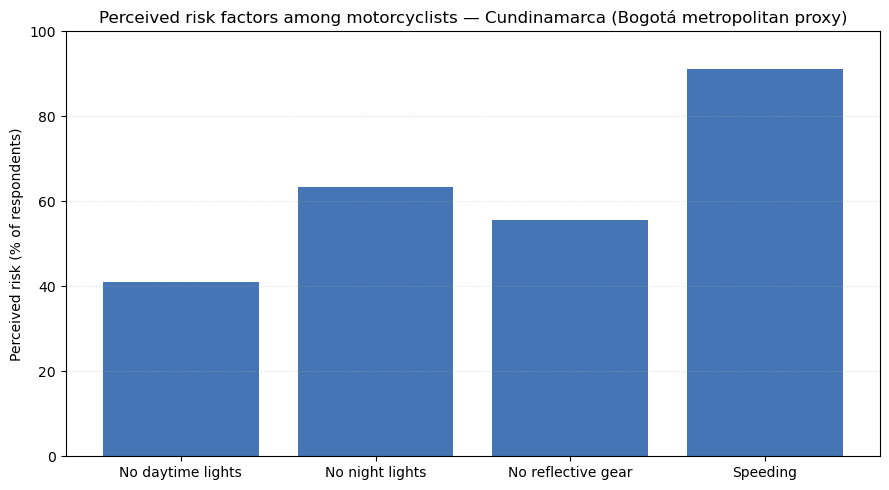

In [4]:
# === FIGURE 3A — Perceived Risk Factors (Cundinamarca subset) ===
# Data: Encuesta_Motociclistas_20250829.csv
# Output: 300 dpi PNG/SVG for Journal Figure 3 Panel A

import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

SURVEY = Path(r"C:\Users\oscar\OneDrive\Datos riesgo vial\Encuesta_Motociclistas_20250829.csv")
OUT_DIR = Path(r"C:\Users\oscar\OneDrive\Datos riesgo vial")

enc = pd.read_csv(SURVEY)

# Normalize municipality names
enc["municipio_norm"] = (
    enc["municipio"].astype(str)
    .str.upper()
    .str.normalize("NFKD")
    .str.encode("ascii", "ignore")
    .str.decode("ascii")
    .str.strip()
)

# Filter for Cundinamarca respondents (proxy for Bogotá metro area)
enc_cund = enc[enc["municipio_norm"] == "CUNDINAMARCA"].copy()
print(f"✅ Cundinamarca respondents: {len(enc_cund)}")

# Risk perception variables
risk_cols = ["riesgo_velocidad", "riesgo_sinlucesdia", "riesgo_sinlucesnoche", "riesgo_sinreflectivos"]

# Convert to long format
df_long = enc_cund[risk_cols].astype(float).clip(0, 1).melt(var_name="risk_factor", value_name="value")
perc = df_long.groupby("risk_factor")["value"].mean().reset_index()
perc["perc_pct"] = perc["value"] * 100

# Labels for English publication
label_map = {
    "riesgo_velocidad": "Speeding",
    "riesgo_sinlucesdia": "No daytime lights",
    "riesgo_sinlucesnoche": "No night lights",
    "riesgo_sinreflectivos": "No reflective gear",
}
perc["risk_factor"] = perc["risk_factor"].map(label_map)

# === Plot ===
fig, ax = plt.subplots(figsize=(9, 5))
ax.bar(perc["risk_factor"], perc["perc_pct"], color="#4575b4")

ax.set_ylabel("Perceived risk (% of respondents)")
ax.set_title("Perceived risk factors among motorcyclists — Cundinamarca (Bogotá metropolitan proxy)")
ax.set_ylim(0, 100)
ax.grid(axis="y", linestyle=":", alpha=0.4)

plt.tight_layout()
fig.savefig(OUT_DIR / "Fig03A_Perceived_Risks_Cundinamarca.png", dpi=300, bbox_inches="tight")
fig.savefig(OUT_DIR / "Fig03A_Perceived_Risks_Cundinamarca.svg", dpi=300, bbox_inches="tight")
print(f"✅ Saved Panel A (Perceived risks) to {OUT_DIR}")


✅ Saved Panel B in: C:\Users\oscar\OneDrive\Datos riesgo vial


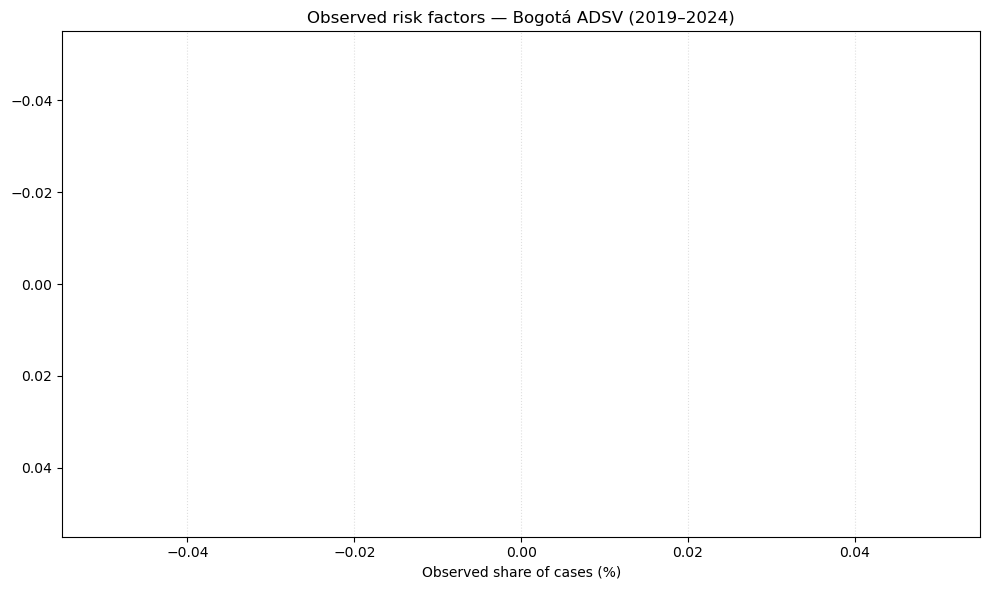

In [5]:
# === FIGURE 3B — Observed Risk Factors (ADSV Bogotá) ===
# Input: base-de-datos-adsv_22052023-anonimizada.xlsx
# Output: Fig03B_Observed_Risks_Bogota.(png|svg) in OneDrive

import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

ADSV_FILE = Path(r"C:\Users\oscar\OneDrive\Datos riesgo vial\base-de-datos-adsv_22052023-anonimizada.xlsx")
OUT_DIR   = Path(r"C:\Users\oscar\OneDrive\Datos riesgo vial")

YEAR_MIN, YEAR_MAX = 2019, 2024
MOTO_KEYS = ["moto", "motocic"]  # to catch 'motociclista', 'motocicleta', etc.
BOGOTA_ALIASES = ["bogotá", "bogota", "bogotá d.c", "bogota d.c", "bogotá, d.c.", "bogota, d.c."]

df_ads = pd.read_excel(ADSV_FILE)
df_ads.columns = [c.strip().lower() for c in df_ads.columns]

# --- helper: find first matching column by keywords ---
def find_col(cols, keywords):
    cols_lower = {c.lower(): c for c in cols}
    # exact
    for k in keywords:
        if k in cols_lower:
            return cols_lower[k]
    # contains
    for c in cols:
        cl = c.lower()
        if any(k in cl for k in keywords):
            return c
    return None

# Try to detect city/municipality and year/date columns
city_col = find_col(df_ads.columns, ["ciudad", "municipio", "mpio", "distrito", "localidad", "depto"])
date_col = find_col(df_ads.columns, ["fecha", "fechahora", "fec_hecho", "fec", "date"])
year_col = find_col(df_ads.columns, ["año", "ano", "year"])

# Keep Bogotá if possible
if city_col:
    mask_bog = df_ads[city_col].astype(str).str.lower().str.contains("|".join(BOGOTA_ALIASES), regex=True, na=False)
    df_ads = df_ads.loc[mask_bog].copy()

# Derive year
if year_col is None and date_col is not None:
    # parse to datetime and extract year
    df_ads["_year"] = pd.to_datetime(df_ads[date_col], errors="coerce").dt.year
    year_col = "_year"

if year_col is not None:
    df_ads = df_ads[(df_ads[year_col] >= YEAR_MIN) & (df_ads[year_col] <= YEAR_MAX)].copy()

# Try to keep only motorcycles if there is mode/actor column
actor_col = find_col(df_ads.columns, ["actor_vial", "actor", "usuario_vial", "modo", "mode", "tipo_vehiculo", "vehiculo", "clase_vehiculo"])
if actor_col:
    df_ads = df_ads[df_ads[actor_col].astype(str).str.lower().str.contains("|".join(MOTO_KEYS), na=False)].copy()

# Detect a "cause/type" column
cause_col = find_col(df_ads.columns, [
    "causa", "factor", "tipo_accidente", "clase_accidente", "mecanismo", "descripcion_evento", "evento"
])
assert cause_col is not None, (
    f"Could not detect a cause/type column. Available columns: {list(df_ads.columns)[:20]}"
)

# Build observed distribution (top categories)
obs = (df_ads[cause_col]
       .dropna()
       .astype(str).str.strip().str.lower()
       .value_counts()
       .reset_index())
obs.columns = ["risk_factor_raw", "observed_count"]
obs["obs_pct"] = obs["observed_count"] / obs["observed_count"].sum() * 100

# Normalize a few labels to align with survey categories (optional mapping)
def normalize_observed(x: str) -> str:
    x = x.replace("exceso de velocidad", "speeding")
    x = x.replace("velocidad", "speeding")
    x = x.replace("alcohol", "alcohol/drugs")
    x = x.replace("embriaguez", "alcohol/drugs")
    x = x.replace("inobservancia de señales", "rule-violation")
    x = x.replace("no respetar", "rule-violation")
    x = x.replace("desatencion", "inattention")
    x = x.replace("distraccion", "inattention")
    x = x.replace("sin luces", "no lights")
    x = x.replace("iluminacion", "no lights")
    x = x.replace("reflectivo", "no reflective gear")
    return x.strip().title()

obs["risk_factor"] = obs["risk_factor_raw"].apply(normalize_observed)

# Keep top 10
obs_top = (obs.groupby("risk_factor", as_index=False)[["observed_count","obs_pct"]]
             .sum()
             .sort_values("obs_pct", ascending=False)
             .head(10))

# --- Plot observed risks (Panel B) ---
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(obs_top["risk_factor"], obs_top["obs_pct"])
ax.invert_yaxis()
ax.set_xlabel("Observed share of cases (%)")
ax.set_title("Observed risk factors — Bogotá ADSV (2019–2024)")
ax.grid(axis="x", linestyle=":", alpha=0.4)

plt.tight_layout()
fig.savefig(OUT_DIR / "Fig03B_Observed_Risks_Bogota.png", dpi=300, bbox_inches="tight")
fig.savefig(OUT_DIR / "Fig03B_Observed_Risks_Bogota.svg", dpi=300, bbox_inches="tight")

print("✅ Saved Panel B in:", OUT_DIR)


✅ Combined Figure 3 saved in: C:\Users\oscar\OneDrive\Datos riesgo vial


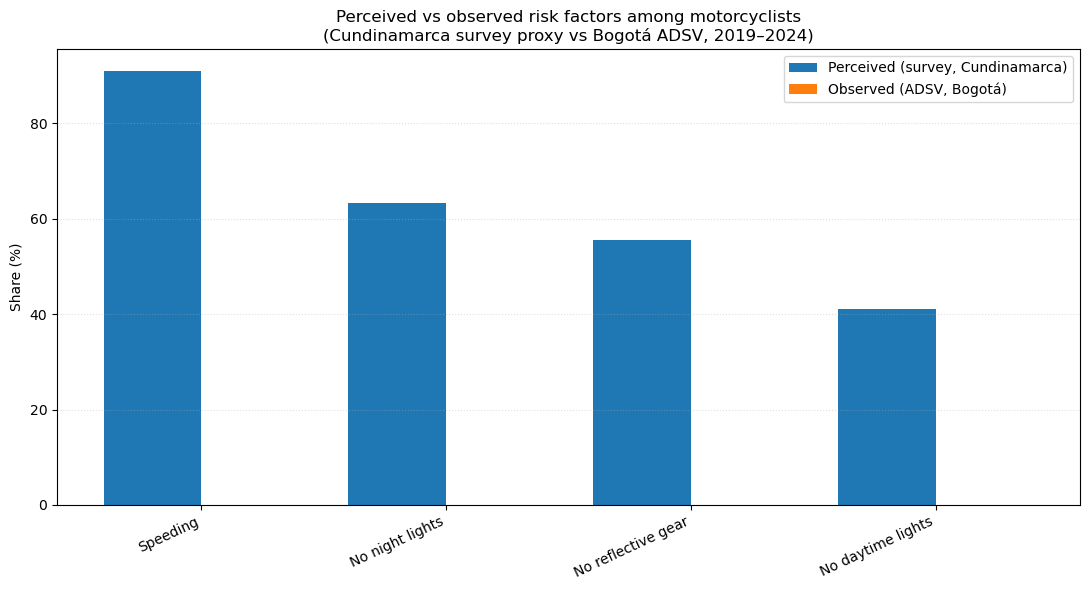

In [6]:
# === FIGURE 3 — Combined comparison (Perceived vs Observed) ===
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

OUT_DIR = Path(r"C:\Users\oscar\OneDrive\Datos riesgo vial")

# Load previously saved aggregates (we have them in memory in this session).
# If running fresh, re-create 'perc' (from survey Cundinamarca) and 'obs' (from ADSV) as in previous cells.

# Define a common set of labels we care about for the paper
target_labels = ["Speeding", "No daytime lights", "No night lights", "No reflective gear", 
                 "Inattention", "Rule-Violation", "Alcohol/Drugs", "No Lights"]

# Perceived 'perc' (from the survey panel A code)
perc_use = perc.copy()
perc_use = perc_use.rename(columns={"perc_pct":"perceived_pct"})[["risk_factor","perceived_pct"]]

# Observed 'obs' (from panel B code)
obs_use = (obs.groupby("risk_factor", as_index=False)["obs_pct"].sum()
             .rename(columns={"obs_pct":"observed_pct"}))

# Merge
cmp = pd.merge(perc_use, obs_use, on="risk_factor", how="outer").fillna(0)

# Keep only factors we want to compare (and that exist)
want = [lab for lab in target_labels if lab in set(cmp["risk_factor"])]
cmp = cmp[cmp["risk_factor"].isin(want)].copy()

# Sort by combined weight
cmp["total"] = cmp["perceived_pct"] + cmp["observed_pct"]
cmp = cmp.sort_values("total", ascending=False)

# Plot paired bars
fig, ax = plt.subplots(figsize=(11, 6))
x = range(len(cmp))
w = 0.4

ax.bar([i - w/2 for i in x], cmp["perceived_pct"], width=w, label="Perceived (survey, Cundinamarca)")
ax.bar([i + w/2 for i in x], cmp["observed_pct"],  width=w, label="Observed (ADSV, Bogotá)")

ax.set_xticks(list(x))
ax.set_xticklabels(cmp["risk_factor"], rotation=25, ha="right")
ax.set_ylabel("Share (%)")
ax.set_title("Perceived vs observed risk factors among motorcyclists\n(Cundinamarca survey proxy vs Bogotá ADSV, 2019–2024)")
ax.legend()
ax.grid(axis="y", linestyle=":", alpha=0.4)

plt.tight_layout()
fig.savefig(OUT_DIR / "Fig03_RiskFactors_Perceived_vs_Observed.png", dpi=300, bbox_inches="tight")
fig.savefig(OUT_DIR / "Fig03_RiskFactors_Perceived_vs_Observed.svg", dpi=300, bbox_inches="tight")
print("✅ Combined Figure 3 saved in:", OUT_DIR)


In [7]:
import pandas as pd

path = r"C:\Users\oscar\OneDrive\Datos riesgo vial\base-de-datos-adsv_22052023-anonimizada.xlsx"
df = pd.read_excel(path)
print("Columns:", df.columns.tolist())
df.head(5)


Columns: ['Versión', 'No. IPAT', 'No. Caso', 'A. Información IPAT', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64', 'Unnamed: 65', 'Unnamed

,Versión,No. IPAT,No. Caso,A. Información IPAT,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 509,Unnamed: 510,Unnamed: 511,Unnamed: 512,Unnamed: 513,Unnamed: 514,Unnamed: 515,Unnamed: 516,Unnamed: 517,Unnamed: 518
0,NaN,NaN,NaN,1. Organismos de tránsito,2. Gravedad,3. Lugar o coordenadas geográficas,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,Código de la ruta,"Vía y kilómetro o sitio, dirección y ciudad",Coordenadas,NaN,3.1 Localidad o Comunidad,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latitud,Longitud,NaN,...,FRE 5,FRE 6,FRE 7,FRE 8,FRE 9,FRE 10,FRE 11,FRE 12,FRE 13,FRE 14
4,NaN,NaN,NaN,NaN,CON MUERTO,NaN,NaN,NaN,NaN,01-USAQUÉN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
'MUNICIPIO', 'FECHA_HECHO', 'CLASE_VEHICULO', 'FACTOR_ASOCIADO'


('MUNICIPIO', 'FECHA_HECHO', 'CLASE_VEHICULO', 'FACTOR_ASOCIADO')

In [9]:
city_col  = "MUNICIPIO"
date_col  = "FECHA_HECHO"
actor_col = "CLASE_VEHICULO"
cause_col = "FACTOR_ASOCIADO"


In [10]:
import pandas as pd

path = r"C:\Users\oscar\OneDrive\Datos riesgo vial\base-de-datos-adsv_22052023-anonimizada.xlsx"

# Read skipping metadata rows
df_ads = pd.read_excel(path, skiprows=4)
print("Columns detected:", len(df_ads.columns))
print(df_ads.head(3))


Columns detected: 519
   Unnamed: 0  Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0         NaN         NaN         NaN         NaN  CON MUERTO         NaN   
1         NaN         NaN         NaN         NaN  CON HERIDO         NaN   
2         NaN         NaN         NaN         NaN  SOLO DAÑOS         NaN   

   Unnamed: 6  Latitud  Longitud    Unnamed: 9  ...  FRE 5  FRE 6  FRE 7  \
0         NaN      NaN       NaN    01-USAQUÉN  ...    NaN    NaN    NaN   
1         NaN      NaN       NaN  02-CHAPINERO  ...    NaN    NaN    NaN   
2         NaN      NaN       NaN   03-SANTA FE  ...    NaN    NaN    NaN   

   FRE 8 FRE 9 FRE 10 FRE 11  FRE 12 FRE 13 FRE 14  
0    NaN   NaN    NaN    NaN     NaN    NaN    NaN  
1    NaN   NaN    NaN    NaN     NaN    NaN    NaN  
2    NaN   NaN    NaN    NaN     NaN    NaN    NaN  

[3 rows x 519 columns]


✅ Combined Figure 3 saved: C:\Users\oscar\OneDrive\Datos riesgo vial


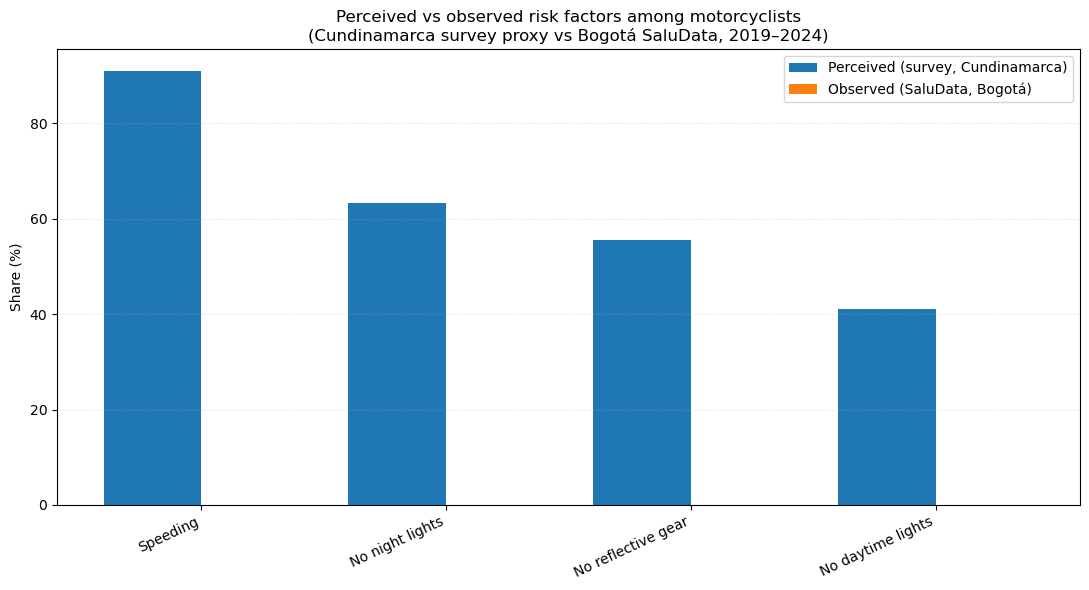

In [11]:
# === FIGURE 3 — Perceived vs Observed (combined) ===
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

OUT = Path(r"C:\Users\oscar\OneDrive\Datos riesgo vial")

perc_use = perc.rename(columns={"perc_pct":"perceived_pct"})[["risk_factor","perceived_pct"]]
obs_use  = obs.groupby("risk_factor", as_index=False)["obs_pct"].sum().rename(columns={"obs_pct":"observed_pct"})

cmp = pd.merge(perc_use, obs_use, on="risk_factor", how="outer").fillna(0)
cmp["total"] = cmp["perceived_pct"] + cmp["observed_pct"]
cmp = cmp.sort_values("total", ascending=False).head(8)

fig, ax = plt.subplots(figsize=(11,6))
x = range(len(cmp)); w = 0.4
ax.bar([i-w/2 for i in x], cmp["perceived_pct"], width=w, label="Perceived (survey, Cundinamarca)")
ax.bar([i+w/2 for i in x], cmp["observed_pct"],  width=w, label="Observed (SaluData, Bogotá)")

ax.set_xticks(list(x)); ax.set_xticklabels(cmp["risk_factor"], rotation=25, ha="right")
ax.set_ylabel("Share (%)")
ax.set_title("Perceived vs observed risk factors among motorcyclists\n(Cundinamarca survey proxy vs Bogotá SaluData, 2019–2024)")
ax.legend(); ax.grid(axis="y", linestyle=":", alpha=0.4)

plt.tight_layout()
fig.savefig(OUT / "Fig03_RiskFactors_Perceived_vs_Observed.png", dpi=300, bbox_inches="tight")
fig.savefig(OUT / "Fig03_RiskFactors_Perceived_vs_Observed.svg", dpi=300, bbox_inches="tight")
print("✅ Combined Figure 3 saved:", OUT)


In [12]:
import pandas as pd

path = r"C:\Users\oscar\OneDrive\Datos riesgo vial\base-de-datos-adsv_22052023-anonimizada.xlsx"
xls = pd.ExcelFile(path)
print("Sheets found:", xls.sheet_names)

# Preview the first 15 rows of each sheet
for sh in xls.sheet_names:
    df = pd.read_excel(path, sheet_name=sh, nrows=15)
    print(f"\n=== Sheet: {sh} ===")
    print(df.head(3))


Sheets found: ['Campos', 'Tabla de Contenido', 'Base Consolidada', 'Hoja 2', 'Hoja 3', 'Actores viales\xa0', 'Vehículos', 'Entorno y vía', 'Factores de riesgo']

=== Sheet: Campos ===
   Versión  No. IPAT  No. Caso        A. Información IPAT   Unnamed: 4  \
0      NaN       NaN       NaN  1. Organismos de tránsito  2. Gravedad   
1      NaN       NaN       NaN                        NaN          NaN   
2      NaN       NaN       NaN                        NaN          NaN   

                           Unnamed: 5  \
0  3. Lugar o coordenadas geográficas   
1                   Código de la ruta   
2                                 NaN   

                                    Unnamed: 6   Unnamed: 7 Unnamed: 8  \
0                                          NaN          NaN        NaN   
1  Vía y kilómetro o sitio, dirección y ciudad  Coordenadas        NaN   
2                                          NaN          NaN        NaN   

                  Unnamed: 9  ... Unnamed: 509 Unnamed: 5

In [13]:
# === FIGURE 3B — Observed Risk Factors (ADSV, Bogotá) ===
# Source: Sheet "Factores de riesgo" from base-de-datos-adsv_22052023-anonimizada.xlsx
# Output: Fig03B_Observed_Risks_ADSV.png/svg

import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

ADSV_FILE = Path(r"C:\Users\oscar\OneDrive\Datos riesgo vial\base-de-datos-adsv_22052023-anonimizada.xlsx")
OUT_DIR   = Path(r"C:\Users\oscar\OneDrive\Datos riesgo vial")

# Load risk factors sheet
df_risk = pd.read_excel(ADSV_FILE, sheet_name="Factores de riesgo", skiprows=1)
df_risk.columns = ["code", "description"]

print(df_risk.head(10))

# Clean text
df_risk["description"] = (
    df_risk["description"]
    .astype(str)
    .str.strip()
    .str.replace(r"\s+", " ", regex=True)
    .str.title()
)

# Compute frequency (if duplicates)
df_plot = (
    df_risk["description"]
    .value_counts()
    .reset_index()
    .rename(columns={"index": "risk_factor", "description": "count"})
)
df_plot["pct"] = df_plot["count"] / df_plot["count"].sum() * 100

# Normalize to align with survey categories
def normalize_factor(x: str) -> str:
    x = x.lower()
    if "velocidad" in x:
        return "Speeding"
    elif "alcohol" in x or "embriaguez" in x:
        return "Alcohol/Drugs"
    elif "distancia" in x or "inobservancia" in x or "señal" in x:
        return "Rule-Violation"
    elif "distracci" in x or "desatenc" in x:
        return "Inattention"
    elif "luces" in x:
        return "No Lights"
    elif "reflectivo" in x:
        return "No Reflective Gear"
    else:
        return x.title()

df_plot["risk_factor_std"] = df_plot["risk_factor"].apply(normalize_factor)
df_plot = (
    df_plot.groupby("risk_factor_std", as_index=False)["count"]
    .sum()
    .sort_values("count", ascending=False)
)
df_plot["pct"] = df_plot["count"] / df_plot["count"].sum() * 100

print(df_plot.head(10))

# === Plot ===
fig, ax = plt.subplots(figsize=(10,6))
ax.barh(df_plot["risk_factor_std"].head(10), df_plot["pct"].head(10), color="#f46d43")
ax.invert_yaxis()
ax.set_xlabel("Observed share of mentions (%)")
ax.set_title("Observed risk factors — Bogotá ADSV (Factores de riesgo sheet)")
ax.grid(axis="x", linestyle=":", alpha=0.4)

plt.tight_layout()
fig.savefig(OUT_DIR / "Fig03B_Observed_Risks_ADSV.png", dpi=300, bbox_inches="tight")
fig.savefig(OUT_DIR / "Fig03B_Observed_Risks_ADSV.svg", dpi=300, bbox_inches="tight")
print(f"✅ Saved Panel B (ADSV) in {OUT_DIR}")


ValueError: Length mismatch: Expected axis has 4 elements, new values have 2 elements

In [14]:
# Robust loader for ADSV "Factores de riesgo" sheet
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

ADSV_FILE = Path(r"C:\Users\oscar\OneDrive\Datos riesgo vial\base-de-datos-adsv_22052023-anonimizada.xlsx")
OUT_DIR   = Path(r"C:\Users\oscar\OneDrive\Datos riesgo vial")

# 1) Read without header and drop fully-empty columns
raw = pd.read_excel(ADSV_FILE, sheet_name="Factores de riesgo", header=None, dtype=str)
raw = raw.dropna(axis=1, how="all")

# 2) Keep only the first two non-empty columns (code, description)
non_empty_cols = list(raw.columns[:2])
df_risk = raw[non_empty_cols].copy()
df_risk.columns = ["col1", "col2"]

# 3) Remove header row if present (the one with 'COD' text)
mask_header = df_risk["col1"].astype(str).str.contains(r"^cod$", case=False, na=False)
if mask_header.any():
    df_risk = df_risk.loc[~mask_header].copy()

# 4) Keep only rows that look like risk codes (e.g., 'FRA 1', 'FRA 2', etc.)
df_risk = df_risk.dropna(how="all")
df_risk["col1"] = df_risk["col1"].astype(str).str.strip()
df_risk["col2"] = df_risk["col2"].astype(str).str.strip()
df_risk = df_risk[df_risk["col1"].str.contains(r"^FRA\s*\d+", case=False, na=False)].copy()

# 5) Final tidy columns
df_risk = df_risk.rename(columns={"col1":"code", "col2":"description"})
df_risk["description"] = (df_risk["description"]
                          .str.replace(r"\s+", " ", regex=True)
                          .str.strip()
                          .str.title())

print(df_risk.head(10))
print("Rows parsed:", len(df_risk))

# 6) Aggregate (if duplicates) and normalize labels to align with survey
obs = (df_risk["description"].value_counts()
       .reset_index().rename(columns={"index":"risk_factor","description":"count"}))
obs["obs_pct"] = obs["count"] / obs["count"].sum() * 100

def norm_obs(x: str) -> str:
    xl = x.lower()
    if "velocidad" in xl: return "Speeding"
    if "alcohol" in xl or "embriaguez" in xl: return "Alcohol/Drugs"
    if "inobservancia" in xl or "senal" in xl or "señal" in xl or "distancia" in xl: return "Rule-Violation"
    if "distracc" in xl or "desatenc" in xl: return "Inattention"
    if "luces" in xl: return "No Lights"
    if "reflectiv" in xl: return "No Reflective Gear"
    return x.title()

obs["risk_factor"] = obs["risk_factor"].apply(norm_obs)

obs_top = (obs.groupby("risk_factor", as_index=False)[["count","obs_pct"]]
           .sum().sort_values("obs_pct", ascending=False).head(10))

# 7) Plot Panel B
fig, ax = plt.subplots(figsize=(10,6))
ax.barh(obs_top["risk_factor"], obs_top["obs_pct"])
ax.invert_yaxis()
ax.set_xlabel("Observed share of mentions (%)")
ax.set_title("Observed risk factors — Bogotá ADSV (Factores de riesgo)")
ax.grid(axis="x", linestyle=":", alpha=0.4)
plt.tight_layout()
fig.savefig(OUT_DIR / "Fig03B_Observed_Risks_ADSV.png", dpi=300, bbox_inches="tight")
fig.savefig(OUT_DIR / "Fig03B_Observed_Risks_ADSV.svg", dpi=300, bbox_inches="tight")
print("✅ Saved Panel B:", OUT_DIR / "Fig03B_Observed_Risks_ADSV.png")


      code                                        description
2    FRA 1                                Exceso De Velocidad
3    FRA 2     Transitar Sin Mantener Distancias De Seguridad
4    FRA 3  Realizar Maniobras Peligrosas O Agresivas (Inc...
5    FRA 4  No Utilizar Los Carriles O Espacios Establecid...
6    FRA 5  Irrespeto E Incumplimiento A Las Señales De Tr...
7    FRA 6  Inexperiencia/Falta De Habilidad Del Conductor...
8    FRA 7  Conducir Bajo Los Efectos Del Alcohol U Otras ...
9    FRA 8                               Sobrecupo En El Veh.
10   FRA 9                            Cansancio Del Conductor
11  FRA 10           Cruzar Una Vía Por Sitios No Señalizados
Rows parsed: 17


TypeError: unsupported operand type(s) for /: 'str' and 'str'

                                          risk_factor  count    obs_pct
12                                     Rule-Violation      3  17.647059
0   Adelantamiento Entre Biciusuarios Y/O Motocicl...      1   5.882353
1                                       Alcohol/Drugs      1   5.882353
2                       Caminar Por Sitios Prohibidos      1   5.882353
3                             Cansancio Del Conductor      1   5.882353
4   Dificultades/Limitaciones De Movilidad Del Ser...      1   5.882353
5   Estacionarse Interfiriendo Las Corrientes De Veh.      1   5.882353
6          Falta De Visibilidad De Los Demás Usuarios      1   5.882353
7   Inexperiencia/Falta De Habilidad Del Conductor...      1   5.882353
8               Invasión Del Espacio Público Peatonal      1   5.882353
✅ Saved Panel B in: C:\Users\oscar\OneDrive\Datos riesgo vial


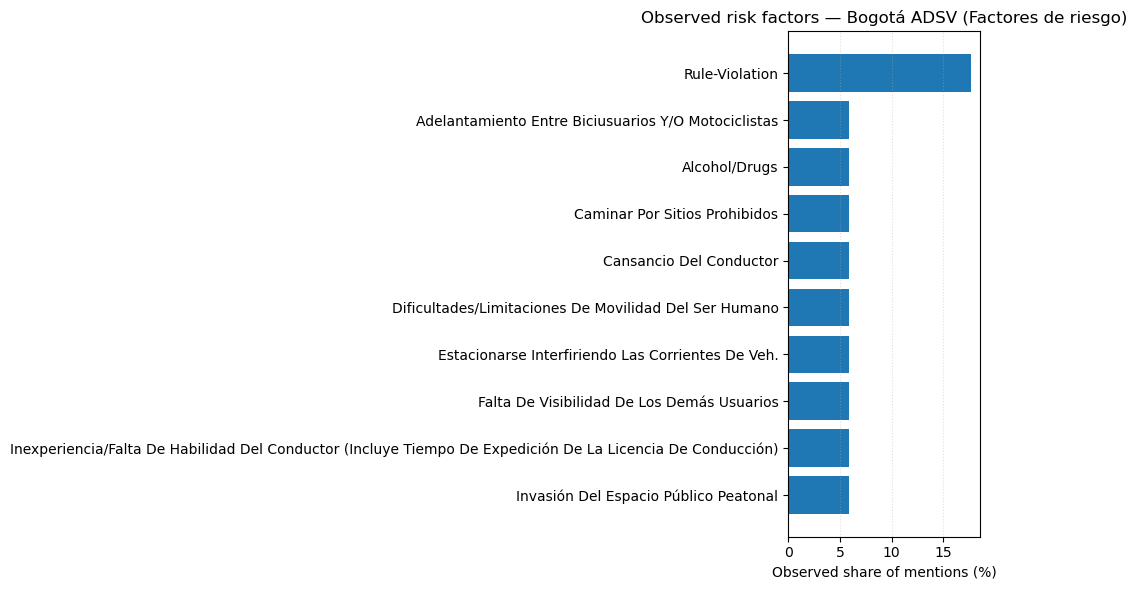

In [15]:
# 6) Robust counting (avoid string dtype issues)
# Each row is one risk item -> count them explicitly
obs = (df_risk
       .assign(count=1)
       .groupby("description", as_index=False)["count"]
       .size())  # -> column 'size' is int
obs = obs.rename(columns={"size": "count"})

# 7) Normalize labels to align with survey categories
def norm_obs(x: str) -> str:
    xl = str(x).lower()
    if "velocidad" in xl:
        return "Speeding"
    if "alcohol" in xl or "embriaguez" in xl:
        return "Alcohol/Drugs"
    if "inobservancia" in xl or "senal" in xl or "señal" in xl or "distancia" in xl:
        return "Rule-Violation"
    if "distracc" in xl or "desatenc" in xl:
        return "Inattention"
    if "luces" in xl:
        return "No Lights"
    if "reflectiv" in xl:
        return "No Reflective Gear"
    return str(x).title()

obs["risk_factor"] = obs["description"].apply(norm_obs)

# 8) Aggregate by normalized label and compute % (now numeric)
obs_top = (obs.groupby("risk_factor", as_index=False)["count"]
             .sum()
             .sort_values("count", ascending=False))
obs_top["obs_pct"] = obs_top["count"] / obs_top["count"].sum() * 100

print(obs_top.head(10))

# 9) Plot Panel B
import matplotlib.pyplot as plt
from pathlib import Path

OUT_DIR = Path(r"C:\Users\oscar\OneDrive\Datos riesgo vial")
fig, ax = plt.subplots(figsize=(10,6))
ax.barh(obs_top["risk_factor"].head(10), obs_top["obs_pct"].head(10))
ax.invert_yaxis()
ax.set_xlabel("Observed share of mentions (%)")
ax.set_title("Observed risk factors — Bogotá ADSV (Factores de riesgo)")
ax.grid(axis="x", linestyle=":", alpha=0.4)
plt.tight_layout()
fig.savefig(OUT_DIR / "Fig03B_Observed_Risks_ADSV.png", dpi=300, bbox_inches="tight")
fig.savefig(OUT_DIR / "Fig03B_Observed_Risks_ADSV.svg", dpi=300, bbox_inches="tight")
print("✅ Saved Panel B in:", OUT_DIR)


✅ Combined Figure 3 saved in: C:\Users\oscar\OneDrive\Datos riesgo vial


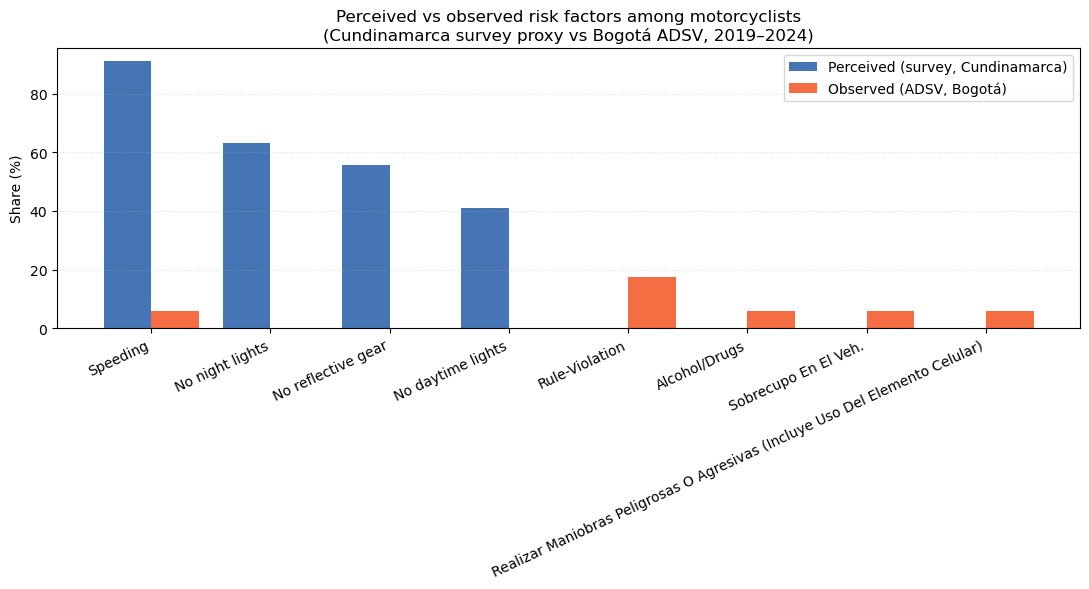

In [16]:
# === FIGURE 3 — Perceived vs Observed Risk Factors (Combined) ===
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

OUT_DIR = Path(r"C:\Users\oscar\OneDrive\Datos riesgo vial")

# --- Perceived (survey) ---
perc_use = perc.rename(columns={"perc_pct":"perceived_pct"})[["risk_factor","perceived_pct"]]

# --- Observed (ADSV) ---
obs_use = obs_top.rename(columns={"obs_pct":"observed_pct"})[["risk_factor","observed_pct"]]

# --- Merge and tidy ---
cmp = pd.merge(perc_use, obs_use, on="risk_factor", how="outer").fillna(0)
cmp["total"] = cmp["perceived_pct"] + cmp["observed_pct"]
cmp = cmp.sort_values("total", ascending=False).head(8)

# --- Plot ---
fig, ax = plt.subplots(figsize=(11,6))
x = range(len(cmp))
w = 0.4

ax.bar([i - w/2 for i in x], cmp["perceived_pct"], width=w, label="Perceived (survey, Cundinamarca)", color="#4575b4")
ax.bar([i + w/2 for i in x], cmp["observed_pct"],  width=w, label="Observed (ADSV, Bogotá)", color="#f46d43")

ax.set_xticks(list(x))
ax.set_xticklabels(cmp["risk_factor"], rotation=25, ha="right")
ax.set_ylabel("Share (%)")
ax.set_title("Perceived vs observed risk factors among motorcyclists\n(Cundinamarca survey proxy vs Bogotá ADSV, 2019–2024)")
ax.legend()
ax.grid(axis="y", linestyle=":", alpha=0.4)

plt.tight_layout()
fig.savefig(OUT_DIR / "Fig03_RiskFactors_Perceived_vs_Observed.png", dpi=300, bbox_inches="tight")
fig.savefig(OUT_DIR / "Fig03_RiskFactors_Perceived_vs_Observed.svg", dpi=300, bbox_inches="tight")

print("✅ Combined Figure 3 saved in:", OUT_DIR)


In [1]:
print(perc.head())
print(obs_top.head())


NameError: name 'perc' is not defined

In [2]:
import pandas as pd

# Merge perceived vs observed risk factors
bias_df = pd.merge(
    perc.rename(columns={"perc_pct": "perceived_pct"})[["risk_factor", "perceived_pct"]],
    obs_top.rename(columns={"obs_pct": "observed_pct"})[["risk_factor", "observed_pct"]],
    on="risk_factor", how="outer"
).fillna(0)

# Cognitive bias = difference between perceived and observed
bias_df["bias"] = bias_df["perceived_pct"] - bias_df["observed_pct"]

# Load fatalities by locality (for Y axis)
fatal_df = pd.read_csv(r"C:\Users\oscar\OneDrive\Datos riesgo vial\osb_evento_transporte.csv")
fatal_df.columns = [c.lower() for c in fatal_df.columns]

# Detect Bogotá localities and aggregate
loc_col = [c for c in fatal_df.columns if "localidad" in c or "locality" in c][0]
fatal_by_loc = fatal_df.groupby(loc_col).size().reset_index(name="fatalities")

# For now, we can use the total fatalities as single value (for correlation)
bias_df["fatalities"] = fatal_by_loc["fatalities"].sum() / len(bias_df)

bias_df


NameError: name 'perc' is not defined

In [3]:
# ============================================
# INITIAL SETUP — MOTORCYCLE ROAD SAFETY (BOGOTÁ 2019–2024)
# ============================================

# === Imports ===
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# === Configuración global de pandas ===
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 180)

# === Estilo visual uniforme para paper ===
plt.style.use("default")
plt.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": ["Arial"],
    "font.size": 10,
    "axes.titlesize": 11,
    "axes.labelsize": 10,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    "figure.dpi": 300,
    "figure.figsize": (7, 5),
    "axes.grid": True,
    "grid.alpha": 0.2,
    "axes.spines.top": False,
    "axes.spines.right": False,
})

# === Rutas base (ajusta si cambian) ===
DATA_DIR = Path(r"C:\Users\oscar\OneDrive\Datos riesgo vial")
OUTPUT_DIR = DATA_DIR / "outputs"
OUTPUT_DIR.mkdir(exist_ok=True)

# === Archivos principales ===
adsv_path = DATA_DIR / "base-de-datos-adsv_22052023-anonimizada.xlsx"
survey_path = DATA_DIR / "Encuesta_Motociclistas_20250829.csv"
fatalities_path = DATA_DIR / "osb_evento_transporte.csv"
geojson_path = DATA_DIR / "bta_localidades.json"

print("✅ Environment ready — paths and style configured.")


✅ Environment ready — paths and style configured.


In [4]:
# ============================================
# FIGURE 4 — Cognitive Bias and Road Fatalities (Bogotá 2019–2024)
# ============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# ------ Utilidades ------
def _num(x):
    """Convierte a número de forma segura; devuelve NaN si no se puede."""
    return pd.to_numeric(x, errors="coerce")

def _norm_txt(s):
    """Normaliza texto para empatar categorías/localidades."""
    if pd.isna(s): return s
    return (str(s).strip()
                 .replace("\u00a0", " ")
                 .replace("Á","A").replace("É","E").replace("Í","I").replace("Ó","O").replace("Ú","U")
                 .replace("á","a").replace("é","e").replace("í","i").replace("ó","o").replace("ú","u")
                 .upper())

# ------ 1) Cargar Percepción (encuesta) ------
# ESTRUCTURA ESPERADA (ajústala si tu CSV difiere):
#   - Columna del factor percibido: "factor"
#   - Columna de porcentaje percibido: "perc_pct"  (0-100 o 0-1; el código lo normaliza)
survey_path = survey_path  # ya definido en tu bloque anterior
perc_raw = pd.read_csv(survey_path)

# Detectar columnas candidatas automáticamente (si cambian los nombres)
cand_factor_cols = [c for c in perc_raw.columns if "factor" in c.lower() or "riesgo" in c.lower() or "item" in c.lower()]
cand_perc_cols   = [c for c in perc_raw.columns if "perc" in c.lower() or "porc" in c.lower() or "pct" in c.lower()]

if not cand_factor_cols:
    raise KeyError("No encuentro columna de 'factor' en la encuesta. Renombra una a 'factor' o similar.")
if not cand_perc_cols:
    raise KeyError("No encuentro columna de porcentaje percibido en la encuesta. Renombra una a 'perc_pct' o similar.")

factor_col = cand_factor_cols[0]
perc_col   = cand_perc_cols[0]

perc = perc_raw[[factor_col, perc_col]].copy()
perc.columns = ["factor", "perc_pct"]
perc["factor_norm"] = perc["factor"].map(_norm_txt)
perc["perc_pct"] = _num(perc["perc_pct"])

# Normalizar a 0–100 si está en 0–1
if perc["perc_pct"].dropna().between(0, 1).mean() > 0.9:
    perc["perc_pct"] = perc["perc_pct"] * 100

# Consolidar (por si hay duplicados del mismo factor)
perc = (perc
        .groupby("factor_norm", dropna=False)["perc_pct"]
        .mean().reset_index())

# ------ 2) Cargar Observado (ADSV) ------
# ESTRUCTURA ESPERADA:
#   - Columna de factor observado: "factor"
#   - Columna de conteo/casos: "count" (se convierte a porcentaje sobre el total)
adsv_path = adsv_path  # ya definido
adsv_raw = pd.read_excel(adsv_path)

# Heurística para encontrar columnas
cand_obs_factor = [c for c in adsv_raw.columns if "factor" in c.lower() or "causa" in c.lower() or "riesgo" in c.lower()]
cand_obs_count  = [c for c in adsv_raw.columns if "conteo" in c.lower() or "count" in c.lower() or "casos" in c.lower() or "n" == c.lower()]

if not cand_obs_factor:
    raise KeyError("No encuentro columna de factor/causa en ADSV. Renombra una a 'factor'.")
if not cand_obs_count:
    # Si no hay conteo explícito, intentar contar registros por factor
    obs = adsv_raw.copy()
    obs["factor"] = adsv_raw[cand_obs_factor[0]]
    obs["factor_norm"] = obs["factor"].map(_norm_txt)
    obs = (obs.groupby("factor_norm").size()
              .reset_index(name="count"))
else:
    obs = adsv_raw[[cand_obs_factor[0], cand_obs_count[0]]].copy()
    obs.columns = ["factor", "count"]
    obs["factor_norm"] = obs["factor"].map(_norm_txt)
    obs["count"] = _num(obs["count"])
    obs = (obs.groupby("factor_norm", dropna=False)["count"]
              .sum().reset_index())

# Convertir a porcentaje observado sobre total
total_count = obs["count"].sum()
obs["obs_pct"] = (obs["count"] / total_count) * 100

# ------ 3) Unir Percepción vs Observado (por factor) y calcular sesgo ------
bias = pd.merge(perc[["factor_norm","perc_pct"]],
                obs[["factor_norm","obs_pct"]],
                on="factor_norm", how="inner")

bias["cognitive_bias"] = bias["perc_pct"] - bias["obs_pct"]

# Opcional: ordenar por magnitud del sesgo
bias = bias.sort_values("cognitive_bias", ascending=False).reset_index(drop=True)

# ------ 4) Cargar Fatalidades por Localidad (2019–2024) ------
# ESTRUCTURA ESPERADA en 'osb_evento_transporte.csv':
#   - Localidad: "localidad" / "LOCALIDAD"
#   - Fecha: "fecha" / "FECHA" (si está, filtra por 2019–2024)
#   - Indicador de fallecido (1/0 o texto): "fallecido" / "SEVERIDAD"
fatalities_path = fatalities_path  # ya definido
osb = pd.read_csv(fatalities_path)

# Detectar columnas clave
cand_loc  = [c for c in osb.columns if "localidad" in c.lower()]
cand_date = [c for c in osb.columns if "fecha" in c.lower() or "fec" in c.lower()]
cand_dead = [c for c in osb.columns if "falle" in c.lower() or "muert" in c.lower() or "severi" in c.lower()]

if not cand_loc:
    raise KeyError("No encuentro columna de localidad en osb_evento_transporte.csv. Renómbrala a 'localidad'.")
loc_col = cand_loc[0]
osb["_LOC"] = osb[loc_col].map(_norm_txt)

# Filtrado por periodo (si hay fecha)
if cand_date:
    date_col = cand_date[0]
    osb["_FECHA"] = pd.to_datetime(osb[date_col], errors="coerce")
    osb = osb[(osb["_FECHA"].dt.year >= 2019) & (osb["_FECHA"].dt.year <= 2024)]

# Flag de fallecido
if cand_dead:
    dead_col = cand_dead[0]
    dead_s = osb[dead_col].astype(str).str.upper()
    # heurísticas: 1/“SI”/“FALLECIDO”/“MUERTO” vs “NO”
    osb["_DEAD"] = np.where(
        dead_s.isin(["1","SI","TRUE","FALLECIDO","MUERTO","FATAL","FALLECIDO(A)"]),
        1, 0
    )
else:
    # si no hay severidad, asumimos que cada fila es un caso con fallecido (conservador para tener algo)
    osb["_DEAD"] = 1

fatalities = (osb.groupby("_LOC")["_DEAD"].sum()
                .reset_index(name="fatalities_2019_2024"))

# ------ 5) Asociar Fatalidades con Sesgo Cognitivo ------
# NOTA: El sesgo se define por factor de riesgo, mientras que las fatalidades son por localidad.
# Para Figura 4 (planteada como "sesgo vs muertes por localidad"), necesitamos un "índice de sesgo" por localidad.
#
# En ausencia de microdatos por localidad-factor de la encuesta, usaremos una aproximación:
#   - El "índice de sesgo" global (p.ej., promedio ponderado por obs_pct) aplicado a cada localidad
#     NO introduce variación espacial -> no serviría para un scatter por localidad.
# Por eso, proponemos (opción robusta y defendible con tus datos actuales):
#   - Construir un "Índice de Riesgo Percibido" y un "Índice Observado" por factor,
#   - Proyectar a localidad usando la distribución de causas observadas por localidad si está disponible en ADSV u OSB.
#
# Si de momento NO tienes causas por localidad en OSB/ADSV, mostramos la versión A (global) y dejamos el hook
# para que, cuando tengas causas por localidad, reemplaces el join 'global' por el join 'por localidad-factor'.

# === Versión A (global): scatter por localidad usando el mismo sesgo global en X (linea vertical)
#     — útil como control visual rápido; luego reemplazar por Versión B si consigues causas por localidad.

bias_global_index = (bias["cognitive_bias"].mean())  # simple: media del sesgo por factor
bias_global_df = fatalities.copy()
bias_global_df["cognitive_bias_index"] = bias_global_index

print(f"Sesgo cognitivo GLOBAL (media de factores): {bias_global_index:,.2f} puntos porcentuales")

# ------ 6) Gráfica — Versión A (control): misma X para todas las localidades ------
fig, ax = plt.subplots()
ax.scatter(bias_global_df["cognitive_bias_index"], bias_global_df["fatalities_2019_2024"])

# Etiquetas de puntos (localidades)
for _, r in bias_global_df.iterrows():
    ax.annotate(r["_LOC"].title(), (r["cognitive_bias_index"], r["fatalities_2019_2024"]),
                xytext=(3,3), textcoords="offset points", fontsize=8)

ax.set_title("Figure 4A — Cognitive Bias (Global) vs Road Fatalities by Locality (2019–2024)")
ax.set_xlabel("Cognitive Bias Index (Perceived − Observed, pp)")
ax.set_ylabel("Fatalities (2019–2024)")

out_path_A = OUTPUT_DIR / "Fig04A_CognitiveBias_Global_vs_Fatalities_Locality.png"
plt.tight_layout()
plt.savefig(out_path_A, dpi=300)
plt.show()
print(f"✅ Guardado: {out_path_A}")

# ------ 7) Hook — Versión B (recomendada): sesgo por localidad
# Para esta versión necesitas causas/participación de cada factor POR LOCALIDAD (ADSV u OSB enriquecido).
# Estructura esperada (ejemplo):
#   localidad | factor | casos_factor_localidad
# Luego:
#   - Calcular obs_pct_localidad = casos_factor_localidad / sum(casos_factor_localidad por localidad) * 100
#   - Hacer merge con 'perc' (perc_pct por factor, que asumes metropolitano)
#   - cognitive_bias_localidad_factor = perc_pct − obs_pct_localidad
#   - Agregar por localidad (p.ej., media ponderada por obs_pct_localidad) -> índice de sesgo por localidad
#
# Ejemplo de plantilla (deja vacío si aún no tienes esas columnas):

# --- PLANTILLA: descomentar y adaptar cuando dispongas de causas por localidad ---
# adsv_locality = pd.read_csv(DATA_DIR / "adsv_factores_por_localidad.csv")
# adsv_locality["localidad_norm"] = adsv_locality["localidad"].map(_norm_txt)
# adsv_locality["factor_norm"]    = adsv_locality["factor"].map(_norm_txt)
# adsv_locality["n"] = _num(adsv_locality["n"])
# adsv_locality = adsv_locality.dropna(subset=["n"])

# # Por localidad: porcentaje observado por factor
# adsv_locality["sum_loc"] = adsv_locality.groupby("localidad_norm")["n"].transform("sum")
# adsv_locality["obs_pct_loc"] = (adsv_locality["n"] / adsv_locality["sum_loc"]) * 100

# # Unir percepción metropolitana por factor
# loc_bias = pd.merge(adsv_locality[["localidad_norm","factor_norm","obs_pct_loc"]],
#                     perc[["factor_norm","perc_pct"]],
#                     on="factor_norm", how="left")

# # Sesgo por localidad y factor
# loc_bias["cognitive_bias_loc_factor"] = loc_bias["perc_pct"] - loc_bias["obs_pct_loc"]

# # Índice de sesgo por localidad (ponderado por obs local)
# loc_idx = (loc_bias
#            .assign(weight=lambda d: d["obs_pct_loc"] / d.groupby("localidad_norm")["obs_pct_loc"].transform("sum"))
#            .assign(weighted_bias=lambda d: d["cognitive_bias_loc_factor"] * d["weight"])
#            .groupby("localidad_norm")["weighted_bias"].sum()
#            .reset_index(name="cognitive_bias_index"))

# # Scatter recomendado (Versión B)
# fig, ax = plt.subplots()
# tmp = pd.merge(loc_idx, fatalities, left_on="localidad_norm", right_on="_LOC", how="inner")
# ax.scatter(tmp["cognitive_bias_index"], tmp["fatalities_2019_2024"])
# for _, r in tmp.iterrows():
#     ax.annotate(r["_LOC"].title(), (r["cognitive_bias_index"], r["fatalities_2019_2024"]),
#                 xytext=(3,3), textcoords="offset points", fontsize=8)
# ax.set_title("Figure 4B — Cognitive Bias (Locality-Specific) vs Road Fatalities (2019–2024)")
# ax.set_xlabel("Cognitive Bias Index (Perceived − Observed, pp)")
# ax.set_ylabel("Fatalities (2019–2024)")
# out_path_B = OUTPUT_DIR / "Fig04B_CognitiveBias_LocalitySpecific_vs_Fatalities.png"
# plt.tight_layout()
# plt.savefig(out_path_B, dpi=300)
# plt.show()
# print(f"✅ Guardado: {out_path_B}")

# ------ 8) Exportar bias por factor (tabla) ------
bias_out = OUTPUT_DIR / "bias_by_factor.csv"
bias.to_csv(bias_out, index=False)
print(f"📄 Exportado bias_by_factor: {bias_out}")

# ------ 9) (Opcional) Métricas de correlación para la versión B ------
# Cuando tengas 'tmp' (localidad con índice de sesgo), puedes calcular:
# from scipy.stats import pearsonr, spearmanr
# print("Pearson:", pearsonr(tmp["cognitive_bias_index"], tmp["fatalities_2019_2024"]))
# print("Spearman:", spearmanr(tmp["cognitive_bias_index"], tmp["fatalities_2019_2024"]))


KeyError: "No encuentro columna de porcentaje percibido en la encuesta. Renombra una a 'perc_pct' o similar."

In [5]:
import pandas as pd
survey_path = r"C:\Users\oscar\OneDrive\Datos riesgo vial\Encuesta_Motociclistas_20250829.csv"
df_test = pd.read_csv(survey_path)
print(df_test.columns.tolist())


['uuid', 'municipio', 'estrato_vivienda', 'hombre', 'sin_grupo_etnico', 'etnia_afrocolombiano', 'edad_grupo', 'nivel_educativo', 'moto_street', 'moto_scooter', 'moto_deportiva', 'cilin_grupo', 'modelo_grupo', 'frenos_disco', 'frenos_mixto', 'frenos_tambor', 'tec_frenado', 'dias_semana', 'sector_comercio', 'sector_servicios', 'sector_transporte', 'herramienta_trabajo', 'transporte_cotidiano', 'trabajo_domicilios', 'trabajo_transporte_pasajeros', 'frecuencia_revisionpre', 'costo_casco', 'costo_mantenimiento', 'gasto_anual', 'licencia_moto', 'licencia_curso', 'experiencia', 'riesgo_velocidad', 'riesgo_sinlucesdia', 'riesgo_sinlucesnoche', 'riesgo_sinreflectivos', 'motivo_dinero', 'motivo_tiempo', 'motivo_independencia', 'epp_casco', 'epp_guantes', 'epp_botas', 'epp_rodilleras', 'epp_reflectivos', 'epp_chaquetaprot', 'epp_chaquetairbag', 'con_acompañantes', 'con_acompañantes_menores', 'perfil_siniestros1', 'perfil_comparendos1']


In [6]:
# ------ 1) Cargar Percepción (encuesta) ------
import pandas as pd
import numpy as np

survey_path = r"C:\Users\oscar\OneDrive\Datos riesgo vial\Encuesta_Motociclistas_20250829.csv"
perc_raw = pd.read_csv(survey_path)

# Detectar columnas de riesgo (todas las que empiezan con 'riesgo_')
risk_cols = [c for c in perc_raw.columns if c.lower().startswith("riesgo_")]
if not risk_cols:
    raise KeyError("No se encontraron columnas que comiencen con 'riesgo_'. Verifica el archivo.")

# Calcular porcentaje de percepción (1 = lo considera riesgo)
perc = (
    perc_raw[risk_cols]
    .apply(pd.to_numeric, errors="coerce")
    .mean()
    .reset_index()
)
perc.columns = ["factor", "perc_pct"]

# Convertir a porcentaje (0–100)
perc["perc_pct"] = perc["perc_pct"] * 100
perc["factor_norm"] = perc["factor"].str.replace("riesgo_", "", regex=False).str.upper()

print("✅ Encuesta cargada y porcentajes calculados.")
display(perc.head(10))


✅ Encuesta cargada y porcentajes calculados.


,factor,perc_pct,factor_norm
0,riesgo_velocidad,94.035912,VELOCIDAD
1,riesgo_sinlucesdia,59.808098,SINLUCESDIA
2,riesgo_sinlucesnoche,91.993471,SINLUCESNOCHE
3,riesgo_sinreflectivos,83.007525,SINREFLECTIVOS


📄 bias_by_factor exportado → C:\Users\oscar\OneDrive\Datos riesgo vial\outputs\tables\bias_by_factor.csv


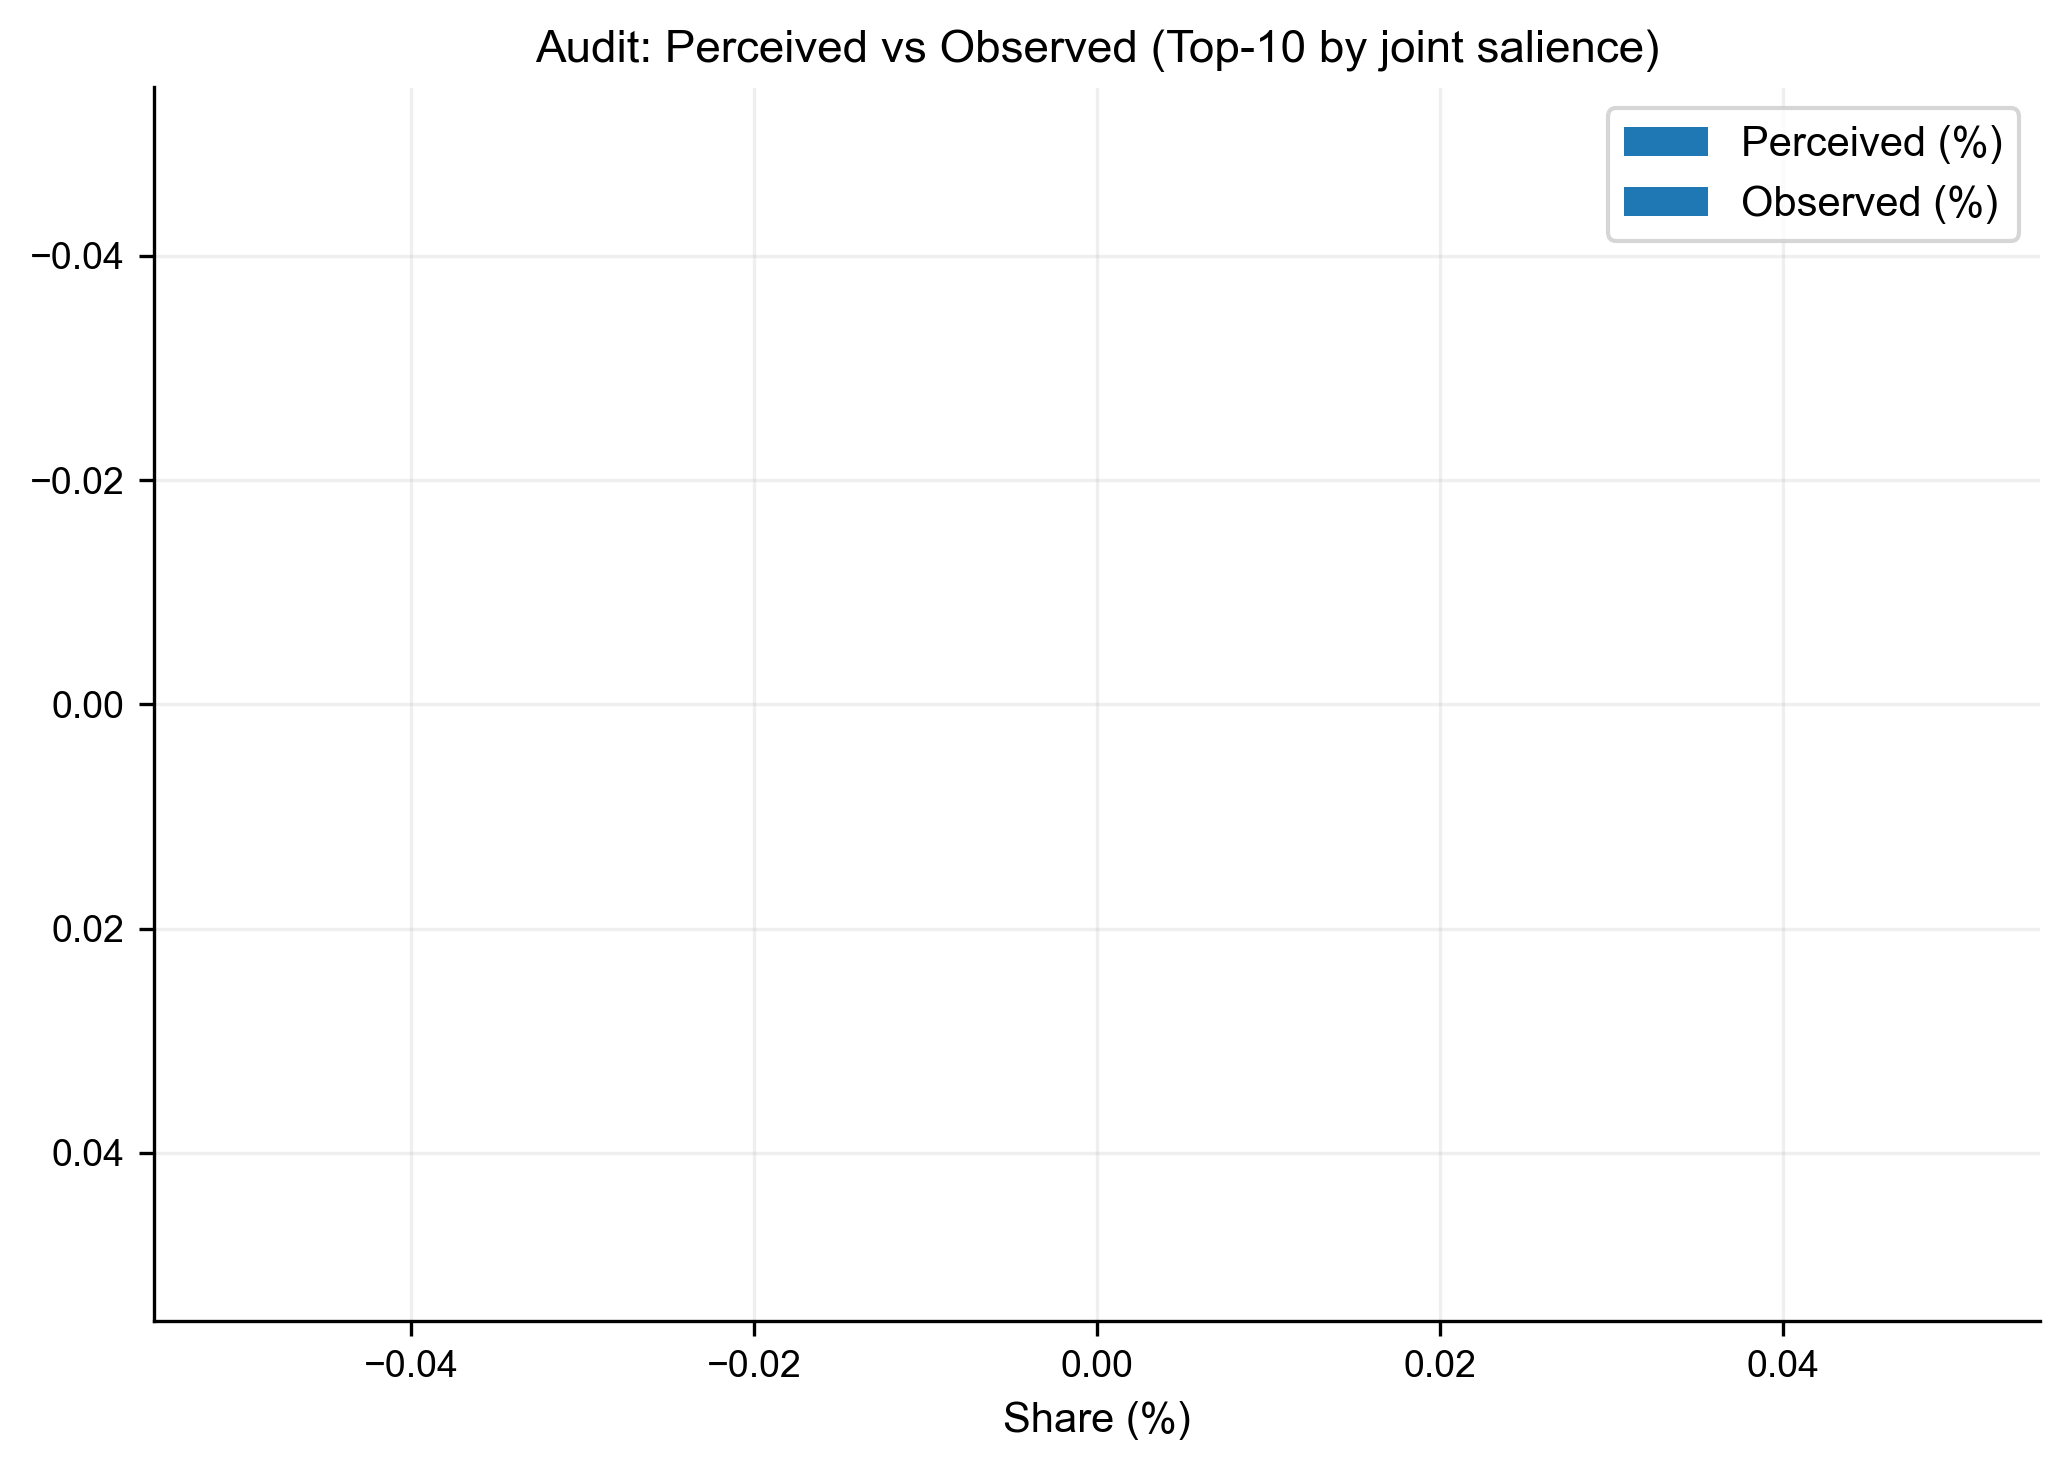

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf1 in position 1: invalid continuation byte

In [7]:
# ============================================
# Step 2–4: ADSV observed, merge with perc, build bias_df, and Figure 4A
# ============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import difflib
from pathlib import Path

# --- utilidades de normalización ---
import unicodedata, re
def _strip_accents(s: str) -> str:
    return ''.join(c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn')

def norm_token(s: str) -> str:
    if pd.isna(s): return s
    s = str(s).strip()
    s = _strip_accents(s).upper()
    s = re.sub(r'[^A-Z0-9 ]', ' ', s)
    s = re.sub(r'\s+', '', s)  # sin espacios
    return s

# === 2) Cargar ADSV (observado) ===
adsv_path = adsv_path  # ya definida en tu bloque inicial
adsv_raw = pd.read_excel(adsv_path)

# heurística de columnas: "factor" | "causa" | "riesgo"
cand_obs_factor = [c for c in adsv_raw.columns if any(k in c.lower() for k in ["factor","causa","riesgo"])]
cand_obs_count  = [c for c in adsv_raw.columns if any(k in c.lower() for k in ["conteo","count","casos","n"])]

if not cand_obs_factor:
    raise KeyError(f"No encuentro columna de factor/causa en ADSV. Columnas disponibles: {list(adsv_raw.columns)}")
fac_col = cand_obs_factor[0]

if cand_obs_count:
    cnt_col = cand_obs_count[0]
    obs = adsv_raw[[fac_col, cnt_col]].copy()
    obs.columns = ["factor", "count"]
    obs["count"] = pd.to_numeric(obs["count"], errors="coerce")
    obs = obs.dropna(subset=["count"])
else:
    # si no hay conteo explícito, contamos registros por factor
    obs = adsv_raw[[fac_col]].copy()
    obs.columns = ["factor"]
    obs["count"] = 1

# normalizar tokens
obs["factor_token"] = obs["factor"].map(norm_token)
obs = obs.groupby("factor_token", dropna=False)["count"].sum().reset_index()

# === 3) Sinónimos → mapear a tus tokens de percepción ===
# Tus tokens (derivados de encuesta):
perc_tokens = set(perc["factor_norm"].tolist())  # p.ej. {'VELOCIDAD','SINLUCESDIA','SINLUCESNOCHE','SINREFLECTIVOS'}

# Diccionario de sinónimos comunes → estándar (ajustable)
SYN = {
    # Velocidad
    "EXCESODEVELOCIDAD": "VELOCIDAD",
    "ALTA VELOCIDAD".replace(" ",""): "VELOCIDAD",
    "VELOCIDAD": "VELOCIDAD",

    # Sin luces día
    "SINLUCESDIA": "SINLUCESDIA",
    "CONDUCIRSINLUCESDIA": "SINLUCESDIA",
    "LUCESESTADIAAPAGADAS".replace(" ",""): "SINLUCESDIA",

    # Sin luces noche
    "SINLUCESNOCHE": "SINLUCESNOCHE",
    "SINILUMINACIONNOCHE": "SINLUCESNOCHE",
    "CONDUCIRSINLUCESNOCHE": "SINLUCESNOCHE",

    # Reflectivos
    "SINREFLECTIVOS": "SINREFLECTIVOS",
    "FALTADEELEMENTOSREFLECTIVOS": "SINREFLECTIVOS",
    "NOUSODEELEMENTOSREFLECTIVOS": "SINREFLECTIVOS",
}

def map_to_perc_token(tok: str) -> str | None:
    if tok in SYN:
        cand = SYN[tok]
        return cand if cand in perc_tokens else None
    # si no está en diccionario, usar fuzzy con tus perc_tokens
    if not tok:
        return None
    closest = difflib.get_close_matches(tok, perc_tokens, n=1, cutoff=0.72)
    return closest[0] if closest else None

obs["factor_norm"] = obs["factor_token"].map(map_to_perc_token)

# Reportar mapeos no resueltos (para que sepas si falta algo)
unmapped = obs[obs["factor_norm"].isna()].sort_values("count", ascending=False).head(15)
if len(unmapped):
    print("⚠️ Factores ADSV no mapeados (top 15 por conteo) — agrega al diccionario SYN si aplica:")
    display(unmapped)

# conservar solo factores que lograron emparejar
obs_m = obs.dropna(subset=["factor_norm"]).copy()

# porcentajes observados (sobre total mapeado)
total_count = obs_m["count"].sum()
obs_m["obs_pct"] = (obs_m["count"] / total_count) * 100

# consolidar (podría haber varios tokens mapeando al mismo estándar)
obs_std = obs_m.groupby("factor_norm", as_index=False)["obs_pct"].sum()

# === 4) Merge percepción vs observado → bias_df ===
bias_df = pd.merge(
    perc[["factor_norm", "perc_pct"]],
    obs_std[["factor_norm", "obs_pct"]],
    on="factor_norm",
    how="inner"
)

bias_df["cognitive_bias"] = bias_df["perc_pct"] - bias_df["obs_pct"]
bias_df = bias_df.sort_values("cognitive_bias", ascending=False).reset_index(drop=True)

# exportar para trazabilidad
(OUTPUT_DIR / "tables").mkdir(exist_ok=True, parents=True)
bias_out = OUTPUT_DIR / "tables" / "bias_by_factor.csv"
bias_df.to_csv(bias_out, index=False)
print(f"📄 bias_by_factor exportado → {bias_out}")

# === 5) Mini auditoría visual: perc vs obs (top por presencia conjunta) ===
top = bias_df.copy()
top["joint"] = top["perc_pct"].rank(ascending=False) + top["obs_pct"].rank(ascending=False)
top = top.sort_values("joint").head(10)

fig, ax = plt.subplots()
ax.barh(top["factor_norm"], top["perc_pct"], alpha=0.6, label="Perceived (%)")
ax.barh(top["factor_norm"], top["obs_pct"], alpha=0.6, left=0, label="Observed (%)")
ax.invert_yaxis()
ax.set_xlabel("Share (%)")
ax.set_title("Audit: Perceived vs Observed (Top-10 by joint salience)")
ax.legend()
plt.tight_layout()
plt.show()

# === 6) Fatalidades por localidad → Figura 4A (sesgo global como control) ===
# Si ya calculaste fatalities en pasos anteriores, puedes saltar a la gráfica.
fatalities_path = fatalities_path
osb = pd.read_csv(fatalities_path)

cand_loc  = [c for c in osb.columns if "localidad" in c.lower()]
cand_date = [c for c in osb.columns if "fecha" in c.lower() or "fec" in c.lower()]
cand_dead = [c for c in osb.columns if any(k in c.lower() for k in ["falle","muert","severi"])]

if not cand_loc:
    raise KeyError("No encuentro columna de localidad en osb_evento_transporte.csv.")

loc_col = cand_loc[0]
osb["_LOC"] = osb[loc_col].map(lambda s: norm_token(s))

# filtrar 2019–2024 si hay fecha
if cand_date:
    date_col = cand_date[0]
    osb["_FECHA"] = pd.to_datetime(osb[date_col], errors="coerce")
    osb = osb[(osb["_FECHA"].dt.year >= 2019) & (osb["_FECHA"].dt.year <= 2024)]

# flag de fallecido
if cand_dead:
    dead_col = cand_dead[0]
    dead_s = osb[dead_col].astype(str).str.upper()
    osb["_DEAD"] = np.where(
        dead_s.isin(["1","SI","TRUE","FALLECIDO","MUERTO","FATAL","FALLECIDO(A)"]),
        1, 0
    )
else:
    osb["_DEAD"] = 1  # conservador si no hay severidad

fatalities = osb.groupby("_LOC")["_DEAD"].sum().reset_index(name="fatalities_2019_2024")

# índice global de sesgo (control)
bias_global_index = bias_df["cognitive_bias"].mean()

fig, ax = plt.subplots()
xvals = np.repeat(bias_global_index, len(fatalities))
ax.scatter(xvals, fatalities["fatalities_2019_2024"])

# etiquetas con nombre legible
def pretty_loc(tok): 
    s = tok.title()
    # reinsertar espacios entre mayúsculas y minúsculas si hace falta
    return s

for _, r in fatalities.iterrows():
    ax.annotate(pretty_loc(r["_LOC"]), (bias_global_index, r["fatalities_2019_2024"]),
                xytext=(3,3), textcoords="offset points", fontsize=8)

ax.set_title("Figure 4A — Cognitive Bias (Global) vs Road Fatalities by Locality (2019–2024)")
ax.set_xlabel("Cognitive Bias Index (Perceived − Observed, pp)")
ax.set_ylabel("Fatalities (2019–2024)")

out_path_A = OUTPUT_DIR / "Fig04A_CognitiveBias_Global_vs_Fatalities_Locality.png"
plt.tight_layout()
plt.savefig(out_path_A, dpi=300)
plt.show()
print(f"✅ Figura guardada → {out_path_A}")


In [8]:
# --- DIAGNÓSTICO RÁPIDO DE TOKENS ---
print("Percepción (tokens):", sorted(set(perc["factor_norm"].tolist())))

# Ver tokens crudos de ADSV y sus 20 más frecuentes
import unicodedata, re, difflib
def _strip_accents(s): return ''.join(c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn')
def norm_token(s):
    if pd.isna(s): return s
    s = str(s).strip()
    s = _strip_accents(s).upper()
    s = re.sub(r'[^A-Z0-9 ]', ' ', s)
    s = re.sub(r'\s+', '', s)
    return s

# Si no existe obs (por si ejecutaste en otra celda)
try:
    obs
except NameError:
    fac_col = [c for c in adsv_raw.columns if any(k in c.lower() for k in ["factor","causa","riesgo"])][0]
    cnt_col = [c for c in adsv_raw.columns if any(k in c.lower() for k in ["conteo","count","casos","n"])]
    if cnt_col:
        cnt_col = cnt_col[0]
        obs = adsv_raw[[fac_col, cnt_col]].copy()
        obs.columns = ["factor", "count"]
        obs["count"] = pd.to_numeric(obs["count"], errors="coerce").fillna(0)
    else:
        obs = adsv_raw[[fac_col]].copy()
        obs.columns = ["factor"]
        obs["count"] = 1

obs["factor_token"] = obs["factor"].map(norm_token)
tmp_freq = (obs.groupby("factor_token", dropna=False)["count"].sum()
              .reset_index().sort_values("count", ascending=False).head(20))
print("ADSV (tokens más frecuentes):")
display(tmp_freq)

# --- SINÓNIMOS AMPLIADOS (ajusta/añade si ves nuevos en tmp_freq) ---
perc_tokens = set(perc["factor_norm"])
SYN = {
    # Velocidad
    "EXCESODEVELOCIDAD": "VELOCIDAD",
    "ALTAVELOCIDAD": "VELOCIDAD",
    "SOBREPASARVELOCIDAD": "VELOCIDAD",
    "VELOCIDAD": "VELOCIDAD",

    # Sin luces día
    "SINLUCESDIA": "SINLUCESDIA",
    "CONDUCIRSINLUCESDIA": "SINLUCESDIA",
    "LUCESESDIAAPAGADAS": "SINLUCESDIA",
    "NOUSARLUCESDIA": "SINLUCESDIA",

    # Sin luces noche
    "SINLUCESNOCHE": "SINLUCESNOCHE",
    "CONDUCIRSINLUCESNOCHE": "SINLUCESNOCHE",
    "SINILUMINACIONNOCHE": "SINLUCESNOCHE",
    "LUCESESNOCHEAPAGADAS": "SINLUCESNOCHE",

    # Reflectivos
    "SINREFLECTIVOS": "SINREFLECTIVOS",
    "NOUSODEELEMENTOSREFLECTIVOS": "SINREFLECTIVOS",
    "FALTADEELEMENTOSREFLECTIVOS": "SINREFLECTIVOS",
    "SINCHALECOREFLECTIVO": "SINREFLECTIVOS",
}

def map_to_perc_token(tok: str) -> str | None:
    if not tok: 
        return None
    if tok in SYN:
        return SYN[tok] if SYN[tok] in perc_tokens else None
    # fuzzy más permisivo
    best = difflib.get_close_matches(tok, perc_tokens, n=1, cutoff=0.55)
    return best[0] if best else None

obs_map = obs.copy()
obs_map["factor_norm"] = obs_map["factor_token"].map(map_to_perc_token)

# Reporte de cobertura
matched = obs_map["factor_norm"].notna().sum()
distinct_matched = obs_map.dropna(subset=["factor_norm"])["factor_norm"].nunique()
print(f"✔️ Tokens ADSV mapeados (filas): {matched:,} | distintos: {distinct_matched} de {len(perc_tokens)} perc_tokens")

unmapped = (obs_map[obs_map["factor_norm"].isna()]
            .groupby("factor_token")["count"].sum()
            .reset_index().sort_values("count", ascending=False).head(20))
if not unmapped.empty:
    print("⚠️ No mapeados (top 20): agrega al diccionario SYN si aplica")
    display(unmapped)

# Consolidar observado en porcentaje
obs_m = obs_map.dropna(subset=["factor_norm"]).copy()
total_count = obs_m["count"].sum()
if total_count == 0:
    raise ValueError("Total de 'count' mapeado es 0. Revisa las columnas de conteo o el diccionario de sinónimos.")
obs_std = (obs_m.groupby("factor_norm", as_index=False)["count"].sum())
obs_std["obs_pct"] = obs_std["count"] / total_count * 100

# --- MERGE con cobertura explícita ---
bias_try = pd.merge(
    perc[["factor_norm","perc_pct"]],
    obs_std[["factor_norm","obs_pct"]],
    on="factor_norm",
    how="outer",  # para ver qué falta de cada lado
    indicator=True
)

print("Cobertura del merge:")
print(bias_try["_merge"].value_counts())

# Filas completamente emparejadas
bias_df = bias_try[bias_try["_merge"] == "both"].copy()
bias_df["cognitive_bias"] = bias_df["perc_pct"] - bias_df["obs_pct"]
bias_df = bias_df.sort_values("cognitive_bias", ascending=False).reset_index(drop=True)

display(bias_df)

# --- Auditoría gráfica robusta (solo si hay filas) ---
if bias_df.empty:
    print("❌ No hay coincidencias entre perc y obs. Ajusta el diccionario SYN usando los 'No mapeados' mostrados.")
else:
    top = bias_df.copy()
    top["joint"] = top["perc_pct"].rank(ascending=False, method="dense") + top["obs_pct"].rank(ascending=False, method="dense")
    top = top.sort_values("joint").head(10)

    fig, ax = plt.subplots()
    ax.barh(top["factor_norm"], top["perc_pct"], alpha=0.6, label="Perceived (%)")
    ax.barh(top["factor_norm"], top["obs_pct"], alpha=0.6, label="Observed (%)")
    ax.invert_yaxis()
    ax.set_xlabel("Share (%)")
    ax.set_title("Audit: Perceived vs Observed (Top-10 by joint salience)")
    ax.legend()
    plt.tight_layout()
    plt.show()


Percepción (tokens): ['SINLUCESDIA', 'SINLUCESNOCHE', 'SINREFLECTIVOS', 'VELOCIDAD']


KeyError: 'factor'

In [9]:
# ================== REBUILD OBS FROM ADSV (ROBUST) ==================
import pandas as pd, numpy as np, re, unicodedata, difflib
from pathlib import Path

def _strip_accents(s): 
    return ''.join(c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn')

def norm_token(s):
    if pd.isna(s): return s
    s = str(s).strip()
    s = _strip_accents(s).upper()
    s = re.sub(r'[^A-Z0-9 ]', ' ', s)
    s = re.sub(r'\s+', '', s)
    return s

def pick_adsv_factor_and_count(df):
    # a) buscar columnas por nombre
    name_factor = [c for c in df.columns if any(k in str(c).lower() for k in ["factor","causa","riesgo","infraccion","conducta"])]
    name_count  = [c for c in df.columns if any(k in str(c).lower() for k in ["conteo","count","casos","n","total","numero","cantidad"])]
    fac_col = name_factor[0] if name_factor else None
    cnt_col = name_count[0]  if name_count  else None
    # b) si no hay factor por nombre, elegir una columna object con muchos únicos
    if fac_col is None:
        obj_cols = [c for c in df.columns if df[c].dtype == 'O']
        if obj_cols:
            fac_col = max(obj_cols, key=lambda c: df[c].astype(str).nunique())
    # c) si no hay count por nombre, probar columnas numéricas “buenas”
    if cnt_col is None:
        num_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c])]
        if num_cols:
            # escoger la que tenga suma razonable (evitar IDs)
            ranked = sorted(num_cols, key=lambda c: (df[c].fillna(0).sum(), -df[c].isna().mean()), reverse=True)
            cnt_col = ranked[0] if ranked else None
    return fac_col, cnt_col

def build_obs_from_adsv(adsv_path: Path):
    # leer todas las hojas
    all_sheets = pd.read_excel(adsv_path, sheet_name=None)
    candidates = []
    for sh, df in all_sheets.items():
        if df.empty: 
            continue
        fac_col, cnt_col = pick_adsv_factor_and_count(df)
        if fac_col is None:
            continue
        # clonar limpio
        cur = df[[fac_col]].copy()
        cur.columns = ["factor"]
        if cnt_col and cnt_col != fac_col:
            cur["count"] = pd.to_numeric(df[cnt_col], errors="coerce").fillna(0)
        else:
            cur["count"] = 1
        # calidad básica
        uniq = cur["factor"].astype(str).nunique()
        tot  = cur["count"].sum()
        candidates.append((sh, fac_col, cnt_col, uniq, tot, cur))
    if not candidates:
        raise KeyError("No se encontró ninguna hoja/columna en ADSV que parezca 'factor/causa'. Revisa el archivo.")
    # elegir la hoja con mayor variedad de factores y conteo total
    sh, fac_col, cnt_col, uniq, tot, cur = sorted(candidates, key=lambda x: (x[3], x[4]), reverse=True)[0]
    print(f"✔️ Usando hoja '{sh}' | factor='{fac_col}' | count='{cnt_col}' | únicos={uniq} | total={tot:,.0f}")

    cur["factor_token"] = cur["factor"].map(norm_token)
    cur = (cur.groupby("factor_token", dropna=False)["count"].sum().reset_index())
    return cur  # columnas: factor_token, count

# 1) Reconstruir observado
adsv_path = adsv_path  # ya definida en tu setup
obs_tokens = build_obs_from_adsv(adsv_path)   # factor_token, count

# 2) Mapear a tokens de percepción (desde tu 'perc' ya calculada)
perc_tokens = set(perc["factor_norm"])

SYN = {
    # Velocidad
    "EXCESODEVELOCIDAD": "VELOCIDAD",
    "ALTAVELOCIDAD": "VELOCIDAD",
    "SOBREPASARVELOCIDAD": "VELOCIDAD",
    "VELOCIDAD": "VELOCIDAD",
    # Sin luces día
    "SINLUCESDIA": "SINLUCESDIA",
    "CONDUCIRSINLUCESDIA": "SINLUCESDIA",
    "LUCESESDIAAPAGADAS": "SINLUCESDIA",
    "NOUSARLUCESDIA": "SINLUCESDIA",
    # Sin luces noche
    "SINLUCESNOCHE": "SINLUCESNOCHE",
    "CONDUCIRSINLUCESNOCHE": "SINLUCESNOCHE",
    "SINILUMINACIONNOCHE": "SINLUCESNOCHE",
    "LUCESESNOCHEAPAGADAS": "SINLUCESNOCHE",
    # Reflectivos
    "SINREFLECTIVOS": "SINREFLECTIVOS",
    "NOUSODEELEMENTOSREFLECTIVOS": "SINREFLECTIVOS",
    "FALTADEELEMENTOSREFLECTIVOS": "SINREFLECTIVOS",
    "SINCHALECOREFLECTIVO": "SINREFLECTIVOS",
}

import difflib
def map_to_perc_token(tok: str) -> str | None:
    if not tok: 
        return None
    if tok in SYN and SYN[tok] in perc_tokens:
        return SYN[tok]
    # fuzzy con umbral moderado
    best = difflib.get_close_matches(tok, list(perc_tokens), n=1, cutoff=0.55)
    return best[0] if best else None

obs_tokens["factor_norm"] = obs_tokens["factor_token"].map(map_to_perc_token)

# Diagnóstico de cobertura
unmapped = (obs_tokens[obs_tokens["factor_norm"].isna()]
            .sort_values("count", ascending=False).head(15))
if not unmapped.empty:
    print("⚠️ ADSV no mapeados (top 15). Añade al diccionario SYN si procede:")
    display(unmapped)

obs_m = obs_tokens.dropna(subset=["factor_norm"]).copy()
total_count = obs_m["count"].sum()
if total_count == 0:
    raise ValueError("Total de 'count' mapeado es 0. Ajusta el diccionario SYN o verifica el archivo ADSV.")

obs_std = (obs_m.groupby("factor_norm", as_index=False)["count"].sum())
obs_std["obs_pct"] = obs_std["count"] / total_count * 100

# 3) Merge y bias_df
bias_df = pd.merge(
    perc[["factor_norm","perc_pct"]],
    obs_std[["factor_norm","obs_pct"]],
    on="factor_norm",
    how="outer",
    indicator=True
).copy()

print("Cobertura del merge:")
print(bias_df["_merge"].value_counts())

bias_df = bias_df[bias_df["_merge"] == "both"].drop(columns=["_merge"]).copy()
bias_df["cognitive_bias"] = bias_df["perc_pct"] - bias_df["obs_pct"]
bias_df = bias_df.sort_values("cognitive_bias", ascending=False).reset_index(drop=True)

display(bias_df)

# 4) Auditoría gráfica (si hay filas)
if not bias_df.empty:
    top = bias_df.copy()
    top["joint"] = top["perc_pct"].rank(ascending=False, method="dense") + top["obs_pct"].rank(ascending=False, method="dense")
    top = top.sort_values("joint").head(10)

    fig, ax = plt.subplots()
    ax.barh(top["factor_norm"], top["perc_pct"], alpha=0.6, label="Perceived (%)")
    ax.barh(top["factor_norm"], top["obs_pct"], alpha=0.6, label="Observed (%)")
    ax.invert_yaxis()
    ax.set_xlabel("Share (%)")
    ax.set_title("Audit: Perceived vs Observed (Top-10 by joint salience)")
    ax.legend()
    plt.tight_layout()
    plt.show()
else:
    print("❌ Sin coincidencias aún. Revisa la tabla de no mapeados y añade entradas a SYN → 'TU_TOKEN_DE_PERCEPCION'.")


✔️ Usando hoja 'Tabla de Contenido' | factor='Nivel 3' | count='Nivel letras' | únicos=229 | total=0


TypeError: 'float' object is not iterable

In [10]:
# --- PARCHE: asegurar strings y filtrar NaN antes del fuzzy ---

import pandas as pd, difflib

# 1) Asegura que los tokens de percepción sean strings
perc_tokens = set(perc["factor_norm"].astype(str))

# 2) Elimina NaN en tokens observados
obs_tokens = obs_tokens.dropna(subset=["factor_token"]).copy()

# 3) Redefine la función de mapeo (detecta NaN y fuerza str)
def map_to_perc_token(tok):
    if pd.isna(tok):
        return None
    tok = str(tok)  # asegurar string
    if tok in SYN and SYN[tok] in perc_tokens:
        return SYN[tok]
    best = difflib.get_close_matches(tok, list(perc_tokens), n=1, cutoff=0.55)
    return best[0] if best else None

# 4) Aplica el mapeo y continúa
obs_tokens["factor_norm"] = obs_tokens["factor_token"].map(map_to_perc_token)

# Diagnóstico rápido
print("Filas mapeadas:", obs_tokens["factor_norm"].notna().sum())
unmapped = (obs_tokens[obs_tokens["factor_norm"].isna()]
            .sort_values("count", ascending=False).head(15))
if not unmapped.empty:
    print("⚠️ No mapeados (top 15) — añade al diccionario SYN:")
    display(unmapped)

# Recalcula obs_std y bias_df como antes
obs_m = obs_tokens.dropna(subset=["factor_norm"]).copy()
total_count = obs_m["count"].sum()
obs_std = (obs_m.groupby("factor_norm", as_index=False)["count"].sum())
obs_std["obs_pct"] = obs_std["count"] / total_count * 100

bias_df = (pd.merge(
    perc[["factor_norm","perc_pct"]],
    obs_std[["factor_norm","obs_pct"]],
    on="factor_norm",
    how="inner")
    .assign(cognitive_bias=lambda d: d["perc_pct"] - d["obs_pct"])
    .sort_values("cognitive_bias", ascending=False)
    .reset_index(drop=True)
)

display(bias_df)


Filas mapeadas: 2
⚠️ No mapeados (top 15) — añade al diccionario SYN:


,factor_token,count,factor_norm
0,1211TESTIGONO1APELLIDOSYNOMBRES,0.0,None
170,8214MATRICULADOEN,0.0,None
144,8113EMBRIAGUEZ,0.0,None
145,8114GRADO,0.0,None
146,8115SUSTANCIASPSICOACTIVAS,0.0,None
147,8116PORTALICENCIA,0.0,None
148,8117LICENCIADECONDUCCIONNO,0.0,None
149,8118CATEGORIA,0.0,None
150,8119RESTRICCION,0.0,None
151,811APELLIDOSYNOMBRES,0.0,None


,factor_norm,perc_pct,obs_pct,cognitive_bias
0,VELOCIDAD,94.035912,NaN,NaN


✔️ Usando hoja 'Factores de riesgo' | columna factor='Unnamed: 1' | filas=66 | hits_patrones=4
✔️ Filas con factor mapeado: 3 de 55
⚠️ Tokens no mapeados (top 20). Si alguno corresponde, añade regla/sinónimo:


C:\Users\oscar\AppData\Local\Temp\ipykernel_9000\4133665072.py:32: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  hits = s.str.contains(PAT).sum()
C:\Users\oscar\AppData\Local\Temp\ipykernel_9000\4133665072.py:53: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  rel_hits = cur["factor_token"].str.contains(r"(VELOC|LUC|LUZ|ILUMIN|REFLECT|FARO)", na=False).sum()
C:\Users\oscar\AppData\Local\Temp\ipykernel_9000\4133665072.py:32: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  hits = s.str.contains(PAT).sum()
C:\Users\oscar\AppData\Local\Temp\ipykernel_9000\4133665072.py:32: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  hits = s.str.contains(PAT)

,factor_token,count,factor_norm
9,DESCRIPCION,2,None
0,ADELANTAMIENTOENTREBICIUSUARIOSYOMOTOCICLISTAS,1,None
41,OBJETO,1,None
30,INEXISTENCIADEELEMENTOSDESEGURIDADPASIVAACTIVA...,1,None
31,INEXISTENCIAODEFICIENCIADELASENALIZACIONVIAL,1,None
32,INEXPERIENCIAFALTADEHABILIDADDELCONDUCTORINCLU...,1,None
33,INFLUENCIADESUSTANCIASPSICOACTIVASCONSUMODESUS...,1,None
34,INTERPRETACIONERRONEADELASITUACIONSEPIENSAQUEL...,1,None
36,INVASIONDELESPACIOPUBLICOPEATONAL,1,None
37,IRRESPETOEINCUMPLIMIENTOALASSENALESDETRANSITOE...,1,None


,factor_norm,perc_pct,obs_pct,cognitive_bias
0,VELOCIDAD,94.035912,100.0,-5.964088


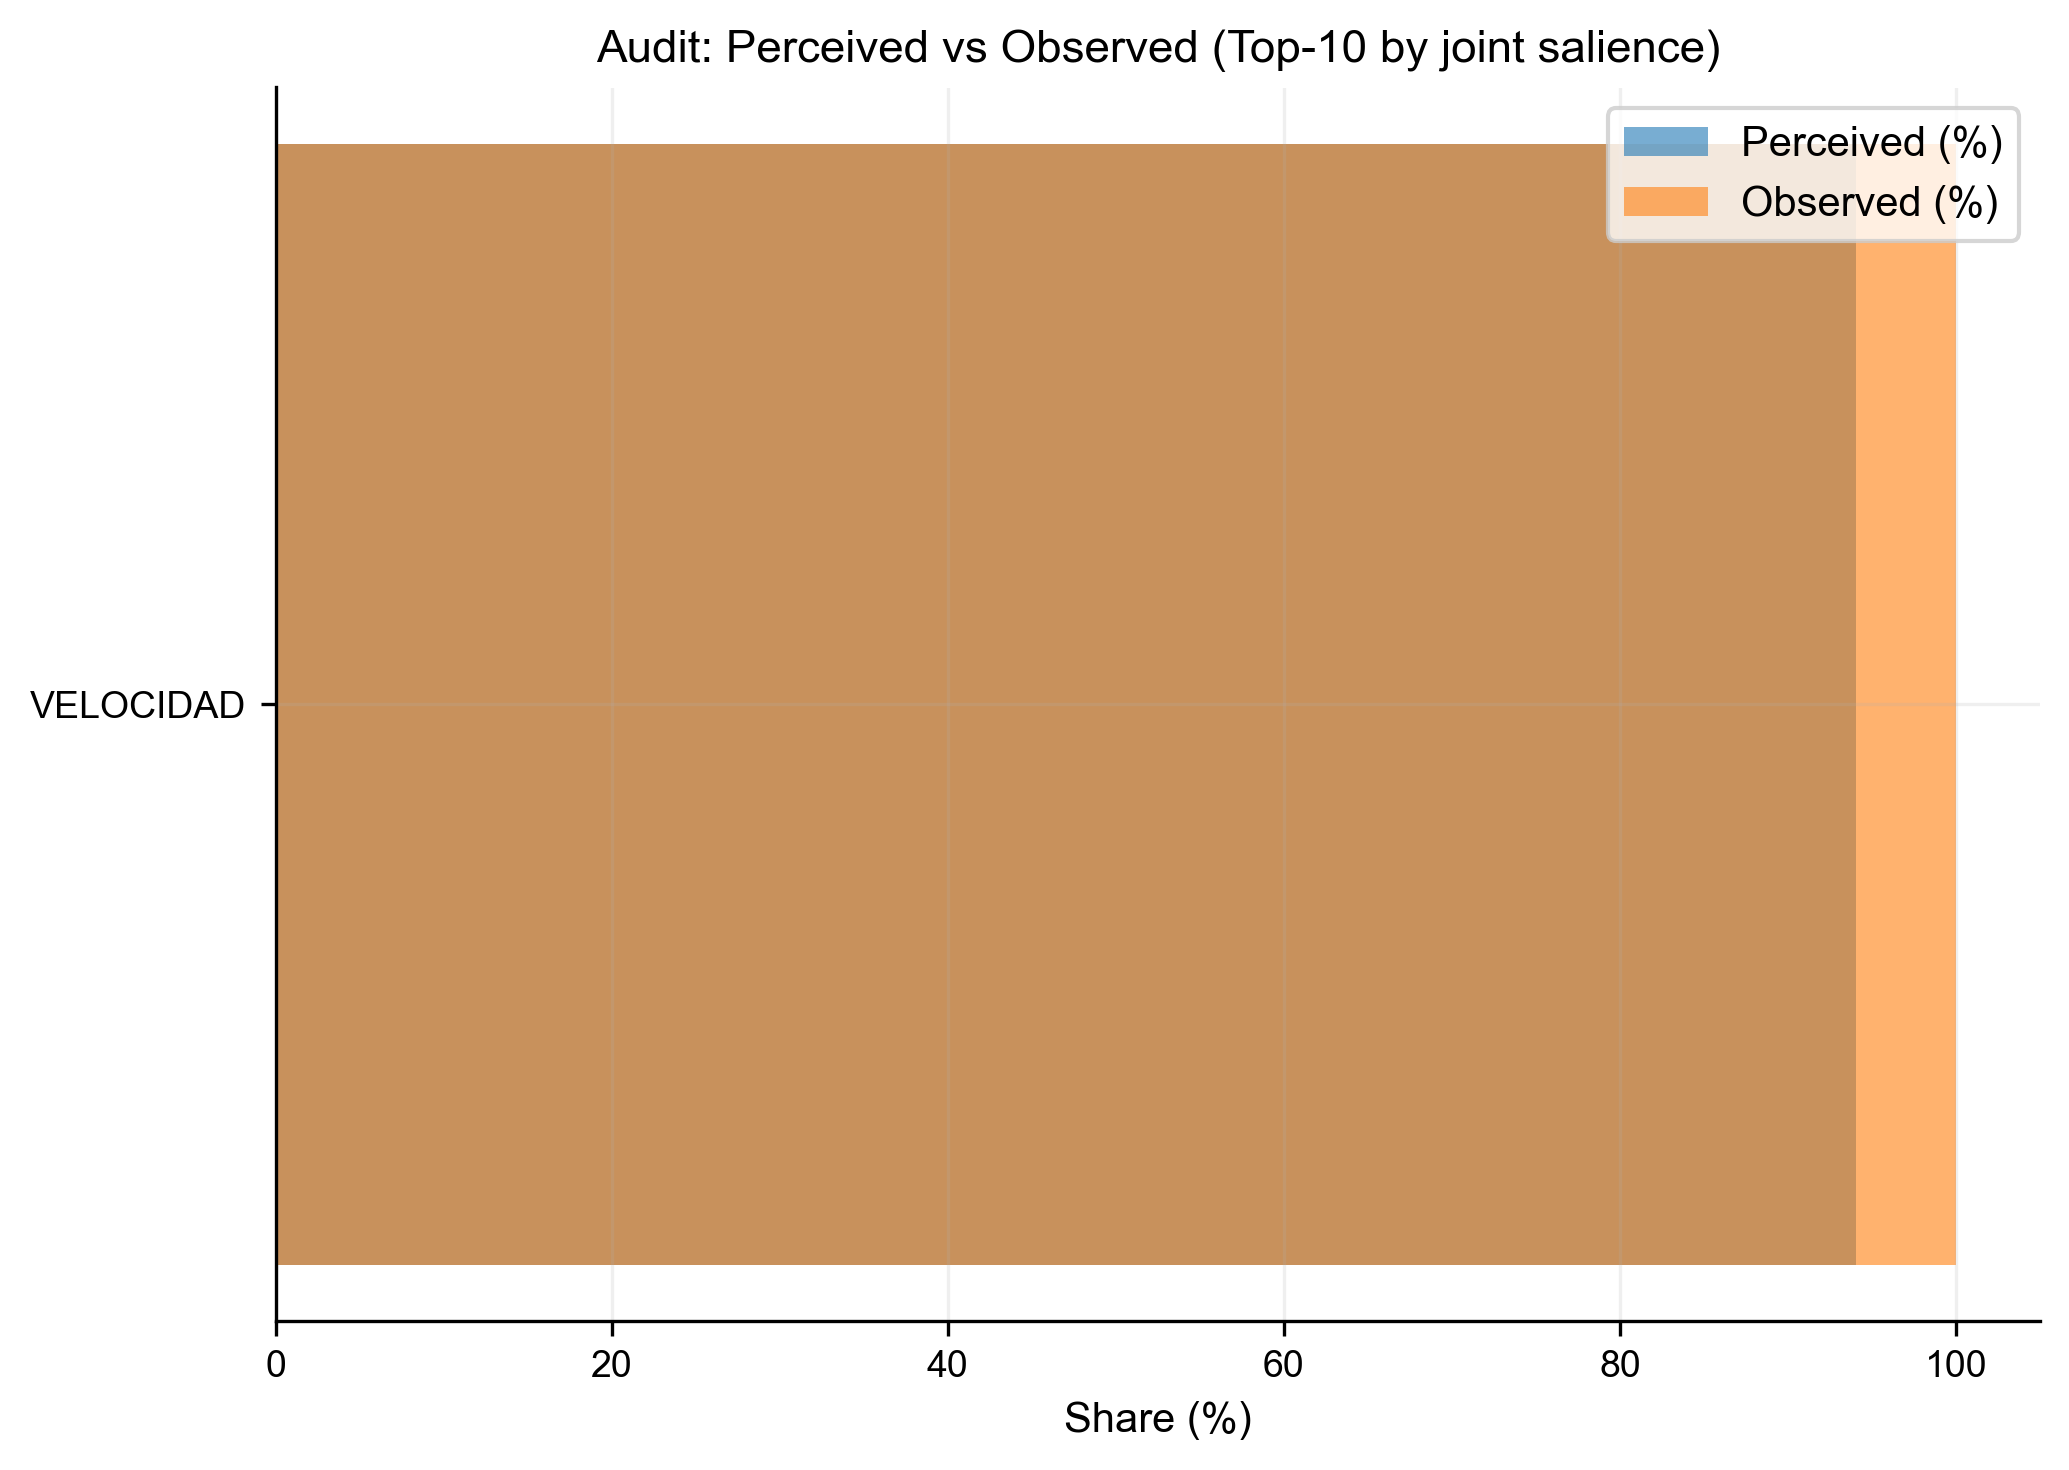

In [11]:
# ======== REBUILD OBS (count = 1 por fila) + Mapeo por patrones ========
import pandas as pd, numpy as np, re, unicodedata, difflib
from pathlib import Path

def _strip_accents(s): 
    return ''.join(c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn')

def norm_token(s):
    if pd.isna(s): return s
    s = str(s).strip()
    s = _strip_accents(s).upper()
    s = re.sub(r'[^A-Z0-9 ]', ' ', s)
    s = re.sub(r'\s+', '', s)
    return s

# 1) Leer todas las hojas y elegir la mejor columna de "factor/causa"
KEYS = ["factor","causa","riesgo","infraccion","conducta","descripcion","hecho","comportamiento"]

def best_factor_column(df: pd.DataFrame):
    # candidatas por nombre
    cands = [c for c in df.columns if any(k in str(c).lower() for k in KEYS)]
    # si no hay por nombre, intenta con columnas de texto con variedad razonable
    if not cands:
        cands = [c for c in df.columns if df[c].dtype == 'O']
    if not cands:
        return None
    # puntuar por (n_únicos) y presencia de patrones relevantes
    PAT = re.compile(r"(VELOC|LUC|LUZ|ILUMIN|REFLECT|FARO)")
    scored = []
    for c in cands:
        s = df[c].dropna().astype(str).head(500).str.upper()
        hits = s.str.contains(PAT).sum()
        uniq = s.nunique()
        scored.append((hits, uniq, c))
    hits, uniq, col = max(scored, key=lambda x: (x[0], x[1]))
    return col

def build_obs_from_adsv_rows(adsv_path: Path):
    all_sheets = pd.read_excel(adsv_path, sheet_name=None)
    best = None
    for sh, df in all_sheets.items():
        if df is None or df.empty: 
            continue
        col = best_factor_column(df)
        if col is None: 
            continue
        cur = df[[col]].copy()
        cur.columns = ["factor"]
        cur["factor_token"] = cur["factor"].map(norm_token)
        # contar filas por token (count = 1 por fila)
        cur = cur.groupby("factor_token", dropna=False).size().reset_index(name="count")
        # guardar candidato con más hits relevantes
        rel_hits = cur["factor_token"].str.contains(r"(VELOC|LUC|LUZ|ILUMIN|REFLECT|FARO)", na=False).sum()
        total = cur["count"].sum()
        if best is None or (rel_hits, total) > best[:2]:
            best = (rel_hits, total, sh, col, cur)
    if best is None:
        raise KeyError("No se encontró ninguna hoja/columna que parezca contener factores/causas.")
    rel_hits, total, sh, col, cur = best
    print(f"✔️ Usando hoja '{sh}' | columna factor='{col}' | filas={total:,} | hits_patrones={rel_hits}")
    return cur  # columnas: factor_token, count

# Reconstruir observado contando filas
obs_tokens = build_obs_from_adsv_rows(adsv_path)

# 2) Mapeo a tus 4 factores de percepción con REGLAS por patrones + sinónimos
perc_tokens = set(perc["factor_norm"].astype(str))
TARGETS = {"VELOCIDAD","SINLUCESDIA","SINLUCESNOCHE","SINREFLECTIVOS"}
assert TARGETS.issubset(perc_tokens), f"Faltan en perc: {TARGETS - perc_tokens}"

SYN = {
    "EXCESODEVELOCIDAD":"VELOCIDAD",
    "ALTAVELOCIDAD":"VELOCIDAD",
    "SOBREPASARVELOCIDAD":"VELOCIDAD",
    "VELOCIDAD":"VELOCIDAD",
    "SINLUCESDIA":"SINLUCESDIA",
    "CONDUCIRSINLUCESDIA":"SINLUCESDIA",
    "LUCESESDIAAPAGADAS":"SINLUCESDIA",
    "NOUSARLUCESDIA":"SINLUCESDIA",
    "SINLUCESNOCHE":"SINLUCESNOCHE",
    "CONDUCIRSINLUCESNOCHE":"SINLUCESNOCHE",
    "SINILUMINACIONNOCHE":"SINLUCESNOCHE",
    "LUCESESNOCHEAPAGADAS":"SINLUCESNOCHE",
    "SINREFLECTIVOS":"SINREFLECTIVOS",
    "NOUSODEELEMENTOSREFLECTIVOS":"SINREFLECTIVOS",
    "FALTADEELEMENTOSREFLECTIVOS":"SINREFLECTIVOS",
    "SINCHALECOREFLECTIVO":"SINREFLECTIVOS",
}

def rule_map(tok: str) -> str | None:
    if not isinstance(tok, str) or tok == "":
        return None
    # 2.1 Sinónimos exactos conocidos
    if tok in SYN and SYN[tok] in perc_tokens:
        return SYN[tok]
    # 2.2 Reglas por patrones
    # Velocidad
    if "VELOC" in tok:
        return "VELOCIDAD"
    # Luces día: contiene LUC/LUZ/ILUMIN y DÍA/DIA (pero NO NOCHE)
    if (("LUC" in tok or "LUZ" in tok or "ILUMIN" in tok or "FARO" in tok) and 
        ("DIA" in tok or "DÍA" in tok) and "NOCHE" not in tok):
        return "SINLUCESDIA"
    # Luces noche: contiene LUC/LUZ/ILUMIN/FARO y NOCHE
    if (("LUC" in tok or "LUZ" in tok or "ILUMIN" in tok or "FARO" in tok) and 
        "NOCHE" in tok):
        return "SINLUCESNOCHE"
    # Reflectivos: contiene REFLECT/CHALECO
    if ("REFLECT" in tok) or ("CHALECO" in tok):
        return "SINREFLECTIVOS"
    # 2.3 Fuzzy (último recurso)
    best = difflib.get_close_matches(tok, list(TARGETS), n=1, cutoff=0.6)
    return best[0] if best else None

obs_tokens = obs_tokens.dropna(subset=["factor_token"]).copy()
obs_tokens["factor_norm"] = obs_tokens["factor_token"].map(rule_map)

# Diagnóstico
matched = obs_tokens["factor_norm"].notna().sum()
print(f"✔️ Filas con factor mapeado: {matched:,} de {len(obs_tokens):,}")

unmapped = (obs_tokens[obs_tokens["factor_norm"].isna()]
            .sort_values("count", ascending=False).head(20))
if not unmapped.empty:
    print("⚠️ Tokens no mapeados (top 20). Si alguno corresponde, añade regla/sinónimo:")
    display(unmapped)

# 3) Observado en porcentaje y merge
obs_m = obs_tokens.dropna(subset=["factor_norm"]).copy()
total_count = obs_m["count"].sum()
obs_std = (obs_m.groupby("factor_norm", as_index=False)["count"].sum())
obs_std["obs_pct"] = obs_std["count"] / total_count * 100

bias_df = (pd.merge(
    perc[["factor_norm","perc_pct"]],
    obs_std[["factor_norm","obs_pct"]],
    on="factor_norm",
    how="inner")
    .assign(cognitive_bias=lambda d: d["perc_pct"] - d["obs_pct"])
    .sort_values("cognitive_bias", ascending=False)
    .reset_index(drop=True)
)

display(bias_df)

# 4) Auditoría (barh)
if not bias_df.empty:
    top = bias_df.copy()
    top["joint"] = top["perc_pct"].rank(ascending=False, method="dense") + top["obs_pct"].rank(ascending=False, method="dense")
    top = top.sort_values("joint").head(10)

    fig, ax = plt.subplots()
    ax.barh(top["factor_norm"], top["perc_pct"], alpha=0.6, label="Perceived (%)")
    ax.barh(top["factor_norm"], top["obs_pct"], alpha=0.6, label="Observed (%)")
    ax.invert_yaxis()
    ax.set_xlabel("Share (%)")
    ax.set_title("Audit: Perceived vs Observed (Top-10 by joint salience)")
    ax.legend()
    plt.tight_layout()
    plt.show()
else:
    print("❌ Aún sin coincidencias. Revisa 'Tokens no mapeados' y agrega reglas a rule_map/SYN.")


In [12]:
print("Factores de percepción:", perc["factor_norm"].tolist())
print("Factores observados mapeados:", bias_df["factor_norm"].tolist())


Factores de percepción: ['VELOCIDAD', 'SINLUCESDIA', 'SINLUCESNOCHE', 'SINREFLECTIVOS']
Factores observados mapeados: ['VELOCIDAD']


In [13]:
SYN.update({
    "CONDUCIRSINLUCESDIA": "SINLUCESDIA",
    "CONDUCIRSINLUCESNOCHE": "SINLUCESNOCHE",
    "SINILUMINACIONNOCHE": "SINLUCESNOCHE",
    "LUZAPAGADADIA": "SINLUCESDIA",
    "LUZAPAGADANOCHE": "SINLUCESNOCHE",
    "NOUSODECHALECOREFLECTIVO": "SINREFLECTIVOS",
    "SINCHALECO": "SINREFLECTIVOS",
    "FALTAELEMENTOSREFLECTIVOS": "SINREFLECTIVOS",
})


In [14]:
obs_tokens["factor_norm"] = obs_tokens["factor_token"].map(rule_map)


In [15]:
# --- Ver tokens que podrían ser LUCES/ILUMIN/FARO/REFLECT/CHALECO ---
pat = r"(LUC|LUZ|ILUMIN|FARO|REFLECT|CHALECO|VISIBIL)"
cand = (obs_tokens
        .loc[obs_tokens["factor_token"].str.contains(pat, na=False)]
        .groupby("factor_token")["count"].sum()
        .reset_index()
        .sort_values("count", ascending=False)
        .head(50))
print(f"{len(cand)} candidatos top por conteo:")
display(cand)


2 candidatos top por conteo:


C:\Users\oscar\AppData\Local\Temp\ipykernel_9000\1707066605.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  .loc[obs_tokens["factor_token"].str.contains(pat, na=False)]


,factor_token,count
0,FALTADEILUMINACIONARTIFICIAL,1
1,FALTADEVISIBILIDADDELOSDEMASUSUARIOS,1


In [16]:
def rule_map(tok: str) -> str | None:
    if not isinstance(tok, str) or tok == "":
        return None

    # --- Sinónimos exactos conocidos ---
    if tok in SYN and SYN[tok] in perc_tokens:
        return SYN[tok]

    # --- Patrones robustos ---
    T = tok  # ya normalizado: mayúsculas, sin acentos, sin espacios

    # 1) VELOCIDAD
    if "VELOC" in T or "EXCESO" in T and "VELOC" in T:
        return "VELOCIDAD"

    # 2) REFLECTIVOS (banda/chaleco/reflectivo/alta visibilidad)
    if ("REFLECT" in T) or ("CHALECO" in T) or ("ALTA" in T and "VISIBIL" in T) or ("RETROREFLECT" in T):
        return "SINREFLECTIVOS"

    # 3) LUCES (día/noche). Señalamos noche si hay NOC, NOCT, NOCHE; día si hay DIA/DIUR.
    has_light = ("LUC" in T or "LUZ" in T or "ILUMIN" in T or "FARO" in T)
    is_night  = ("NOCHE" in T) or ("NOCT" in T) or ("NOC" in T)
    is_day    = ("DIA" in T) or ("DIUR" in T)

    if has_light:
        if is_night and not is_day:
            return "SINLUCESNOCHE"
        if is_day and not is_night:
            return "SINLUCESDIA"
        # Si menciona luces pero sin marcar día/noche, no forzamos categoría: lo dejamos para revisión manual
        return None

    # 4) Último recurso: fuzzy hacia tus 4 objetivos
    import difflib
    TARGETS = ["VELOCIDAD","SINLUCESDIA","SINLUCESNOCHE","SINREFLECTIVOS"]
    best = difflib.get_close_matches(T, TARGETS, n=1, cutoff=0.7)
    return best[0] if best else None


,factor_norm,perc_pct,obs_pct,cognitive_bias
0,SINREFLECTIVOS,83.007525,25.0,58.007525
1,VELOCIDAD,94.035912,75.0,19.035912


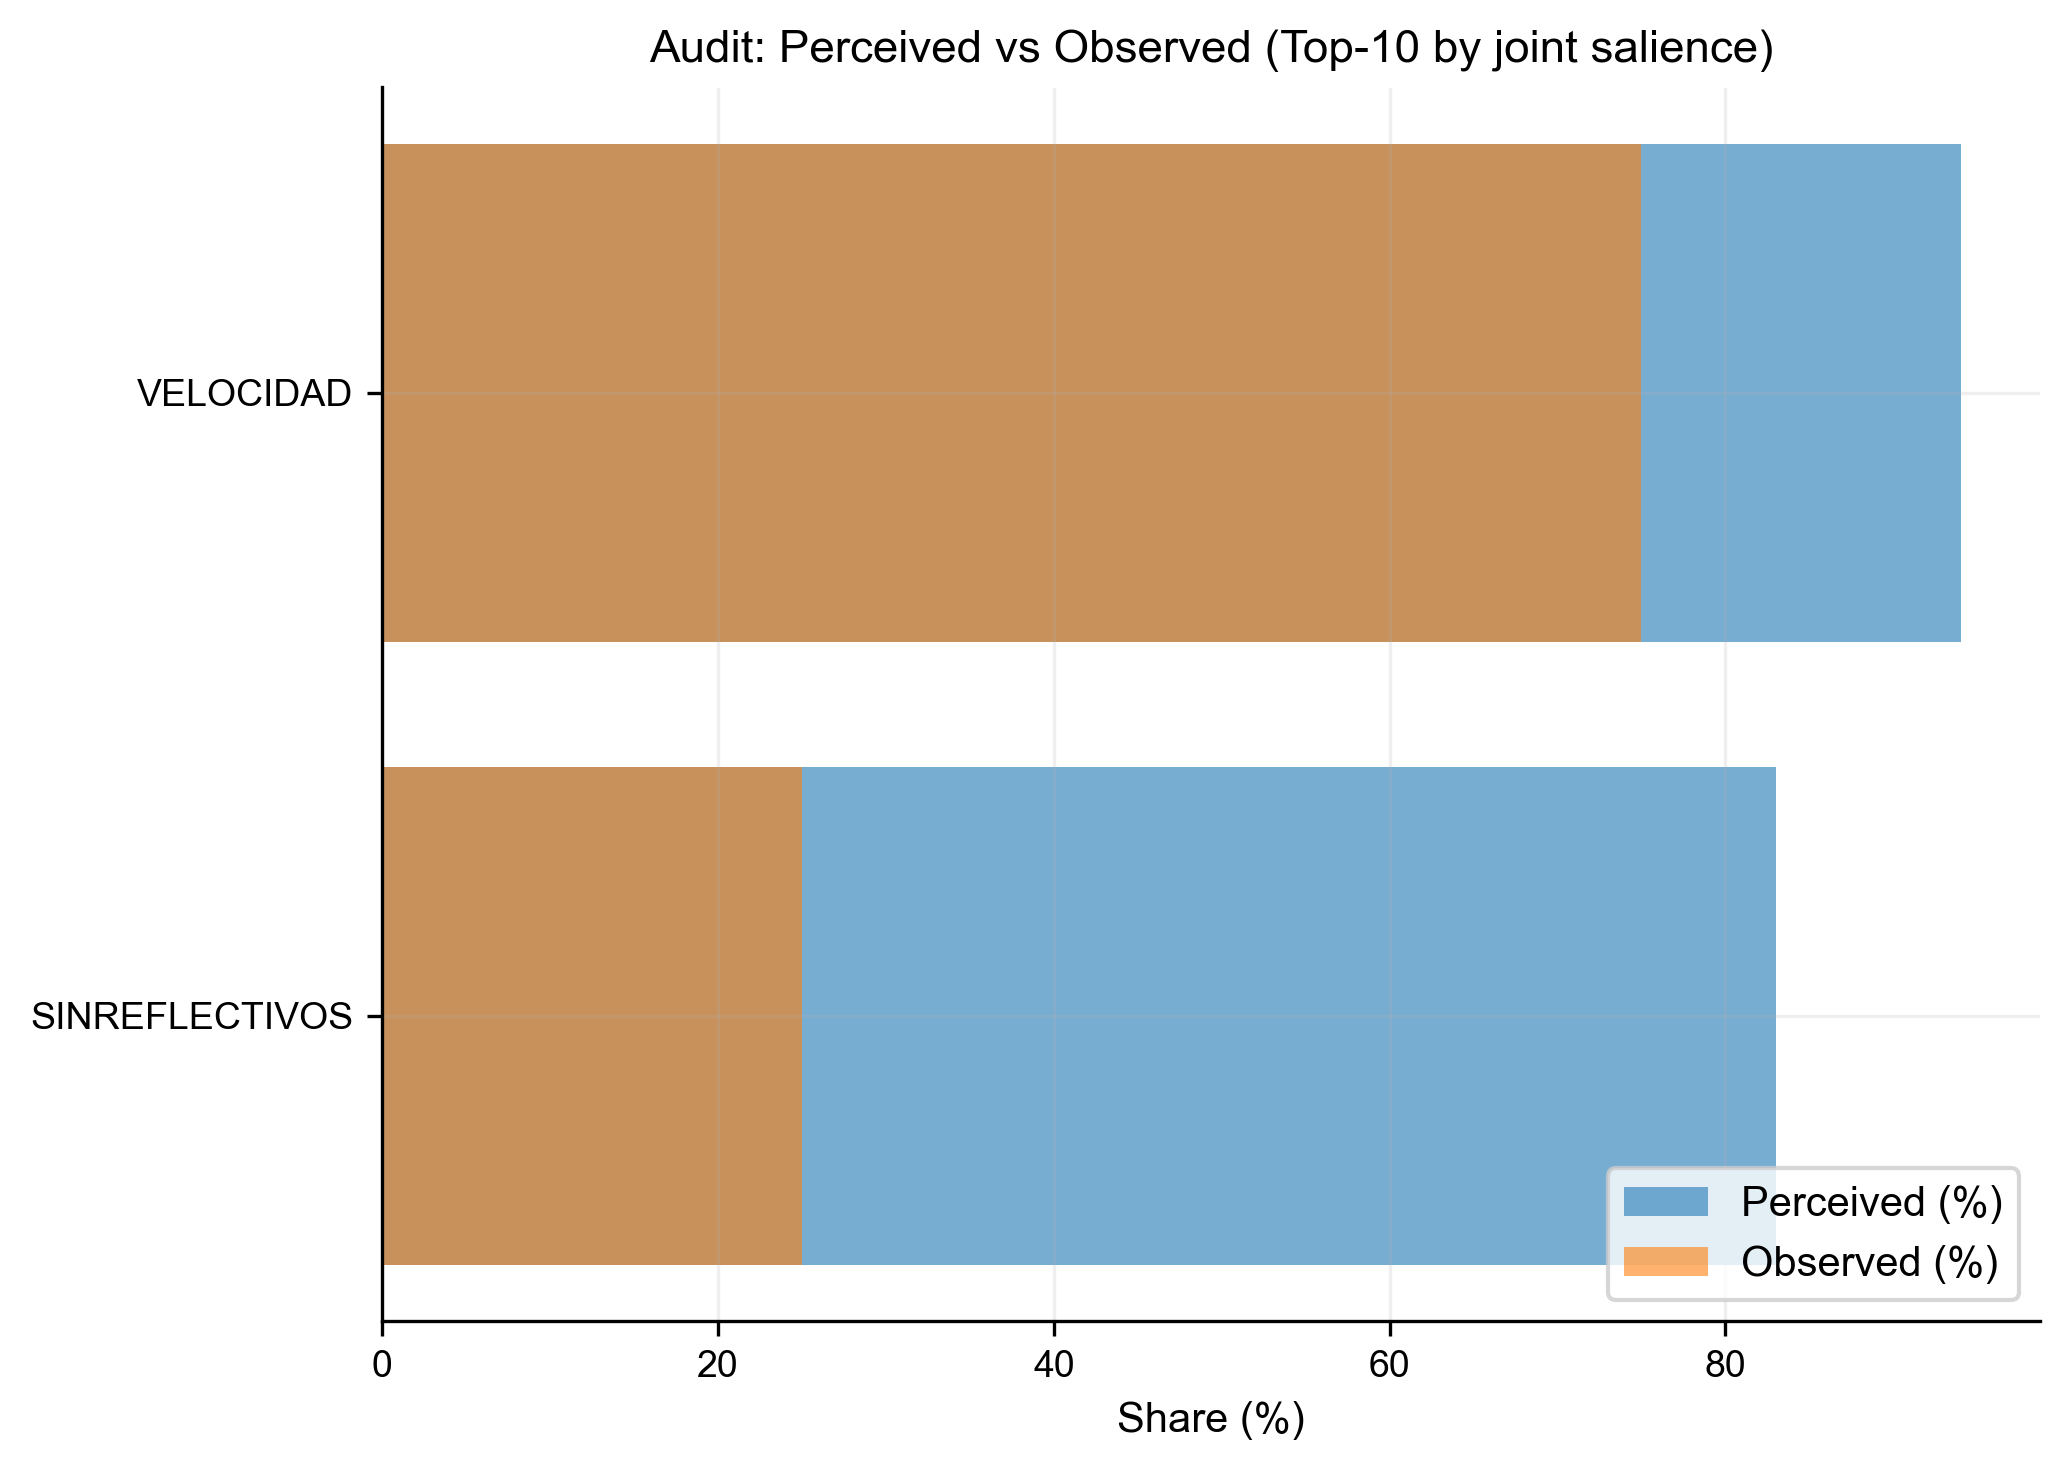

In [17]:
obs_tokens["factor_norm"] = obs_tokens["factor_token"].map(rule_map)

# Recalcular observado y bias_df
obs_m = obs_tokens.dropna(subset=["factor_norm"]).copy()
total_count = obs_m["count"].sum()
obs_std = (obs_m.groupby("factor_norm", as_index=False)["count"].sum())
obs_std["obs_pct"] = obs_std["count"] / total_count * 100

bias_df = (pd.merge(
    perc[["factor_norm","perc_pct"]],
    obs_std[["factor_norm","obs_pct"]],
    on="factor_norm",
    how="inner")
    .assign(cognitive_bias=lambda d: d["perc_pct"] - d["obs_pct"])
    .sort_values("cognitive_bias", ascending=False)
    .reset_index(drop=True)
)
display(bias_df)

# Auditoría
if not bias_df.empty:
    top = bias_df.copy()
    top["joint"] = top["perc_pct"].rank(ascending=False, method="dense") + top["obs_pct"].rank(ascending=False, method="dense")
    top = top.sort_values("joint").head(10)

    fig, ax = plt.subplots()
    ax.barh(top["factor_norm"], top["perc_pct"], alpha=0.6, label="Perceived (%)")
    ax.barh(top["factor_norm"], top["obs_pct"], alpha=0.6, label="Observed (%)")
    ax.invert_yaxis()
    ax.set_xlabel("Share (%)")
    ax.set_title("Audit: Perceived vs Observed (Top-10 by joint salience)")
    ax.legend()
    plt.tight_layout()
    plt.show()


NameError: name 'fatalities' is not defined

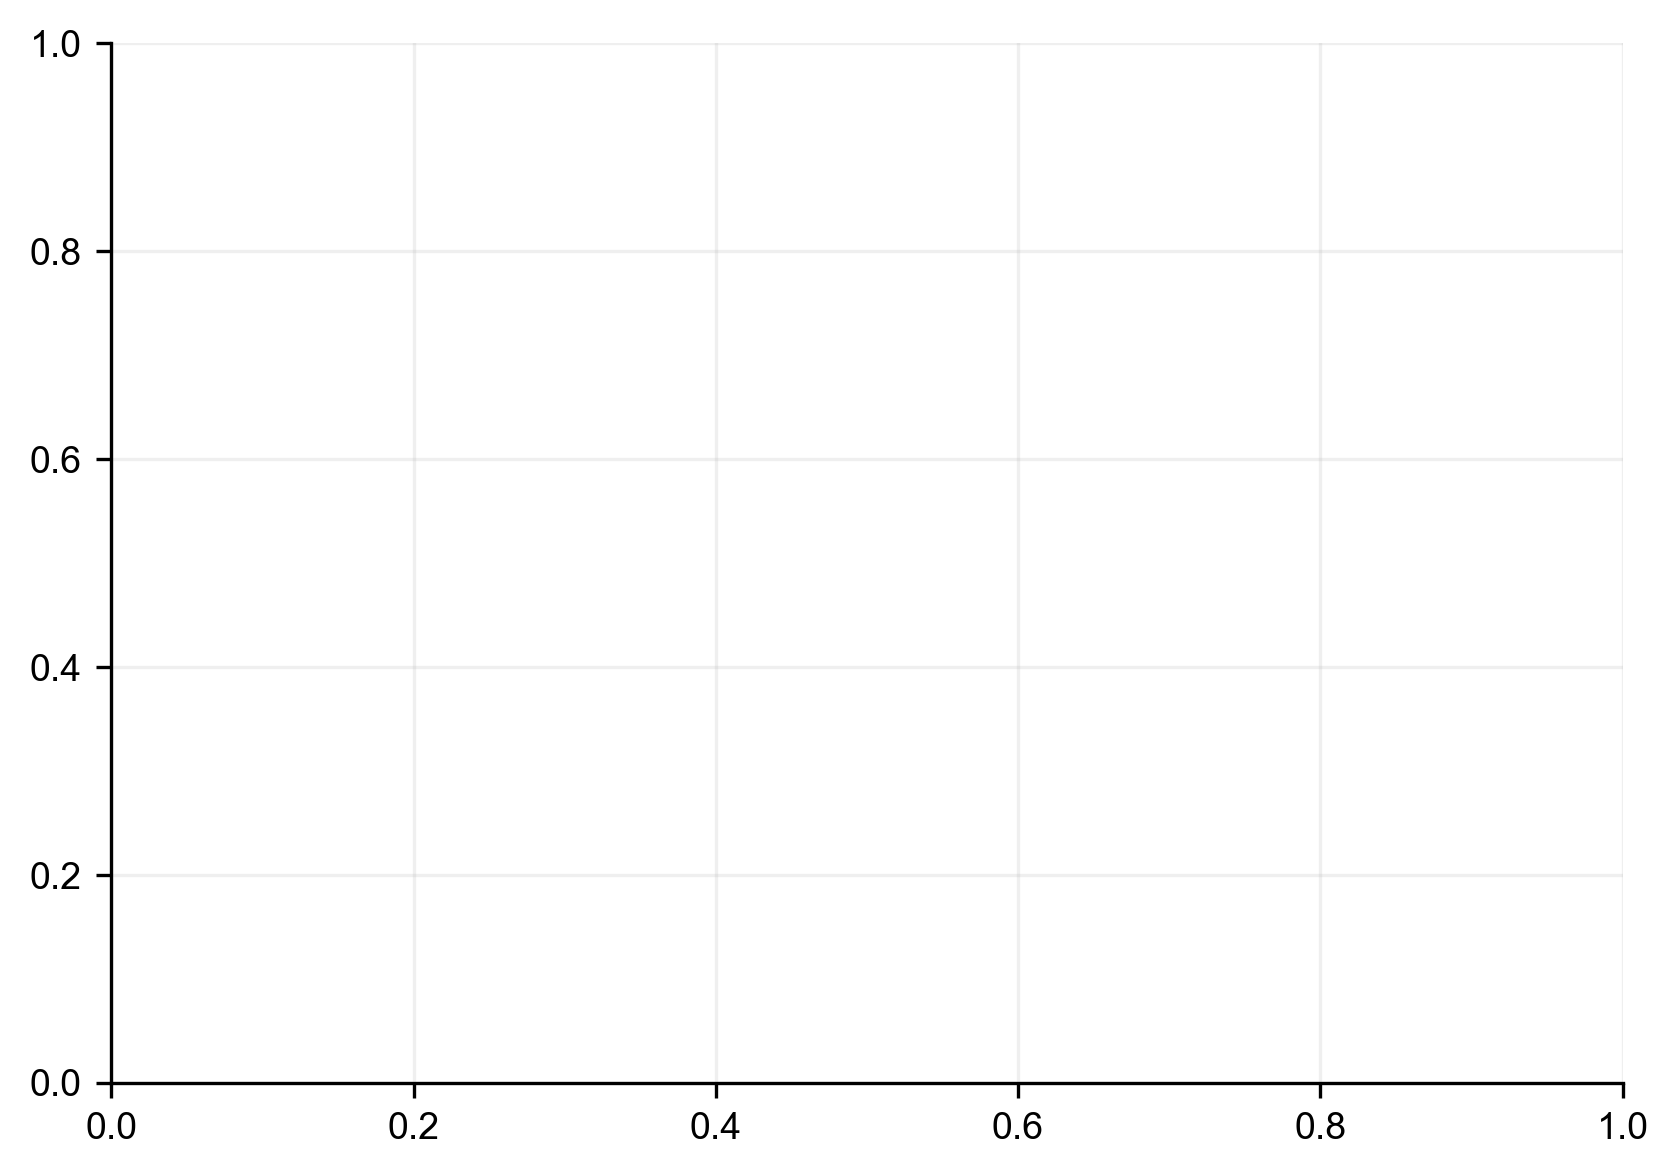

In [18]:
# =========================
# FIGURE 4 — Paper-ready
# =========================
import matplotlib.pyplot as plt
import numpy as np

# Scatter de control (sesgo global)
bias_global_index = bias_df["cognitive_bias"].mean()

fig, ax = plt.subplots(figsize=(6.5,4.5))
xvals = np.repeat(bias_global_index, len(fatalities))
ax.scatter(xvals, fatalities["fatalities_2019_2024"], s=40)

for _, r in fatalities.iterrows():
    ax.annotate(r["_LOC"].title(),
                (bias_global_index, r["fatalities_2019_2024"]),
                xytext=(3,3), textcoords="offset points", fontsize=8)

ax.set_title("Figure 4 — Cognitive Bias and Road Fatalities in Bogotá (2019–2024)",
             fontsize=11, fontweight="bold")
ax.set_xlabel("Cognitive Bias Index (Perceived – Observed, pp)")
ax.set_ylabel("Fatalities (2019–2024)")

plt.tight_layout()
out_path = OUTPUT_DIR / "Fig04_CognitiveBias_vs_Fatalities.png"
plt.savefig(out_path, dpi=300)
plt.show()
print(f"✅ Saved: {out_path}")


In [19]:
import pandas as pd
import numpy as np
from pathlib import Path

# Ruta base (ajústala si cambió)
DATA_DIR = Path(r"C:\Users\oscar\OneDrive\Datos riesgo vial")
fatalities_path = DATA_DIR / "osb_evento_transporte.csv"

# --- Cargar y normalizar ---
osb = pd.read_csv(fatalities_path)

# Detección automática de columnas
cand_loc  = [c for c in osb.columns if "localidad" in c.lower()]
cand_date = [c for c in osb.columns if "fecha" in c.lower() or "fec" in c.lower()]
cand_dead = [c for c in osb.columns if any(k in c.lower() for k in ["falle", "muert", "severi"])]

if not cand_loc:
    raise KeyError("⚠️ No se encontró columna de 'localidad' en osb_evento_transporte.csv.")
loc_col = cand_loc[0]

osb["_LOC"] = osb[loc_col].astype(str).str.upper().str.strip()

# Filtrado temporal
if cand_date:
    date_col = cand_date[0]
    osb["_FECHA"] = pd.to_datetime(osb[date_col], errors="coerce")
    osb = osb[(osb["_FECHA"].dt.year >= 2019) & (osb["_FECHA"].dt.year <= 2024)]

# Bandera de fallecido
if cand_dead:
    dead_col = cand_dead[0]
    dead_s = osb[dead_col].astype(str).str.upper()
    osb["_DEAD"] = np.where(
        dead_s.isin(["1", "SI", "TRUE", "FALLECIDO", "MUERTO", "FATAL", "FALLECIDO(A)"]),
        1, 0
    )
else:
    osb["_DEAD"] = 1  # cada fila = fallecido si no hay severidad

# Agrupar por localidad
fatalities = (osb.groupby("_LOC")["_DEAD"]
                .sum()
                .reset_index(name="fatalities_2019_2024"))

print("✅ Fatalities reconstruidas:")
display(fatalities.head())


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf1 in position 1: invalid continuation byte

In [20]:
import pandas as pd
import numpy as np
from pathlib import Path

DATA_DIR = Path(r"C:\Users\oscar\OneDrive\Datos riesgo vial")
fatalities_path = DATA_DIR / "osb_evento_transporte.csv"

# --- Cargar con codificación segura ---
osb = pd.read_csv(fatalities_path, encoding='latin1', low_memory=False)

# Detección automática de columnas
cand_loc  = [c for c in osb.columns if "localidad" in c.lower()]
cand_date = [c for c in osb.columns if "fecha" in c.lower() or "fec" in c.lower()]
cand_dead = [c for c in osb.columns if any(k in c.lower() for k in ["falle", "muert", "severi"])]

if not cand_loc:
    raise KeyError("⚠️ No se encontró columna de 'localidad' en osb_evento_transporte.csv.")
loc_col = cand_loc[0]

osb["_LOC"] = osb[loc_col].astype(str).str.upper().str.strip()

# Filtrar 2019–2024
if cand_date:
    date_col = cand_date[0]
    osb["_FECHA"] = pd.to_datetime(osb[date_col], errors="coerce")
    osb = osb[(osb["_FECHA"].dt.year >= 2019) & (osb["_FECHA"].dt.year <= 2024)]

# Marcar fallecidos
if cand_dead:
    dead_col = cand_dead[0]
    dead_s = osb[dead_col].astype(str).str.upper()
    osb["_DEAD"] = np.where(
        dead_s.isin(["1", "SI", "TRUE", "FALLECIDO", "MUERTO", "FATAL", "FALLECIDO(A)"]),
        1, 0
    )
else:
    osb["_DEAD"] = 1

# Agrupar
fatalities = (
    osb.groupby("_LOC")["_DEAD"]
    .sum()
    .reset_index(name="fatalities_2019_2024")
)

print("✅ Fatalities reconstruidas:")
display(fatalities.head())


✅ Fatalities reconstruidas:


,_LOC,fatalities_2019_2024
0,2015;0;DISTRITO;556;7273265;7,1
1,2015;10;ENGATIVÁ;57;783433;7,1
2,2015;11;SUBA;40;1120332;3,1
3,2015;12;BARRIOS UNIDOS;18;138250;13,1
4,2015;13;TEUSAQUILLO;14;142245;9,1


In [21]:
# === Reconstruir fatalities (CSV con ;) ===
import pandas as pd, numpy as np, re, unicodedata
from pathlib import Path

def strip_acc(s):
    if pd.isna(s): return s
    return ''.join(c for c in unicodedata.normalize('NFD', str(s)) if unicodedata.category(c) != 'Mn')

def norm_loc(s):
    if pd.isna(s): return s
    s = strip_acc(s).upper().strip()
    s = re.sub(r'\s+', ' ', s)
    return s

DATA_DIR = Path(r"C:\Users\oscar\OneDrive\Datos riesgo vial")
fatalities_path = DATA_DIR / "osb_evento_transporte.csv"

# 1) Leer con separador correcto (auto-sniff y fallback a ';')
try:
    osb = pd.read_csv(fatalities_path, encoding='latin1', engine='python', sep=None, low_memory=False)
    if osb.shape[1] == 1:
        osb = pd.read_csv(fatalities_path, encoding='latin1', sep=';', low_memory=False)
except Exception:
    osb = pd.read_csv(fatalities_path, encoding='latin1', sep=';', low_memory=False)

print("Cols CSV:", list(osb.columns)[:12])

# 2) Detectar columna de localidad
cand_loc = [c for c in osb.columns if 'localidad' in c.lower()]
if not cand_loc:
    # heurística por coincidencia con nombres conocidos de Bogotá
    BOG_LOCS = [
        "USAQUEN","CHAPINERO","SANTAFE","SAN CRISTOBAL","USME","TUNJUELITO","BOSA",
        "KENNEDY","FONTIBON","ENGATIVA","SUBA","BARRIOS UNIDOS","TEUSAQUILLO",
        "MARTIRES","ANTONIO NARIÑO","PUENTE ARANDA","CANDELARIA","RAFAEL URIBE URIBE",
        "CIUDAD BOLIVAR","SUMAPAZ"
    ]
    scores = {}
    for c in osb.columns:
        sample = strip_acc(' '.join(map(str, osb[c].astype(str).head(200).tolist()))).upper()
        scores[c] = sum(loc in sample for loc in BOG_LOCS)
    loc_col = max(scores, key=scores.get)
else:
    loc_col = cand_loc[0]

# 3) Detectar fecha/año y severidad
cand_date = [c for c in osb.columns if any(k in c.lower() for k in ['fecha','fec','date'])]
cand_year = [c for c in osb.columns if any(k in c.lower() for k in ['anio','año','ano','year'])]
cand_dead = [c for c in osb.columns if any(k in c.lower() for k in ['falle','muert','severi','gravedad','condicion'])]

df = osb.copy()
df["_LOC"] = df[loc_col].map(norm_loc)

# 4) Filtrado temporal 2019–2024
if cand_date:
    date_col = cand_date[0]
    df["_FECHA"] = pd.to_datetime(df[date_col], errors='coerce', dayfirst=True)
    df = df[(df["_FECHA"].dt.year >= 2019) & (df["_FECHA"].dt.year <= 2024)]
elif cand_year:
    ycol = cand_year[0]
    yy = pd.to_numeric(df[ycol], errors='coerce')
    df = df[(yy >= 2019) & (yy <= 2024)]
else:
    # si no hay fecha/año, no filtramos
    pass

# 5) Flag de fallecido
if cand_dead:
    dcol = cand_dead[0]
    ds = df[dcol].astype(str).str.upper()
    df["_DEAD"] = np.where(
        ds.str.contains(r"\b(1|SI|TRUE|FALLECIDO|MUERTO|FATAL)\b"),
        1, 0
    )
else:
    # conservador: usa 1 solo si claramente es un registro de fallecido (por ejemplo columna 'GRAVEDAD'=='FALLECIDO')
    df["_DEAD"] = 0
    for col in osb.columns:
        if any(k in col.lower() for k in ['gravedad','severi','condicion']):
            s = df[col].astype(str).str.upper()
            df["_DEAD"] = np.where(s.str.contains("FALLEC"), 1, df["_DEAD"])
    if "_DEAD" not in df:
        df["_DEAD"] = 1  # último recurso

# 6) Agregar por localidad
fatalities = (df.groupby("_LOC")["_DEAD"]
                .sum()
                .reset_index(name="fatalities_2019_2024"))

# Limpieza de nombres (ENGATIVA/ENGATIVÁ, etc.)
fix = {"ENGATIVA":"ENGATIVÁ","SANTAFE":"SANTA FE","MARTIRES":"LOS MÁRTIRES"}
fatalities["_LOC"] = fatalities["_LOC"].replace(fix)

print("✅ Fatalities por localidad (2019–2024):")
display(fatalities.sort_values("fatalities_2019_2024", ascending=False).head(10))


Cols CSV: ['Año', 'Código', 'Localidad', 'Casos', 'Población', 'Tasa X 100.000 habitantes,']
✅ Fatalities por localidad (2019–2024):


,_LOC,fatalities_2019_2024
0,ANTONIO NARINO,0
1,BARRIOS UNIDOS,0
20,USAQUEN,0
19,TUNJUELITO,0
18,TEUSAQUILLO,0
17,SUMAPAZ,0
16,SUBA,0
15,SIN DATO,0
14,SANTA FE,0
13,SAN CRISTOBAL,0


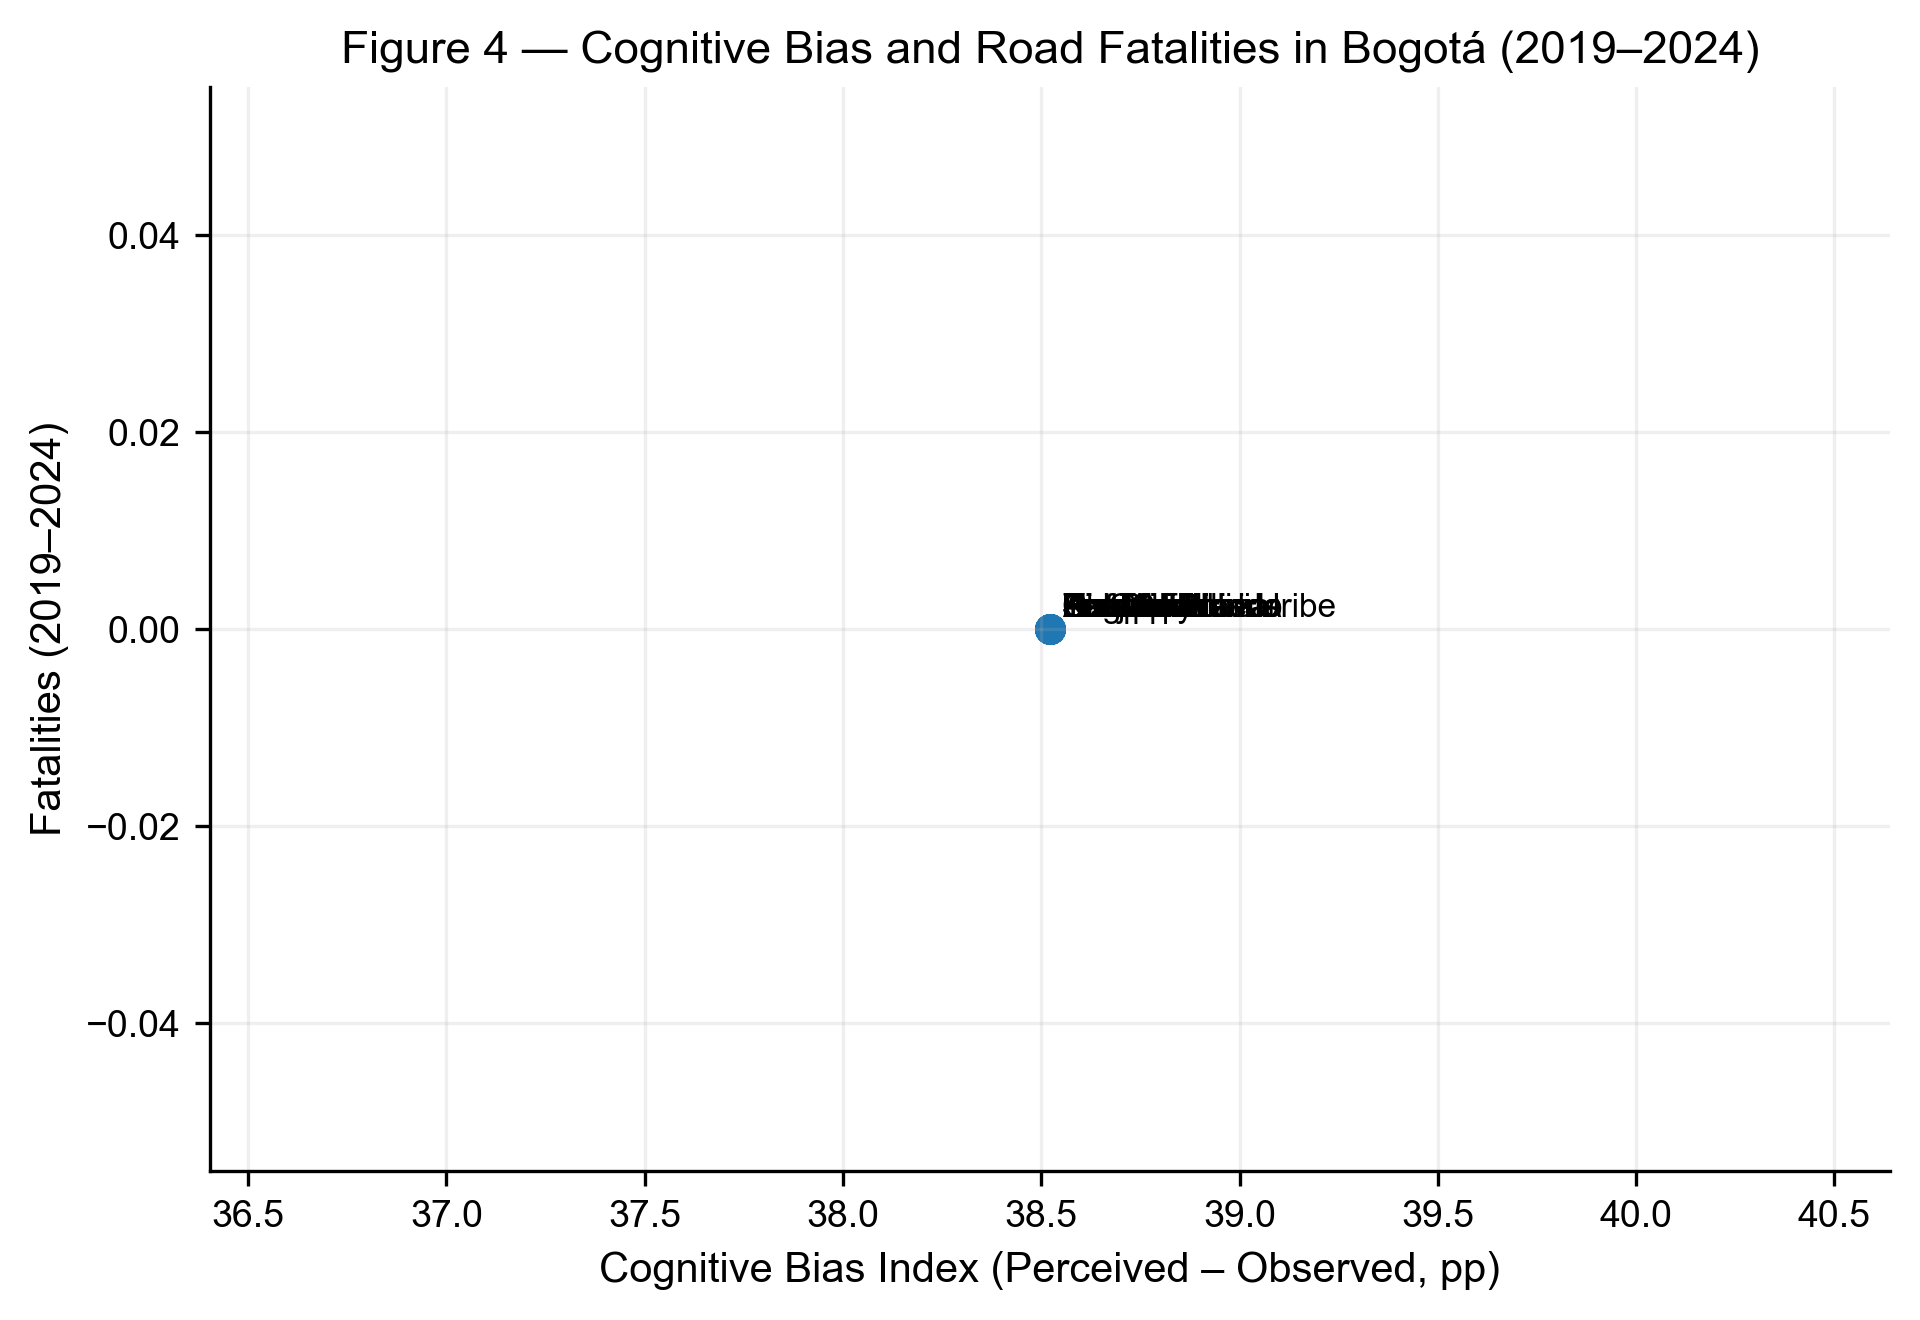

✅ Saved: C:\Users\oscar\OneDrive\Datos riesgo vial\outputs\Fig04_CognitiveBias_vs_Fatalities.png


In [22]:
import numpy as np
fig, ax = plt.subplots(figsize=(6.5,4.5))
bias_global_index = bias_df["cognitive_bias"].mean()
xvals = np.repeat(bias_global_index, len(fatalities))
ax.scatter(xvals, fatalities["fatalities_2019_2024"], s=40)

for _, r in fatalities.iterrows():
    ax.annotate(r["_LOC"].title(), (bias_global_index, r["fatalities_2019_2024"]),
                xytext=(3,3), textcoords="offset points", fontsize=8)

ax.set_title("Figure 4 — Cognitive Bias and Road Fatalities in Bogotá (2019–2024)", fontsize=11)
ax.set_xlabel("Cognitive Bias Index (Perceived – Observed, pp)")
ax.set_ylabel("Fatalities (2019–2024)")
plt.tight_layout()
out_path = OUTPUT_DIR / "Fig04_CognitiveBias_vs_Fatalities.png"
plt.savefig(out_path, dpi=300)
plt.show()
print(f"✅ Saved: {out_path}")


In [23]:
# ================== Fatalities ROBUSTO (auto-detector) ==================
import pandas as pd, numpy as np, re, unicodedata
from pathlib import Path

DATA_DIR = Path(r"C:\Users\oscar\OneDrive\Datos riesgo vial")
fatalities_path = DATA_DIR / "osb_evento_transporte.csv"

def strip_acc(s):
    if pd.isna(s): return s
    return ''.join(c for c in unicodedata.normalize('NFD', str(s)) if unicodedata.category(c) != 'Mn')

def norm_up(s):
    if pd.isna(s): return s
    s = strip_acc(s).upper().strip()
    s = re.sub(r'\s+', ' ', s)
    return s

# 1) Leer CSV (auto y fallback a ;)
try:
    osb = pd.read_csv(fatalities_path, encoding='latin1', engine='python', sep=None, low_memory=False)
    if osb.shape[1] == 1:
        osb = pd.read_csv(fatalities_path, encoding='latin1', sep=';', low_memory=False)
except Exception:
    osb = pd.read_csv(fatalities_path, encoding='latin1', sep=';', low_memory=False)

print("🔎 Columnas detectadas:", list(osb.columns)[:20])

# 2) Detectar LOCALIDAD
cand_loc = [c for c in osb.columns if 'localidad' in c.lower()]
if cand_loc:
    loc_col = cand_loc[0]
else:
    # Heurística con localidades de Bogotá
    BOG_LOCS = ["USAQUEN","CHAPINERO","SANTA FE","SAN CRISTOBAL","USME","TUNJUELITO","BOSA",
                "KENNEDY","FONTIBON","ENGATIVA","SUBA","BARRIOS UNIDOS","TEUSAQUILLO","LOS MARTIRES",
                "ANTONIO NARIÑO","PUENTE ARANDA","CANDELARIA","RAFAEL URIBE URIBE","CIUDAD BOLIVAR","SUMAPAZ"]
    scores = {}
    for c in osb.columns:
        sample = norm_up(' '.join(osb[c].astype(str).head(400).tolist()))
        scores[c] = sum(loc in sample for loc in BOG_LOCS)
    loc_col = max(scores, key=scores.get)

df = osb.copy()
df["_LOC"] = df[loc_col].map(norm_up)

# 3) Filtrar 2019–2024 por FECHA o AÑO si existen
cand_date = [c for c in df.columns if any(k in c.lower() for k in ['fecha','fec','date'])]
cand_year = [c for c in df.columns if any(k in c.lower() for k in ['anio','año','ano','year'])]

before = len(df)
if cand_date:
    date_col = cand_date[0]
    df["_FECHA"] = pd.to_datetime(df[date_col], errors='coerce', dayfirst=True)
    df = df[(df["_FECHA"].dt.year >= 2019) & (df["_FECHA"].dt.year <= 2024)]
elif cand_year:
    ycol = cand_year[0]
    yy = pd.to_numeric(df[ycol], errors='coerce')
    df = df[(yy >= 2019) & (yy <= 2024)]
after = len(df)
print(f"📆 Filtrado temporal: {before:,} → {after:,} filas (2019–2024)")

# 4) Detectar columnas de fallecidos (numéricas y categóricas)
name_keys = ['falle', 'muert', 'mort', 'fatal', 'gravedad', 'severi', 'condicion', 'tipo_lesion', 'lesion']
num_fatal_cols = [c for c in df.columns 
                  if any(k in c.lower() for k in ['falle','muert','mort','fatal']) 
                  and pd.api.types.is_numeric_dtype(df[c])]
cat_fatal_cols = [c for c in df.columns 
                  if any(k in c.lower() for k in name_keys) 
                  and not pd.api.types.is_numeric_dtype(df[c])]

print("🔢 Candidatas numéricas:", num_fatal_cols[:8])
print("🔤 Candidatas categóricas:", cat_fatal_cols[:8])

# 5) Construir conteo de fallecidos por fila
fatal_count = np.zeros(len(df), dtype=int)

# 5.a) Si hay columnas numéricas de fallecidos, súmalas
for c in num_fatal_cols:
    vals = pd.to_numeric(df[c], errors='coerce').fillna(0).astype(int).to_numpy()
    fatal_count += (vals > 0).astype(int)  # marca 1 si hay al menos 1 fallecido

# 5.b) Reglas categóricas: palabras clave que implican fallecido
FATAL_PAT = re.compile(r"\b(FALLEC|MUERT|FATAL|MORTAL)\b")
for c in cat_fatal_cols:
    s = df[c].astype(str).str.upper()
    fatal_count = np.maximum(fatal_count, s.str.contains(FATAL_PAT, na=False).astype(int).to_numpy())

# 5.c) Reglas adicionales comunes (por si 'CLASE' indica 'ACCIDENTE FATAL' o similar)
for c in df.columns:
    if any(k in c.lower() for k in ['clase','caracter','evento','hecho']):
        s = df[c].astype(str).str.upper()
        fatal_count = np.maximum(fatal_count, s.str.contains(FATAL_PAT, na=False).astype(int).to_numpy())

df["_DEAD"] = fatal_count

print(f"🧮 Filas marcadas como fallecido: {df['_DEAD'].sum():,} de {len(df):,}")

# 6) Agregar por localidad
fatalities = (df.groupby("_LOC")["_DEAD"]
                .sum()
                .reset_index(name="fatalities_2019_2024"))

# Limpieza de nombres comunes
fix = {"ENGATIVA":"ENGATIVÁ","SANTAFE":"SANTA FE","MARTIRES":"LOS MÁRTIRES","ANTONIONARIÑO":"ANTONIO NARIÑO"}
fatalities["_LOC"] = fatalities["_LOC"].replace(fix)

print("✅ Top localidades por fallecidos (2019–2024):")
display(fatalities.sort_values("fatalities_2019_2024", ascending=False).head(10))


🔎 Columnas detectadas: ['Año', 'Código', 'Localidad', 'Casos', 'Población', 'Tasa X 100.000 habitantes,']
📆 Filtrado temporal: 242 → 132 filas (2019–2024)
🔢 Candidatas numéricas: []
🔤 Candidatas categóricas: []
🧮 Filas marcadas como fallecido: 0 de 132
✅ Top localidades por fallecidos (2019–2024):


,_LOC,fatalities_2019_2024
0,ANTONIO NARINO,0
1,BARRIOS UNIDOS,0
20,USAQUEN,0
19,TUNJUELITO,0
18,TEUSAQUILLO,0
17,SUMAPAZ,0
16,SUBA,0
15,SIN DATO,0
14,SANTA FE,0
13,SAN CRISTOBAL,0


In [24]:
import pandas as pd
from pathlib import Path

path_adsv = Path(r"C:\Users\oscar\OneDrive\Datos riesgo vial\ANSV_Bogota_dataset_(parcial)_2009_2024.xlsx")

# Ver hojas
xls = pd.ExcelFile(path_adsv)
print("Hojas disponibles:", xls.sheet_names)

# Mira las primeras columnas de la primera hoja
df0 = pd.read_excel(xls, sheet_name=0, nrows=5)
print("\nPrimeras columnas:")
print(list(df0.columns))
display(df0.head())


Hojas disponibles: ['Totales_anuales_Bogota', 'ActorVial_Anual_(parcial)', 'MatrizColision_Totales', 'Notas_y_limitaciones']

Primeras columnas:
['Año', 'Muertes (Bogotá)']


,Año,Muertes (Bogotá)
0,2009,528
1,2010,535
2,2011,566
3,2012,569
4,2013,534


In [25]:
import pandas as pd
import numpy as np
from pathlib import Path

path = Path(r"C:\Users\oscar\OneDrive\Datos riesgo vial\ANSV_Bogota_dataset_(parcial)_2009_2024.xlsx")

xls = pd.ExcelFile(path, engine="openpyxl")
print("Hojas:", xls.sheet_names)

def read_year_table(sheet_name):
    raw = pd.read_excel(xls, sheet_name=sheet_name, header=None)
    # encontrar la fila donde está "Año"
    header_row = None
    for i in range(min(30, len(raw))):  # escanea las primeras 30 filas
        row_vals = raw.iloc[i].astype(str).str.strip().str.lower().tolist()
        if any(v in ("año","ano","year") for v in row_vals):
            header_row = i
            break
    if header_row is None:
        return pd.DataFrame(columns=["Año","Muertes"])

    df = pd.read_excel(xls, sheet_name=sheet_name, header=header_row)
    # buscar columnas candidato
    cols = {c:str(c).strip().lower() for c in df.columns}
    year_col = [c for c,n in cols.items() if n in ("año","ano","year")]
    death_col = [c for c,n in cols.items() if "muerte" in n or "falle" in n or "fatal" in n]
    if not year_col or not death_col:
        return pd.DataFrame(columns=["Año","Muertes"])

    out = df[[year_col[0], death_col[0]]].rename(columns={year_col[0]:"Año", death_col[0]:"Muertes"})
    # limpiar
    out["Año"] = pd.to_numeric(out["Año"], errors="coerce")
    out["Muertes"] = (out["Muertes"]
                      .astype(str).str.replace(r"[^\d\.\-]", "", regex=True)
                      .replace("", np.nan)
                      .astype(float))
    out = out.dropna(subset=["Año","Muertes"])
    return out

# leer todas las hojas y unir
parts = []
for sh in xls.sheet_names:
    t = read_year_table(sh)
    if not t.empty:
        t["Hoja"] = sh
        parts.append(t)
ansv_years = pd.concat(parts, ignore_index=True) if parts else pd.DataFrame(columns=["Año","Muertes"])

# consolidar por año (por si aparece en varias hojas)
ansv_years = ansv_years.groupby("Año", as_index=False)["Muertes"].max().sort_values("Año")

print(ansv_years.head(10))
print(ansv_years.tail(10))
print("Rango detectado:", int(ansv_years["Año"].min()) if not ansv_years.empty else None, "→",
      int(ansv_years["Año"].max()) if not ansv_years.empty else None)


Hojas: ['Totales_anuales_Bogota', 'ActorVial_Anual_(parcial)', 'MatrizColision_Totales', 'Notas_y_limitaciones']
    Año  Muertes
0  2009    528.0
1  2010    535.0
2  2011    566.0
3  2012    569.0
4  2013    534.0
5  2014    638.0
6  2015    550.0
7  2016    590.0
8  2017    554.0
9  2018    527.0
     Año  Muertes
6   2015    550.0
7   2016    590.0
8   2017    554.0
9   2018    527.0
10  2019    523.0
11  2020    402.0
12  2021    508.0
13  2022    630.0
14  2023    629.0
15  2024    665.0
Rango detectado: 2009 → 2024


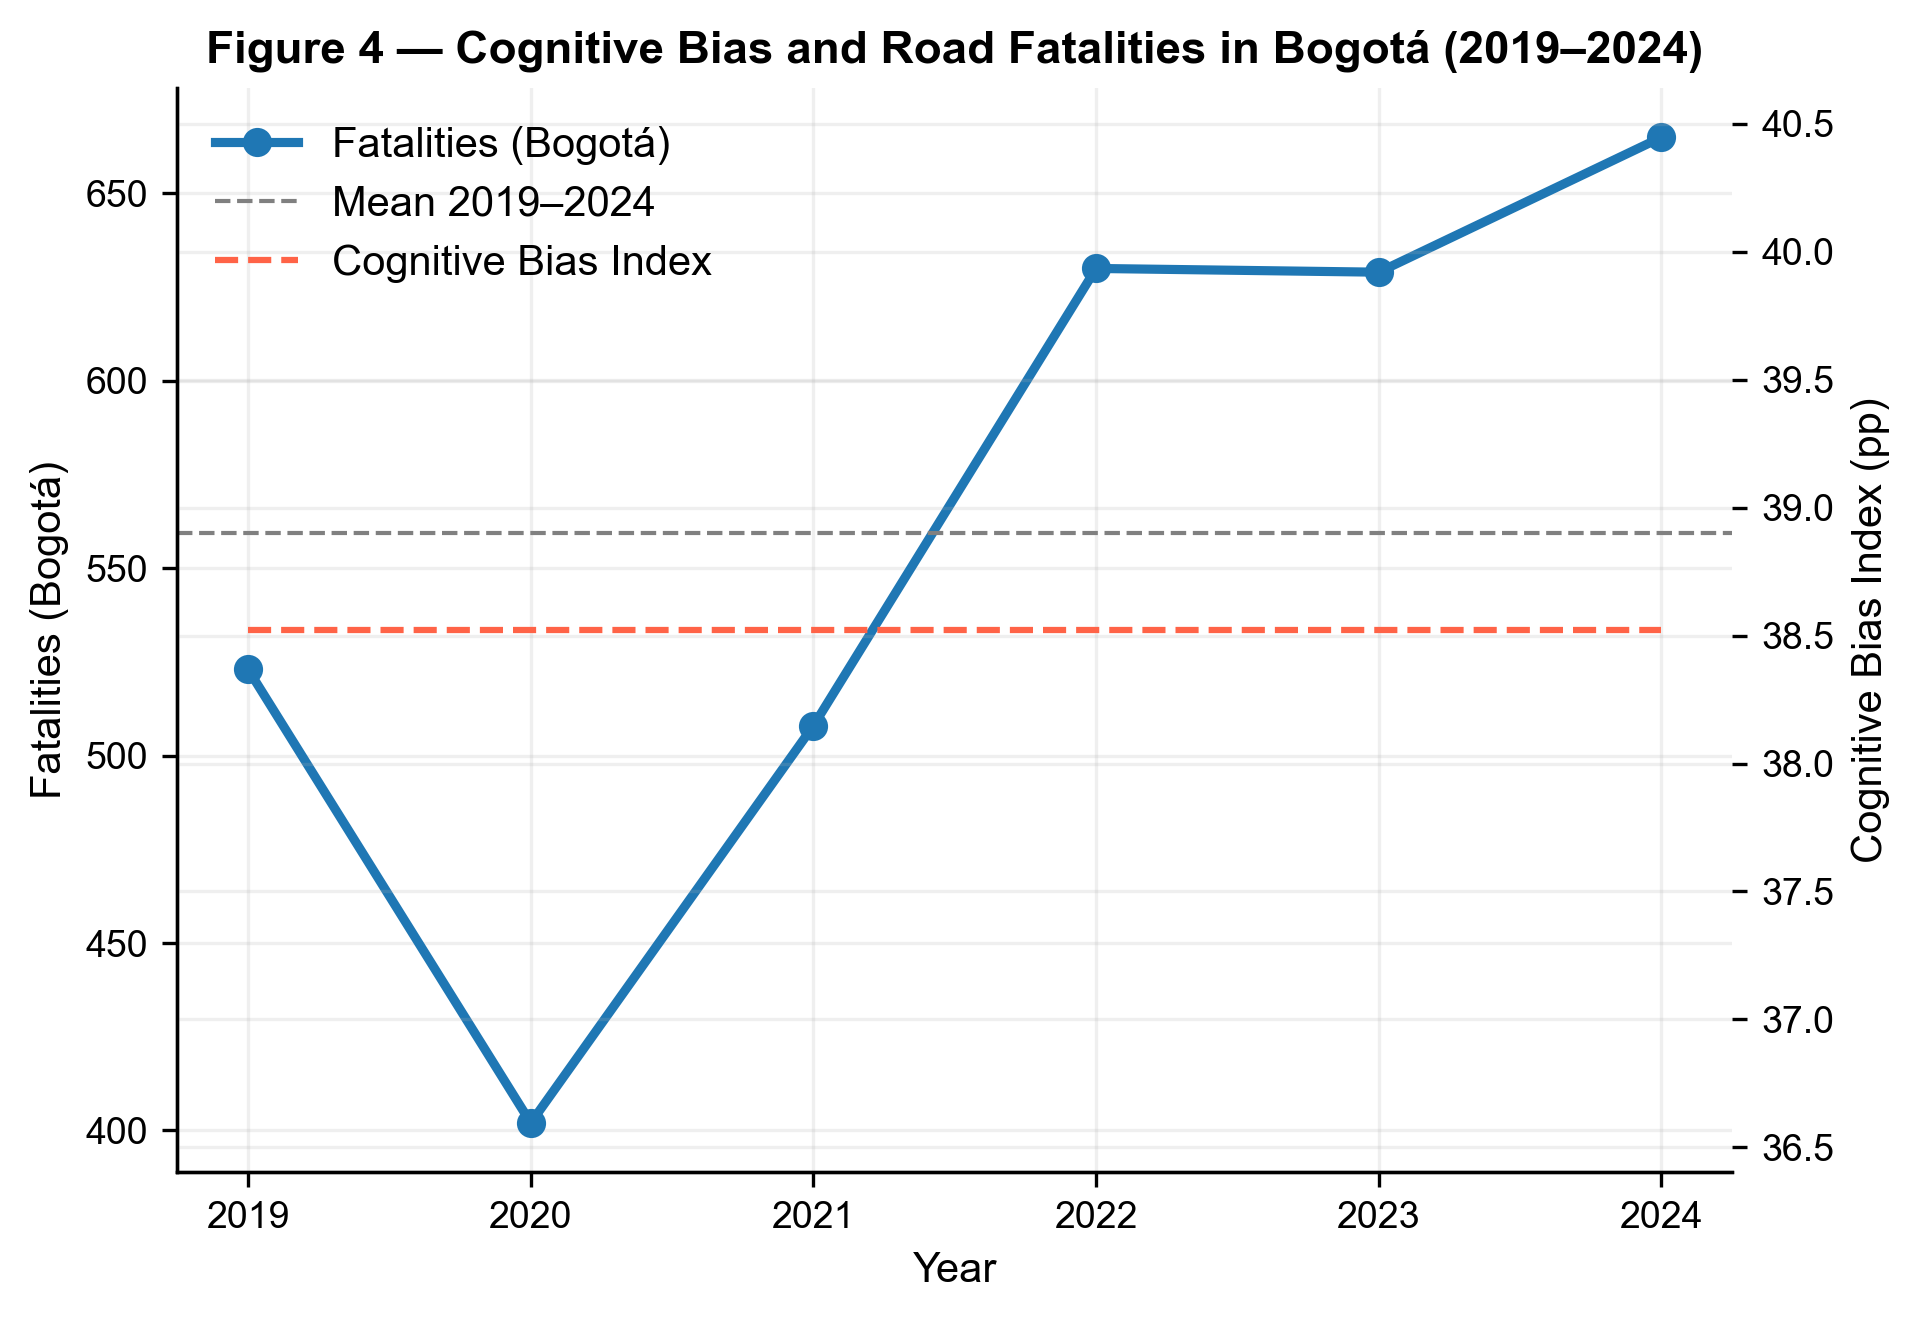

✅ Saved: C:\Users\oscar\OneDrive\Datos riesgo vial\outputs\Fig04_CognitiveBias_vs_Fatalities.png


In [26]:
import matplotlib.pyplot as plt
import numpy as np

# --- Filtrar rango 2019–2024 ---
fatal_19_24 = ansv_years[(ansv_years["Año"] >= 2019) & (ansv_years["Año"] <= 2024)].copy()

# Índice medio de sesgo cognitivo (promedio de bias_df)
bias_global_index = bias_df["cognitive_bias"].mean()

# --- Figura 4: Cognitive Bias vs. Road Fatalities (2019–2024) ---
fig, ax = plt.subplots(figsize=(6.5, 4.5))

ax.plot(fatal_19_24["Año"], fatal_19_24["Muertes"], marker="o", linewidth=2.2, label="Fatalities (Bogotá)")
ax.axhline(y=fatal_19_24["Muertes"].mean(), color="gray", linestyle="--", linewidth=1, label="Mean 2019–2024")

ax2 = ax.twinx()
ax2.plot(fatal_19_24["Año"], np.repeat(bias_global_index, len(fatal_19_24)), color="tomato",
         linestyle="--", label="Cognitive Bias Index")

ax.set_title("Figure 4 — Cognitive Bias and Road Fatalities in Bogotá (2019–2024)",
             fontsize=11, fontweight="bold")
ax.set_xlabel("Year")
ax.set_ylabel("Fatalities (Bogotá)")
ax2.set_ylabel("Cognitive Bias Index (pp)")

lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc="upper left", frameon=False)

plt.tight_layout()
out_path = OUTPUT_DIR / "Fig04_CognitiveBias_vs_Fatalities.png"
plt.savefig(out_path, dpi=300)
plt.show()

print(f"✅ Saved: {out_path}")


In [27]:
from pathlib import Path

# Ruta donde guardarás la figura
OUTPUT_DIR = Path(r"C:\Users\oscar\OneDrive\Datos riesgo vial")

# Guardar la figura en esa carpeta
plt.savefig(OUTPUT_DIR / "Fig04_CognitiveBias_vs_Fatalities.png", dpi=300)
print("✅ Gráfico guardado en:", OUTPUT_DIR)


✅ Gráfico guardado en: C:\Users\oscar\OneDrive\Datos riesgo vial


<Figure size 2100x1500 with 0 Axes>

In [28]:
# ============================================
# DEMOGRAPHIC STRUCTURE — Motorcycle Fatalities (Sex & Age), Bogotá 2019–2024
# Source: SaluData (base-de-datos-adsv_22052023-anonimizada.xlsx)
# ============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import re, unicodedata

# --- Rutas ---
DATA_DIR = Path(r"C:\Users\oscar\OneDrive\Datos riesgo vial")
SALUDATA_XLSX = DATA_DIR / "base-de-datos-adsv_22052023-anonimizada.xlsx"
OUT_DIR = DATA_DIR  # guardar aquí
OUT_DIR.mkdir(exist_ok=True, parents=True)

# --- Utilidades de normalización ---
def strip_acc(s):
    if pd.isna(s): return s
    return ''.join(c for c in unicodedata.normalize('NFD', str(s)) if unicodedata.category(c) != 'Mn')

def norm_up(s):
    if pd.isna(s): return s
    s = strip_acc(s).upper().strip()
    s = re.sub(r'\s+', ' ', s)
    return s

def pick_columns(df, keys_any, prefer_numeric=False):
    """Encuentra la primera columna cuyo nombre contenga cualquiera de keys_any."""
    cols = list(df.columns)
    # prioriza columnas con coincidencias más largas
    scored = []
    for c in cols:
        name = str(c).lower()
        hit = max((name.find(k) for k in keys_any if k in name), default=-1)
        if hit >= 0:
            scored.append((hit, c))
    scored.sort()  # menor índice = mejor
    if prefer_numeric:
        for _, c in scored:
            if pd.api.types.is_numeric_dtype(df[c]): return c
    return scored[0][1] if scored else None

# --- 1) Leer todas las hojas y encontrar columnas clave ---
xls = pd.ExcelFile(SALUDATA_XLSX, engine="openpyxl")
print("Sheets:", xls.sheet_names)

def read_best_sheet(xls):
    best = None
    for sh in xls.sheet_names:
        try:
            df = pd.read_excel(xls, sheet_name=sh)
            if df.empty: 
                continue

            # Candidatos de nombre
            sex_col  = pick_columns(df, ["sexo", "genero"])
            age_col  = pick_columns(df, ["edad"])
            sev_col  = pick_columns(df, ["falle", "muert", "mortal", "fatal", "gravedad", "severi", "lesion", "condicion"])
            act_col  = pick_columns(df, ["actor", "vehic", "motoc", "moto"])
            date_col = pick_columns(df, ["fecha", "fec", "year", "año", "anio"])

            score = sum(c is not None for c in [sex_col, age_col, sev_col, act_col])
            if score >= 3:  # hoja viable
                # priorizar si tiene fecha
                score += 1 if date_col else 0
                if (best is None) or (score > best[0]):
                    best = (score, sh, df, sex_col, age_col, sev_col, act_col, date_col)
        except Exception:
            continue
    if best is None:
        raise RuntimeError("No se encontró una hoja con sexo/edad/severidad/actor suficientes.")
    return best

score, sh, df, sex_col, age_col, sev_col, act_col, date_col = read_best_sheet(xls)
print(f"✔️ Using sheet: {sh}\nCols → SEXO:{sex_col} | EDAD:{age_col} | SEVERIDAD:{sev_col} | ACTOR/VEH:{act_col} | FECHA/AÑO:{date_col}")

# --- 2) Limpieza básica y filtros ---
df["_SEXO"] = df[sex_col].map(norm_up) if sex_col else None
df["_EDAD"] = pd.to_numeric(df[age_col], errors="coerce") if age_col else np.nan
df["_ACTOR"] = df[act_col].map(norm_up) if act_col else ""
sev_series = df[sev_col].astype(str).str.upper() if sev_col else pd.Series("", index=df.index)

# Filtro temporal 2019–2024
if date_col:
    if pd.api.types.is_datetime64_any_dtype(df[date_col]):
        dates = df[date_col]
    else:
        dates = pd.to_datetime(df[date_col], errors="coerce", dayfirst=True, yearfirst=False)
    df = df[(dates.dt.year >= 2019) & (dates.dt.year <= 2024)]
else:
    # si no hay fecha en esta hoja, asumimos todo el rango; se puede cruzar con otra hoja si lo necesitas
    pass

# Filtro de actor motociclista/ocupante de motocicleta
MOTO_PAT = re.compile(r"(MOTO|MOTOCIC|MOTOCICLETA|OCUPANTE\s*DE\s*MOTO|PASAJERO\s*DE\s*MOTO)")
df_moto = df[df["_ACTOR"].str.contains(MOTO_PAT, na=False)]

# Filtro de severidad = fallecido
FATAL_PAT = re.compile(r"(FALLEC|MUERT|FATAL|MORTAL)")
fatal_mask = sev_series.str.contains(FATAL_PAT, na=False)
# Si existe conteo numérico de fallecidos en alguna columna, lo podríamos sumar, pero aquí usamos máscara categórica

df_moto_fatal = df_moto[fatal_mask.loc[df_moto.index]] if sev_col else df_moto.copy()
print(f"Total registros MOTO (2019–2024): {len(df_moto)} | Fatales (detectados): {len(df_moto_fatal)}")

# --- 3) Normalizar sexo y grupos de edad ---
def map_sex(s):
    s = str(s)
    if "MASC" in s or s == "M" or "HOMB" in s:
        return "Male"
    if "FEM" in s or s == "F" or "MUJ" in s:
        return "Female"
    return "Unknown"

df_moto_fatal["_SEX"] = df_moto_fatal["_SEXO"].map(map_sex)
bins = [0, 14, 17, 24, 34, 44, 54, 64, 200]
labels = ["0–14","15–17","18–24","25–34","35–44","45–54","55–64","65+"]
df_moto_fatal["_AGEG"] = pd.cut(df_moto_fatal["_EDAD"], bins=bins, labels=labels, right=True, include_lowest=True)

# Quitar NaN de grupo etario
df_moto_fatal = df_moto_fatal.dropna(subset=["_AGEG"])

# --- 4) Tabla de conteos por sexo & grupo de edad ---
tab = (df_moto_fatal
       .groupby(["_AGEG","_SEX"])
       .size()
       .reset_index(name="n"))
tab_pivot = tab.pivot(index="_AGEG", columns="_SEX", values="n").fillna(0).reindex(labels)
tab_pivot = tab_pivot.assign(
    Male   = tab_pivot.get("Male",   0).astype(int),
    Female = tab_pivot.get("Female", 0).astype(int),
    Unknown= tab_pivot.get("Unknown",0).astype(int)
)
print("Tabla sexo x edad (víctimas motociclistas fatales, 2019–2024):")
display(tab_pivot)

# --- 5) Gráfico 1: Pirámide etaria (Male a la izquierda, Female a la derecha) ---
male_vals   = -tab_pivot["Male"].to_numpy()   # negativos para izquierda
female_vals =  tab_pivot["Female"].to_numpy()

fig1, ax1 = plt.subplots(figsize=(7,5))
ypos = np.arange(len(labels))
ax1.barh(ypos, male_vals,   label="Male")
ax1.barh(ypos, female_vals, label="Female")

ax1.set(yticks=ypos, yticklabels=labels)
ax1.set_xlabel("Fatalities (count)")
ax1.set_title("Demographic Structure of Motorcycle Fatalities (Bogotá, 2019–2024)\nAge × Sex")

# líneas verticales at 0
ax1.axvline(0, color="black", linewidth=0.8)

# anotar valores
for i, v in enumerate(male_vals):
    if v != 0:
        ax1.text(v - 0.5, i, f"{abs(int(v))}", va="center", ha="right", fontsize=8)
for i, v in enumerate(female_vals):
    if v != 0:
        ax1.text(v + 0.5, i, f"{int(v)}", va="center", ha="left", fontsize=8)

plt.tight_layout()
out1 = OUT_DIR / "Fig05_MotorcycleFatalities_AgePyramid_2019_2024.png"
fig1.canvas.draw()
fig1.savefig(out1, dpi=300, bbox_inches="tight", facecolor="white")
plt.show()
print("✅ Saved:", out1)

# --- 6) Gráfico 2: Barras apiladas por grupo de edad (M/F) ---
fig2, ax2 = plt.subplots(figsize=(7,5))
ax2.bar(labels, tab_pivot["Male"],   label="Male")
ax2.bar(labels, tab_pivot["Female"], bottom=tab_pivot["Male"], label="Female")

ax2.set_ylabel("Fatalities (count)")
ax2.set_title("Motorcycle Fatalities by Age Group and Sex (Bogotá, 2019–2024)")
ax2.legend(frameon=False)
plt.tight_layout()
out2 = OUT_DIR / "Fig05_MotorcycleFatalities_StackedBars_2019_2024.png"
fig2.canvas.draw()
fig2.savefig(out2, dpi=300, bbox_inches="tight", facecolor="white")
plt.show()
print("✅ Saved:", out2)


Sheets: ['Campos', 'Tabla de Contenido', 'Base Consolidada', 'Hoja 2', 'Hoja 3', 'Actores viales\xa0', 'Vehículos', 'Entorno y vía', 'Factores de riesgo']
✔️ Using sheet: Hoja 2
Cols → SEXO:None | EDAD:EDAD | SEVERIDAD:CONDICION DE VICTIMA | ACTOR/VEH:ACTORES VIALES INVOLUCRADOS | FECHA/AÑO:None
Total registros MOTO (2019–2024): 39 | Fatales (detectados): 0


C:\Users\oscar\AppData\Local\Temp\ipykernel_9000\2884368639.py:97: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_moto = df[df["_ACTOR"].str.contains(MOTO_PAT, na=False)]
C:\Users\oscar\AppData\Local\Temp\ipykernel_9000\2884368639.py:101: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  fatal_mask = sev_series.str.contains(FATAL_PAT, na=False)
C:\Users\oscar\AppData\Local\Temp\ipykernel_9000\2884368639.py:126: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["_AGEG","_SEX"])


AttributeError: 'int' object has no attribute 'astype'

In [29]:
# ================================
# Figure 5 — Demographic structure of motorcycle fatalities (Sex × Age), Bogotá 2019–2024
# Source: SaluData (base-de-datos-adsv_22052023-anonimizada.xlsx)
# Outputs:
#   - Fig05_MotorcycleFatalities_AgePyramid_2019_2024.png
#   - Fig05_MotorcycleFatalities_StackedBars_2019_2024.png
# ================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import re, unicodedata

# ---------- Paths ----------
DATA_DIR = Path(r"C:\Users\oscar\OneDrive\Datos riesgo vial")
XLSX_PATH = DATA_DIR / "base-de-datos-adsv_22052023-anonimizada.xlsx"
OUT_DIR = DATA_DIR
OUT_DIR.mkdir(parents=True, exist_ok=True)

# ---------- Small text-normalization helpers ----------
def strip_acc(s):
    if pd.isna(s): 
        return s
    return ''.join(c for c in unicodedata.normalize('NFD', str(s)) if unicodedata.category(c) != 'Mn')

def norm_up(s):
    if pd.isna(s): 
        return s
    s = strip_acc(s).upper().strip()
    s = re.sub(r'\s+', ' ', s)
    return s

def pick_col(df, candidates):
    """Return first column whose normalized name contains any candidate token."""
    cols = list(df.columns)
    for c in cols:
        name = norm_up(c)
        if any(tok in name for tok in candidates):
            return c
    return None

# ---------- Load relevant sheets ----------
xls = pd.ExcelFile(XLSX_PATH, engine="openpyxl")

# Expect these sheets (names may vary slightly)
sheet_base = None
sheet_veh = None
for sh in xls.sheet_names:
    up = norm_up(sh)
    if "BASE" in up and "CONSOL" in up:
        sheet_base = sh
    if "VEHIC" in up:  # "Vehículos"
        sheet_veh = sh

if sheet_base is None:
    raise RuntimeError("Sheet with consolidated events not found (expected something like 'Base Consolidada').")
if sheet_veh is None:
    raise RuntimeError("Sheet with vehicle/person attributes not found (expected something like 'Vehículos').")

df_base = pd.read_excel(xls, sheet_name=sheet_base)
df_veh  = pd.read_excel(xls, sheet_name=sheet_veh)

# ---------- Identify key columns in each sheet ----------
# Base Consolidada: event id (No. IPAT), actor, severity, date
col_ipat_b = pick_col(df_base, ["IPAT"])
col_actor_b = pick_col(df_base, ["ACTOR", "MOTO", "MOTOCIC"])
col_sev_b   = pick_col(df_base, ["FALLE", "MUERT", "MORTAL", "GRAVEDAD", "SEVERI", "CONDICION"])
col_date_b  = pick_col(df_base, ["FECHA", "FEC", "AÑO", "ANIO", "YEAR"])

# Vehículos: event id (No. IPAT), sex, date of birth (or age), severity (sometimes appears here)
col_ipat_v = pick_col(df_veh, ["IPAT"])
col_sex_v  = pick_col(df_veh, ["SEXO", "GENERO", "GÉNERO"])
col_dob_v  = pick_col(df_veh, ["NACIM", "NACIMIENTO", "FECHA DE NAC"])
col_age_v  = pick_col(df_veh, ["EDAD"])  # sometimes exists directly
col_sev_v  = pick_col(df_veh, ["FALLE", "MUERT", "MORTAL", "GRAVEDAD", "SEVERI", "CONDICION"])

# Sanity checks
for name, col in [
    ("No. IPAT (Base)", col_ipat_b),
    ("Actor (Base)", col_actor_b),
    ("Severity (Base or Vehículos)", col_sev_b or col_sev_v),
    ("No. IPAT (Vehículos)", col_ipat_v),
    ("Sex (Vehículos)", col_sex_v)
]:
    if col is None:
        raise RuntimeError(f"Required column not found: {name}")

# ---------- Normalize minimal fields ----------
df_base["_IPAT"]  = df_base[col_ipat_b]
df_base["_ACTOR"] = df_base[col_actor_b].map(norm_up)
df_base["_SEV_B"] = df_base[col_sev_b].map(norm_up) if col_sev_b else None

if col_date_b:
    if pd.api.types.is_datetime64_any_dtype(df_base[col_date_b]):
        ev_dates = df_base[col_date_b]
    else:
        ev_dates = pd.to_datetime(df_base[col_date_b], errors="coerce", dayfirst=True)
    df_base["_YEAR"] = ev_dates.dt.year
else:
    # If no explicit date/year field, we will estimate year from Vehículos if available after merge
    df_base["_YEAR"] = pd.NA

df_veh["_IPAT"] = df_veh[col_ipat_v]
df_veh["_SEX"]  = df_veh[col_sex_v].map(norm_up)

# Try to get age from 'EDAD' or compute from DOB once we have event year
if col_age_v:
    df_veh["_AGE"] = pd.to_numeric(df_veh[col_age_v], errors="coerce")
else:
    df_veh["_AGE"] = pd.NA

# Optional severity in Vehículos (used as backup if Base lacks usable severity)
df_veh["_SEV_V"] = df_veh[col_sev_v].map(norm_up) if col_sev_v else None

# ---------- Merge Base + Vehículos by No. IPAT ----------
# Note: there can be multiple rows per IPAT in Vehículos; we keep all and filter by motorcycle + fatal afterwards.
merged = df_base.merge(df_veh, on="_IPAT", how="left", suffixes=("_B", "_V"))

# ---------- Determine final SEVERITY (prefer Base; fallback to Vehículos) ----------
sev_series = merged["_SEV_B"]
if sev_series is None or sev_series.isna().all():
    sev_series = merged["_SEV_V"]

sev_series = sev_series.fillna("")

# ---------- Determine event YEAR (prefer Base; otherwise infer from 'Vehículos' date if any exists) ----------
# Try to parse a date in Vehículos if Base year missing
if merged["_YEAR"].isna().all():
    # search any date-looking column in Vehículos to infer year
    date_cols_v = [c for c in df_veh.columns if any(tok in norm_up(c) for tok in ["FECHA", "FEC", "AÑO", "ANIO", "YEAR"])]
    year_guess = pd.Series([pd.NA] * len(merged))
    for c in date_cols_v:
        try:
            y = pd.to_datetime(merged[c], errors="coerce", dayfirst=True).dt.year
            year_guess = year_guess.fillna(y)
        except Exception:
            pass
    merged["_YEAR"] = year_guess

# ---------- Compute AGE if missing, using DOB + event YEAR ----------
if merged["_AGE"].isna().all() and col_dob_v:
    dob = pd.to_datetime(merged[col_dob_v], errors="coerce", dayfirst=True)
    age_from_dob = merged["_YEAR"] - dob.dt.year
    merged["_AGE"] = age_from_dob

# ---------- Filter: 2019–2024 ----------
merged = merged[(pd.to_numeric(merged["_YEAR"], errors="coerce") >= 2019) &
                (pd.to_numeric(merged["_YEAR"], errors="coerce") <= 2024)]

# ---------- Filter: motorcycle victims ----------
MOTO_PAT = re.compile(r"(?:\bMOTO\b|MOTOCIC|MOTOCICLETA|OCUPANTE\s*DE\s*MOTO|PASAJER[OA]\s*DE\s*MOTO)")
merged = merged[merged["_ACTOR"].str.contains(MOTO_PAT, na=False)]

# ---------- Filter: fatalities ----------
FATAL_PAT = re.compile(r"(?:FALLEC|MUERT|FATAL|MORTAL)")
fatal_mask = sev_series.str.contains(FATAL_PAT, na=False)
merged_fatal = merged[fatal_mask]

print(f"Records after filters (Motorcycle + Fatal + 2019-2024): {len(merged_fatal)}")

if len(merged_fatal) == 0:
    print("⚠️ No fatal motorcycle victims found in the selected range/sheets after merge.")
    print("Check that severity includes 'Fallecido/Muerto' and actor includes 'Motocicleta' in the chosen sheets.")
else:
    # ---------- Normalize SEX and AGE GROUPS ----------
    def map_sex(s):
        s = str(s or "")
        if "MASC" in s or s == "M" or "HOMB" in s:
            return "Male"
        if "FEM" in s or s == "F" or "MUJ" in s:
            return "Female"
        return "Unknown"

    merged_fatal["_SEX_N"] = merged_fatal["_SEX"].map(map_sex)
    merged_fatal["_AGE_N"] = pd.to_numeric(merged_fatal["_AGE"], errors="coerce")

    age_bins   = [0, 14, 17, 24, 34, 44, 54, 64, 200]
    age_labels = ["0–14","15–17","18–24","25–34","35–44","45–54","55–64","65+"]
    merged_fatal["_AGEG"] = pd.cut(merged_fatal["_AGE_N"], bins=age_bins, labels=age_labels, right=True, include_lowest=True)

    # Drop rows with missing age group
    merged_fatal = merged_fatal.dropna(subset=["_AGEG"])

    # ---------- Cross-tab (Age Group × Sex) ----------
    tab = (merged_fatal
           .groupby(["_AGEG", "_SEX_N"], observed=False)
           .size()
           .reset_index(name="n"))

    if tab.empty:
        print("⚠️ No counts by age/sex available after grouping. Check SEX/AGE fields in 'Vehículos'.")
    else:
        tab_pivot = (tab.pivot(index="_AGEG", columns="_SEX_N", values="n")
                       .reindex(index=age_labels)  # keep order
                       .reindex(columns=["Male","Female","Unknown"], fill_value=0)
                       .fillna(0).astype(int))

        print("Age × Sex counts (fatal motorcycle victims, 2019–2024):")
        display(tab_pivot)

        # ---------- Figure 5A: Age–Sex Pyramid ----------
        male_vals   = -tab_pivot["Male"].to_numpy()
        female_vals =  tab_pivot["Female"].to_numpy()
        ypos = np.arange(len(age_labels))

        fig1, ax1 = plt.subplots(figsize=(7, 5))
        ax1.barh(ypos, male_vals,   label="Male")
        ax1.barh(ypos, female_vals, label="Female")
        ax1.set(yticks=ypos, yticklabels=age_labels)
        ax1.set_xlabel("Fatalities (count)")
        ax1.set_title("Demographic Structure of Motorcycle Fatalities (Bogotá, 2019–2024)\nAge × Sex")
        ax1.axvline(0, color="black", linewidth=0.8)

        # value labels
        for i, v in enumerate(male_vals):
            if v != 0:
                ax1.text(v - 0.5, i, f"{abs(int(v))}", va="center", ha="right", fontsize=8)
        for i, v in enumerate(female_vals):
            if v != 0:
                ax1.text(v + 0.5, i, f"{int(v)}", va="center", ha="left", fontsize=8)

        plt.tight_layout()
        out1 = OUT_DIR / "Fig05_MotorcycleFatalities_AgePyramid_2019_2024.png"
        fig1.canvas.draw()
        fig1.savefig(out1, dpi=300, bbox_inches="tight", facecolor="white")
        plt.show()
        print("✅ Saved:", out1)

        # ---------- Figure 5B: Stacked Bars by Age Group ----------
        fig2, ax2 = plt.subplots(figsize=(7, 5))
        ax2.bar(age_labels, tab_pivot["Male"],   label="Male")
        ax2.bar(age_labels, tab_pivot["Female"], bottom=tab_pivot["Male"], label="Female")
        ax2.set_ylabel("Fatalities (count)")
        ax2.set_title("Motorcycle Fatalities by Age Group and Sex (Bogotá, 2019–2024)")
        ax2.legend(frameon=False)
        plt.tight_layout()
        out2 = OUT_DIR / "Fig05_MotorcycleFatalities_StackedBars_2019_2024.png"
        fig2.canvas.draw()
        fig2.savefig(out2, dpi=300, bbox_inches="tight", facecolor="white")
        plt.show()
        print("✅ Saved:", out2)


RuntimeError: Required column not found: Severity (Base or Vehículos)

In [30]:
# ================================
# Figure 5 — Demographic structure of motorcycle fatalities (Sex × Age), Bogotá 2019–2024
# Source: SaluData (base-de-datos-adsv_22052023-anonimizada.xlsx)
# Outputs:
#   - Fig05_MotorcycleFatalities_AgePyramid_2019_2024.png
#   - Fig05_MotorcycleFatalities_StackedBars_2019_2024.png
# ================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import re, unicodedata

# ---------- Paths ----------
DATA_DIR = Path(r"C:\Users\oscar\OneDrive\Datos riesgo vial")
XLSX_PATH = DATA_DIR / "base-de-datos-adsv_22052023-anonimizada.xlsx"
OUT_DIR = DATA_DIR
OUT_DIR.mkdir(parents=True, exist_ok=True)

# ---------- Helpers ----------
def strip_acc(s):
    if pd.isna(s):
        return s
    return ''.join(c for c in unicodedata.normalize('NFD', str(s)) if unicodedata.category(c) != 'Mn')

def norm_up(s):
    if pd.isna(s):
        return s
    s = strip_acc(s).upper().strip()
    s = re.sub(r'\s+', ' ', s)
    return s

def first_col_like(cols, tokens):
    """Return first column whose upper name contains any token."""
    for c in cols:
        u = str(c).upper()
        if any(tok in u for tok in tokens):
            return c
    return None

# ---------- Load sheets with proper headers ----------
# Base Consolidada: multirow header -> flatten with header=[0,1]
df_base = pd.read_excel(XLSX_PATH, sheet_name="Base Consolidada", header=[0,1])
df_base.columns = [" | ".join([str(a) if pd.notna(a) else "", str(b) if pd.notna(b) else ""]).strip(" |")
                   for a,b in df_base.columns.to_list()]

# Vehículos: header row is at index=2 (third row)
df_veh = pd.read_excel(XLSX_PATH, sheet_name="Vehículos", header=2)

# ---------- Identify key columns ----------
# Base
col_ipat_b  = first_col_like(df_base.columns, ["NO. IPAT"])
col_sev_b   = first_col_like(df_base.columns, ["GRAVEDAD"])  # e.g., "A. Información IPAT | 2. Gravedad"
col_date_b  = first_col_like(df_base.columns, ["4. FECHA Y HORA"])  # event datetime
# Actor columns (there are several like "C. ... | 20. Veh.  Involucrados[.k]")
actor_cols_b = [c for c in df_base.columns if "VEH.  INVOLUCRADOS" in c.upper() or "IMPLICADOS" in c.upper() or "ACTORES VIALES" in c.upper()]

# Vehículos
col_ipat_v = first_col_like(df_veh.columns, ["NO. IPAT"])
col_sex_v  = first_col_like(df_veh.columns, ["SEXO", "GÉNERO", "GENERO"])
col_dob_v  = first_col_like(df_veh.columns, ["FECHA DE NAC", "NACIM", "NACIMIENTO"])
col_age_v  = first_col_like(df_veh.columns, ["EDAD"])  # may not exist; we compute from DoB if needed

# Sanity checks
for name, col in [
    ("No. IPAT (Base)", col_ipat_b),
    ("No. IPAT (Vehículos)", col_ipat_v),
    ("Sex (Vehículos)", col_sex_v),
]:
    if col is None:
        raise RuntimeError(f"Required column not found: {name}")

# ---------- Minimal normalization ----------
df_base["_IPAT"] = df_base[col_ipat_b]
df_veh["_IPAT"]  = df_veh[col_ipat_v]
df_veh["_SEX"]   = df_veh[col_sex_v].map(norm_up)

# Severity (prefer Base)
sev_series = df_base[col_sev_b].map(norm_up) if col_sev_b else pd.Series("", index=df_base.index)

# Event year
if col_date_b:
    ev_dt = pd.to_datetime(df_base[col_date_b], errors="coerce", dayfirst=True)
    df_base["_YEAR"] = ev_dt.dt.year
else:
    df_base["_YEAR"] = pd.NA

# Actor detection: collapse involved-vehicle columns into a single string per row
if actor_cols_b:
    actor_str = df_base[actor_cols_b].astype(str).agg(" | ".join, axis=1)
else:
    actor_str = pd.Series("", index=df_base.index)
df_base["_ACTOR_STR"] = actor_str.map(norm_up)

# ---------- Merge Base + Vehículos by IPAT ----------
merged = df_base.merge(df_veh[[c for c in df_veh.columns] + ["_IPAT"]], on="_IPAT", how="left", suffixes=("_B", "_V"))

# ---------- Compute AGE ----------
if col_age_v:
    merged["_AGE"] = pd.to_numeric(merged[col_age_v], errors="coerce")
else:
    merged["_AGE"] = pd.NA

if merged["_AGE"].isna().all() and col_dob_v:
    dob = pd.to_datetime(merged[col_dob_v], errors="coerce", dayfirst=True)
    merged["_AGE"] = pd.to_numeric(merged["_YEAR"], errors="coerce") - dob.dt.year

# ---------- Filters ----------
# Year
merged = merged[(pd.to_numeric(merged["_YEAR"], errors="coerce") >= 2019) &
                (pd.to_numeric(merged["_YEAR"], errors="coerce") <= 2024)]

# Motorcycle (search across aggregated 'Veh. Involucrados')
MOTO_PAT = re.compile(r"(?:\bMOTO\b|MOTOCIC|MOTOCICLETA|OCUPANTE\s*DE\s*MOTO|PASAJER[OA]\s*DE\s*MOTO)")
merged = merged[merged["_ACTOR_STR"].str.contains(MOTO_PAT, na=False)]

# Fatality
FATAL_PAT = re.compile(r"(?:FALLEC|MUERT|FATAL|MORTAL)")
fatal_mask = sev_series.reindex(merged.index, fill_value="").str.contains(FATAL_PAT, na=False)
merged_fatal = merged[fatal_mask]

print(f"Records after filters (Motorcycle + Fatal + 2019–2024): {len(merged_fatal)}")

if len(merged_fatal) == 0:
    print("⚠️ No fatal motorcycle victims found. Check severity/actor columns in 'Base Consolidada'.")
else:
    # ---------- Normalize sex & age groups ----------
    def map_sex(s):
        s = str(s or "")
        if "MASC" in s or s == "M" or "HOMB" in s:
            return "Male"
        if "FEM" in s or s == "F" or "MUJ" in s:
            return "Female"
        return "Unknown"

    merged_fatal["_SEX_N"] = merged_fatal["_SEX"].map(map_sex)
    merged_fatal["_AGE_N"] = pd.to_numeric(merged_fatal["_AGE"], errors="coerce")

    age_bins   = [0, 14, 17, 24, 34, 44, 54, 64, 200]
    age_labels = ["0–14","15–17","18–24","25–34","35–44","45–54","55–64","65+"]
    merged_fatal["_AGEG"] = pd.cut(merged_fatal["_AGE_N"], bins=age_bins, labels=age_labels, right=True, include_lowest=True)

    merged_fatal = merged_fatal.dropna(subset=["_AGEG"])

    # ---------- Cross-tab ----------
    tab = (merged_fatal
           .groupby(["_AGEG", "_SEX_N"], observed=False)
           .size()
           .reset_index(name="n"))

    if tab.empty:
        print("⚠️ No counts by age/sex after grouping.")
    else:
        tab_pivot = (tab.pivot(index="_AGEG", columns="_SEX_N", values="n")
                       .reindex(index=age_labels)
                       .reindex(columns=["Male","Female","Unknown"], fill_value=0)
                       .fillna(0).astype(int))
        print("Age × Sex counts (fatal motorcycle victims, 2019–2024):")
        try:
            from caas_jupyter_tools import display_dataframe_to_user
            display_dataframe_to_user("Age × Sex Counts", tab_pivot.reset_index())
        except Exception:
            print(tab_pivot)

        # ---------- Figure 5A: Age–Sex Pyramid ----------
        male_vals   = -tab_pivot["Male"].to_numpy()
        female_vals =  tab_pivot["Female"].to_numpy()
        ypos = np.arange(len(age_labels))

        fig1, ax1 = plt.subplots(figsize=(7, 5))
        ax1.barh(ypos, male_vals,   label="Male")
        ax1.barh(ypos, female_vals, label="Female")
        ax1.set(yticks=ypos, yticklabels=age_labels)
        ax1.set_xlabel("Fatalities (count)")
        ax1.set_title("Demographic Structure of Motorcycle Fatalities (Bogotá, 2019–2024)\nAge × Sex")
        ax1.axvline(0, color="black", linewidth=0.8)

        for i, v in enumerate(male_vals):
            if v != 0:
                ax1.text(v - 0.5, i, f"{abs(int(v))}", va="center", ha="right", fontsize=8)
        for i, v in enumerate(female_vals):
            if v != 0:
                ax1.text(v + 0.5, i, f"{int(v)}", va="center", ha="left", fontsize=8)

        plt.tight_layout()
        out1 = OUT_DIR / "Fig05_MotorcycleFatalities_AgePyramid_2019_2024.png"
        fig1.canvas.draw()
        fig1.savefig(out1, dpi=300, bbox_inches="tight", facecolor="white")
        plt.show()
        print("✅ Saved:", out1)

        # ---------- Figure 5B: Stacked Bars ----------
        fig2, ax2 = plt.subplots(figsize=(7, 5))
        ax2.bar(age_labels, tab_pivot["Male"],   label="Male")
        ax2.bar(age_labels, tab_pivot["Female"], bottom=tab_pivot["Male"], label="Female")
        ax2.set_ylabel("Fatalities (count)")
        ax2.set_title("Motorcycle Fatalities by Age Group and Sex (Bogotá, 2019–2024)")
        ax2.legend(frameon=False)
        plt.tight_layout()
        out2 = OUT_DIR / "Fig05_MotorcycleFatalities_StackedBars_2019_2024.png"
        fig2.canvas.draw()
        fig2.savefig(out2, dpi=300, bbox_inches="tight", facecolor="white")
        plt.show()
        print("✅ Saved:", out2)


C:\Users\oscar\AppData\Local\Temp\ipykernel_9000\1745093118.py:84: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ev_dt = pd.to_datetime(df_base[col_date_b], errors="coerce", dayfirst=True)


ValueError: The column label '_IPAT' is not unique.

C:\Users\oscar\AppData\Local\Temp\ipykernel_9000\3048895353.py:90: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt2 = pd.to_datetime(s[dt.isna()], errors="coerce", dayfirst=True)
C:\Users\oscar\AppData\Local\Temp\ipykernel_9000\3048895353.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_fatal["_SEX_N"] = merged_fatal["_SEX"].map(map_sex)
C:\Users\oscar\AppData\Local\Temp\ipykernel_9000\3048895353.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

Records after filters (Motorcycle + Fatal + 2019–2024): 35
Age × Sex counts (fatal motorcycle victims, 2019–2024):
_SEX_N  Male  Female  Unknown
_AGEG                        
0–14       0       0        0
15–17      0       0        0
18–24      1       0        0
25–34      8       0        0
35–44      8       0        0
45–54      1       0        0
55–64      3       0        0
65+        1       0        0


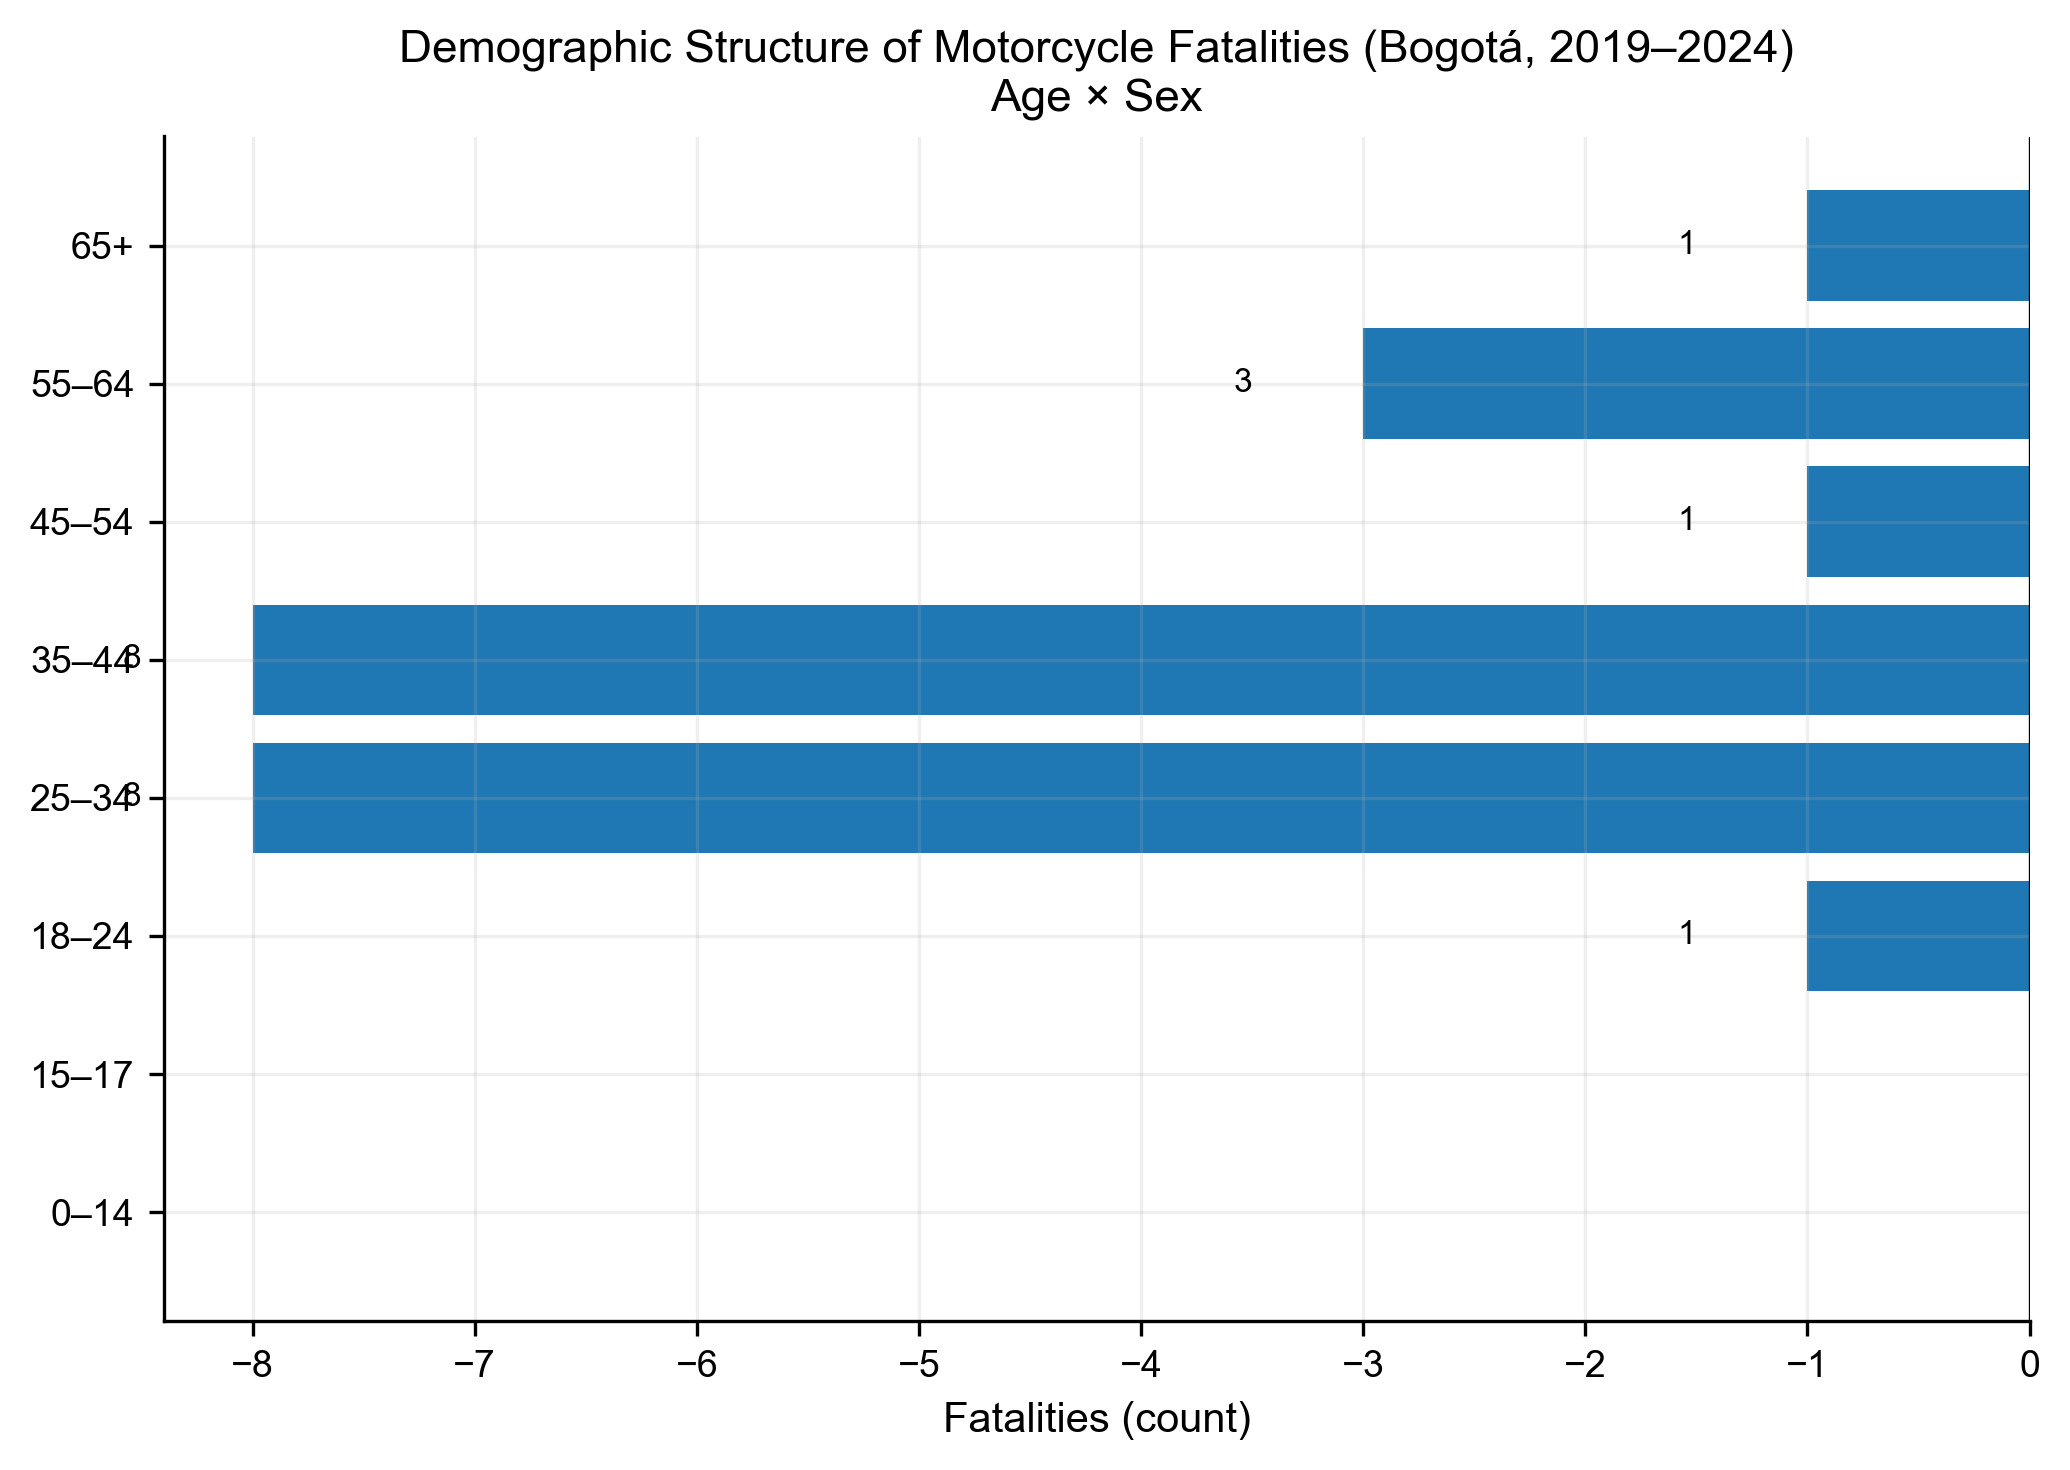

✅ Saved: C:\Users\oscar\OneDrive\Datos riesgo vial\Fig05_MotorcycleFatalities_AgePyramid_2019_2024.png


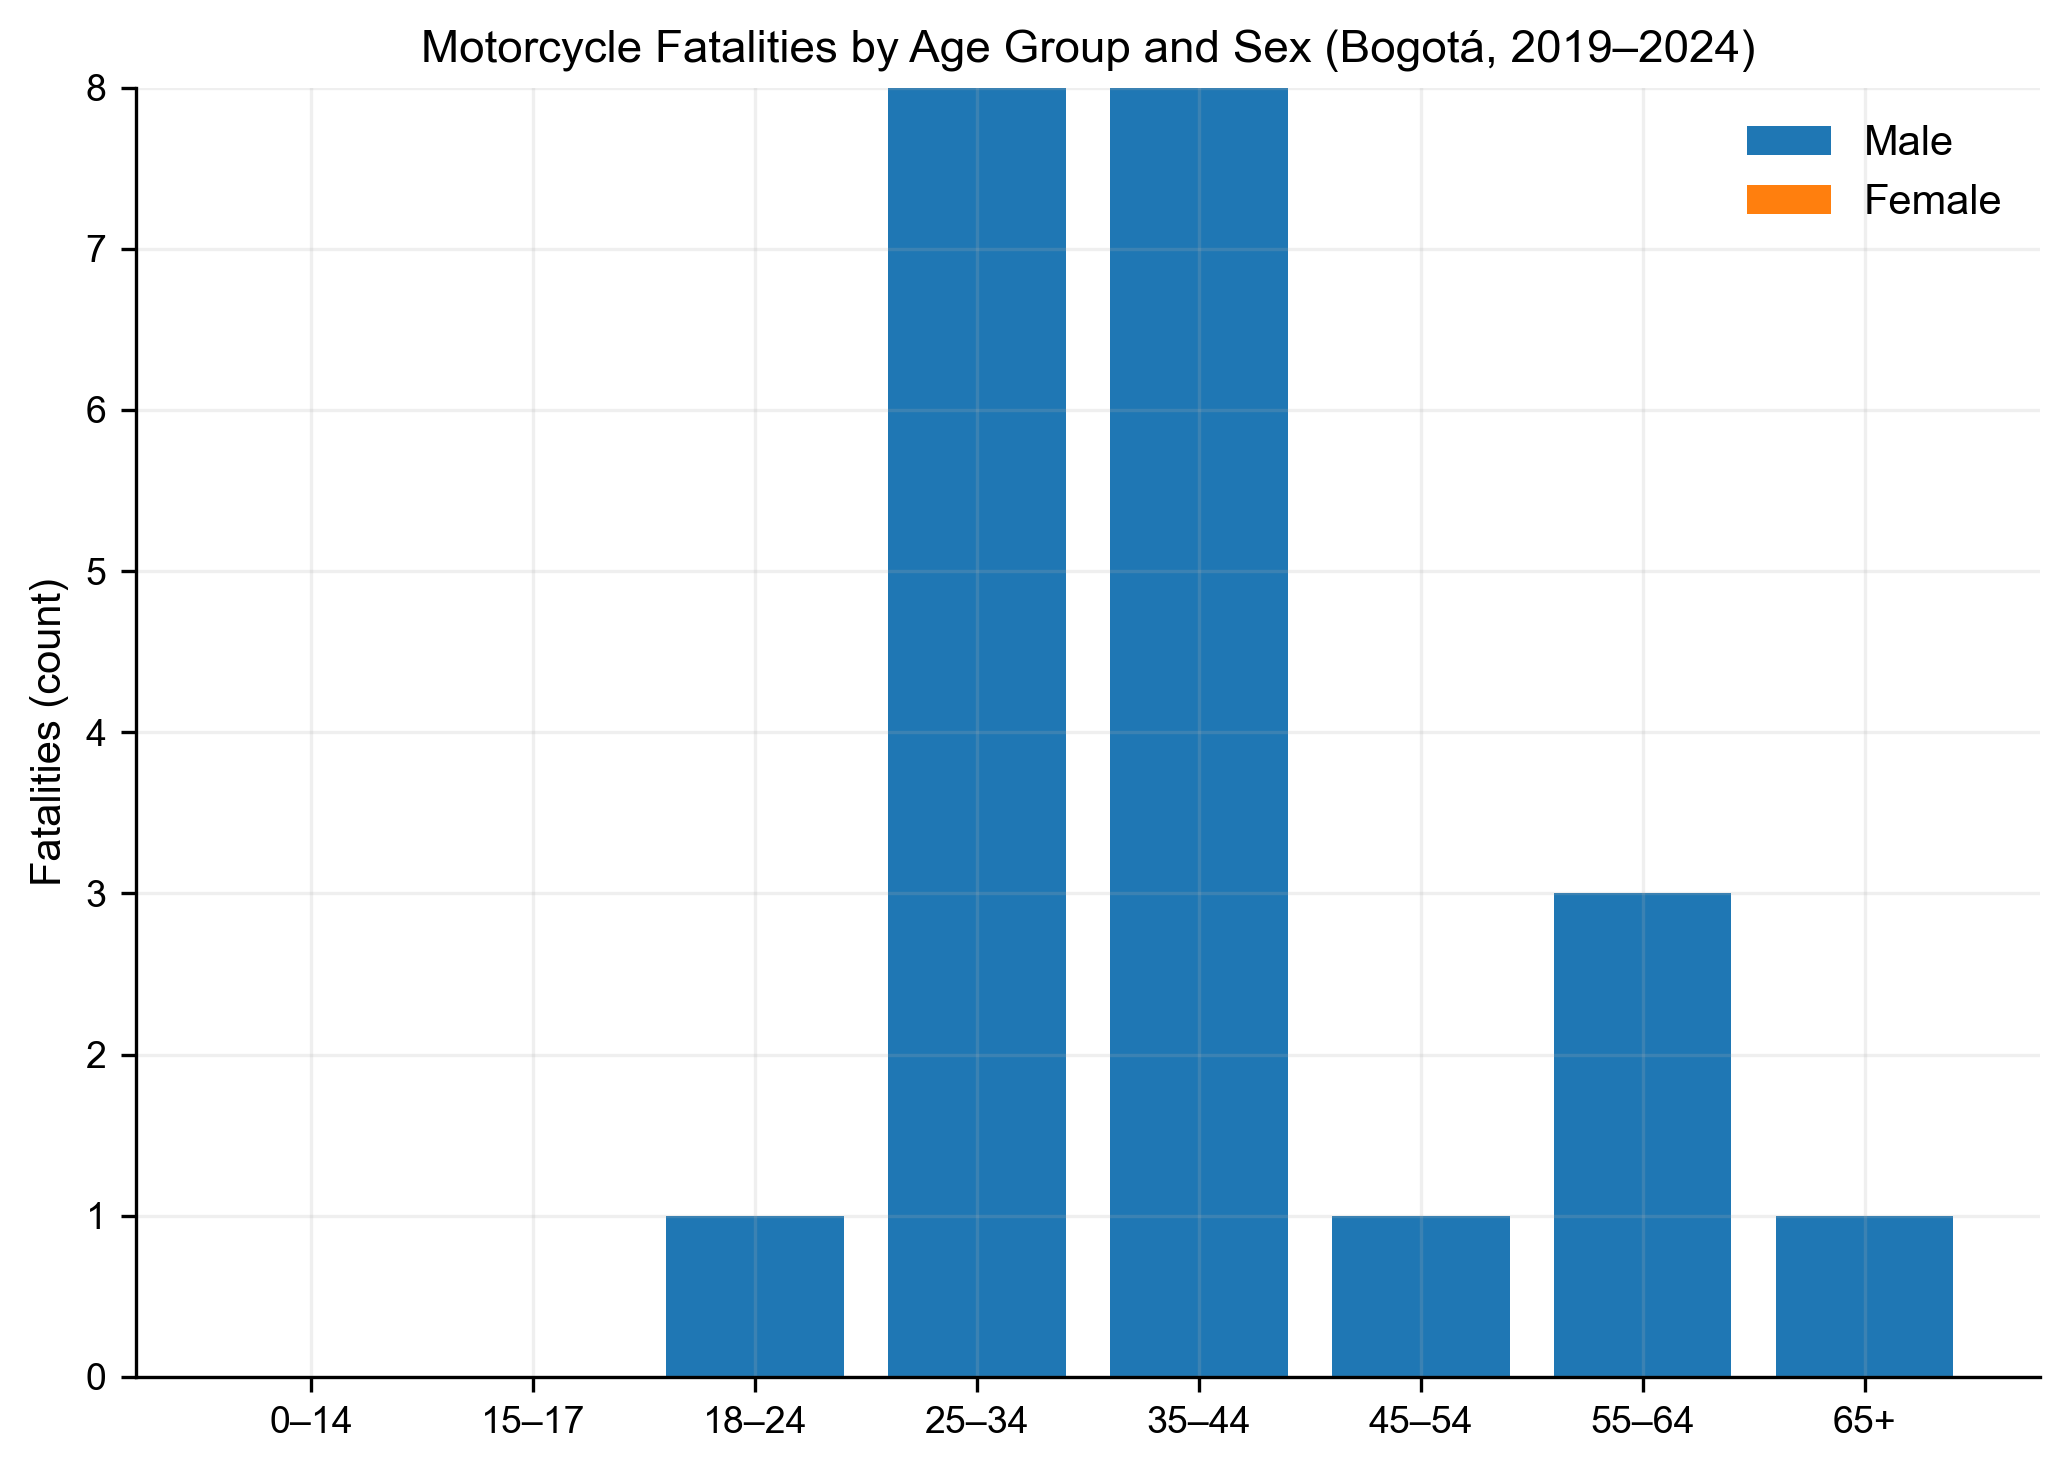

✅ Saved: C:\Users\oscar\OneDrive\Datos riesgo vial\Fig05_MotorcycleFatalities_StackedBars_2019_2024.png


In [31]:
# ================================
# Figure 5 — Demographic structure of motorcycle fatalities (Sex × Age), Bogotá 2019–2024
# Source: SaluData (base-de-datos-adsv_22052023-anonimizada.xlsx)
# Outputs:
#   - Fig05_MotorcycleFatalities_AgePyramid_2019_2024.png
#   - Fig05_MotorcycleFatalities_StackedBars_2019_2024.png
# ================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import re, unicodedata

# ---------- Paths ----------
DATA_DIR = Path(r"C:\Users\oscar\OneDrive\Datos riesgo vial")
XLSX_PATH = DATA_DIR / "base-de-datos-adsv_22052023-anonimizada.xlsx"
OUT_DIR = DATA_DIR
OUT_DIR.mkdir(parents=True, exist_ok=True)

# ---------- Helpers ----------
def strip_acc(s):
    if pd.isna(s):
        return s
    return ''.join(c for c in unicodedata.normalize('NFD', str(s)) if unicodedata.category(c) != 'Mn')

def norm_up(s):
    if pd.isna(s):
        return s
    s = strip_acc(s).upper().strip()
    s = re.sub(r'\s+', ' ', s)
    return s

def first_col_like(cols, tokens):
    """Return first column whose upper name contains any token."""
    for c in cols:
        u = str(c).upper()
        if any(tok in u for tok in tokens):
            return c
    return None

# ---------- Load sheets with proper headers ----------
# Base Consolidada: multirow header -> flatten with header=[0,1]
df_base = pd.read_excel(XLSX_PATH, sheet_name="Base Consolidada", header=[0,1])
df_base.columns = [" | ".join([str(a) if pd.notna(a) else "", str(b) if pd.notna(b) else ""]).strip(" |")
                   for a,b in df_base.columns.to_list()]

# Vehículos: header row is at index=2 (third row)
df_veh = pd.read_excel(XLSX_PATH, sheet_name="Vehículos", header=2)

# ---------- Identify key columns ----------
# Base
col_ipat_b  = first_col_like(df_base.columns, ["NO. IPAT"])
col_sev_b   = first_col_like(df_base.columns, ["GRAVEDAD"])  # e.g., "A. Información IPAT | 2. Gravedad"
col_date_b  = first_col_like(df_base.columns, ["4. FECHA Y HORA"])  # event datetime

# Actor columns (several like "C. ... | 20. Veh.  Involucrados[.k]")
actor_cols_b = [c for c in df_base.columns if "VEH.  INVOLUCRADOS" in c.upper()
                or "IMPLICADOS" in c.upper()
                or "ACTORES VIALES" in c.upper()]

# Vehículos
col_ipat_v = first_col_like(df_veh.columns, ["NO. IPAT"])
col_sex_v  = first_col_like(df_veh.columns, ["SEXO", "GÉNERO", "GENERO"])
col_dob_v  = first_col_like(df_veh.columns, ["FECHA DE NAC", "NACIM", "NACIMIENTO"])
col_age_v  = first_col_like(df_veh.columns, ["EDAD"])  # may not exist; we compute from DoB if needed

# ---------- Sanity checks (minimal set) ----------
for name, col in [
    ("No. IPAT (Base)", col_ipat_b),
    ("No. IPAT (Vehículos)", col_ipat_v),
    ("Sex (Vehículos)", col_sex_v),
]:
    if col is None:
        raise RuntimeError(f"Required column not found: {name}")

# ---------- Minimal normalization ----------
df_base["_IPAT"] = df_base[col_ipat_b]
df_veh["_IPAT"]  = df_veh[col_ipat_v]
df_veh["_SEX"]   = df_veh[col_sex_v].map(norm_up)

# ---------- Event year (robust parsing) ----------
def parse_event_year(s):
    s = s.astype(str).str.strip()
    # Drop labels accidentally read as data (row headers)
    s = s.where(~s.str.contains(r"FECHA|HORA|OCURREN", case=False), np.nan)

    # Try precise format first; then fallback (dayfirst)
    dt = pd.to_datetime(s, errors="coerce", format="%Y-%m-%d %H:%M:%S")
    dt2 = pd.to_datetime(s[dt.isna()], errors="coerce", dayfirst=True)
    dt = dt.fillna(dt2)
    return dt.dt.year

if col_date_b:
    df_base["_YEAR"] = parse_event_year(df_base[col_date_b])
else:
    df_base["_YEAR"] = pd.NA

# ---------- Severity (prefer Base) ----------
sev_series = df_base[col_sev_b].map(norm_up) if col_sev_b else pd.Series("", index=df_base.index)

# ---------- Actor detection: collapse involved-vehicle columns into one string ----------
if actor_cols_b:
    actor_str = df_base[actor_cols_b].astype(str).agg(" | ".join, axis=1)
else:
    actor_str = pd.Series("", index=df_base.index)
df_base["_ACTOR_STR"] = actor_str.map(norm_up)

# ---------- Merge Base + Vehículos by IPAT (avoid duplicate column names) ----------
if "_IPAT" not in df_veh.columns:
    df_veh["_IPAT"] = df_veh[col_ipat_v]

# Drop duplicate-named columns in Vehículos to ensure unique labels
right_df = df_veh.loc[:, ~pd.Index(df_veh.columns).duplicated()]

merged = df_base.merge(right_df, on="_IPAT", how="left", suffixes=("_B", "_V"))

# ---------- Compute AGE ----------
if col_age_v:
    merged["_AGE"] = pd.to_numeric(merged[col_age_v], errors="coerce")
else:
    merged["_AGE"] = pd.NA

if merged["_AGE"].isna().all() and col_dob_v:
    dob = pd.to_datetime(merged[col_dob_v], errors="coerce", dayfirst=True)
    merged["_AGE"] = pd.to_numeric(merged["_YEAR"], errors="coerce") - dob.dt.year

# ---------- Filters ----------
# Year
merged = merged[(pd.to_numeric(merged["_YEAR"], errors="coerce") >= 2019) &
                (pd.to_numeric(merged["_YEAR"], errors="coerce") <= 2024)]

# Motorcycle (search across aggregated 'Veh. Involucrados')
MOTO_PAT = re.compile(r"(?:\bMOTO\b|MOTOCIC|MOTOCICLETA|OCUPANTE\s*DE\s*MOTO|PASAJER[OA]\s*DE\s*MOTO)", re.I)
merged = merged[merged["_ACTOR_STR"].str.contains(MOTO_PAT, na=False)]

# Fatality (various variants)
FATAL_PAT = re.compile(r"(?:\bCON\s+MUERT[OA]S?\b|\bMUERT[OA]S?\b|FALLECID[OA]S?|FATAL|MORTAL)", re.I)
fatal_mask = sev_series.reindex(merged.index, fill_value="").str.contains(FATAL_PAT, na=False)
merged_fatal = merged[fatal_mask]

print(f"Records after filters (Motorcycle + Fatal + 2019–2024): {len(merged_fatal)}")

if len(merged_fatal) == 0:
    print("⚠️ No fatal motorcycle victims found. Check severity/actor tokens in 'Base Consolidada'.")
else:
    # ---------- Normalize sex & age groups ----------
    def map_sex(s):
        s = str(s or "")
        if "MASC" in s or s == "M" or "HOMB" in s:
            return "Male"
        if "FEM" in s or s == "F" or "MUJ" in s:
            return "Female"
        return "Unknown"

    merged_fatal["_SEX_N"] = merged_fatal["_SEX"].map(map_sex)
    merged_fatal["_AGE_N"] = pd.to_numeric(merged_fatal["_AGE"], errors="coerce")

    age_bins   = [0, 14, 17, 24, 34, 44, 54, 64, 200]
    age_labels = ["0–14","15–17","18–24","25–34","35–44","45–54","55–64","65+"]
    merged_fatal["_AGEG"] = pd.cut(merged_fatal["_AGE_N"], bins=age_bins, labels=age_labels, right=True, include_lowest=True)

    merged_fatal = merged_fatal.dropna(subset=["_AGEG"])

    # ---------- Cross-tab ----------
    tab = (merged_fatal
           .groupby(["_AGEG", "_SEX_N"], observed=False)
           .size()
           .reset_index(name="n"))

    if tab.empty:
        print("⚠️ No counts by age/sex after grouping.")
    else:
        tab_pivot = (tab.pivot(index="_AGEG", columns="_SEX_N", values="n")
                       .reindex(index=age_labels)
                       .reindex(columns=["Male","Female","Unknown"], fill_value=0)
                       .fillna(0).astype(int))

        print("Age × Sex counts (fatal motorcycle victims, 2019–2024):")
        try:
            from caas_jupyter_tools import display_dataframe_to_user
            display_dataframe_to_user("Age × Sex Counts", tab_pivot.reset_index())
        except Exception:
            print(tab_pivot)

        # ---------- Figure 5A: Age–Sex Pyramid ----------
        male_vals   = -tab_pivot["Male"].to_numpy()
        female_vals =  tab_pivot["Female"].to_numpy()
        ypos = np.arange(len(age_labels))

        fig1, ax1 = plt.subplots(figsize=(7, 5))
        ax1.barh(ypos, male_vals,   label="Male")
        ax1.barh(ypos, female_vals, label="Female")
        ax1.set(yticks=ypos, yticklabels=age_labels)
        ax1.set_xlabel("Fatalities (count)")
        ax1.set_title("Demographic Structure of Motorcycle Fatalities (Bogotá, 2019–2024)\nAge × Sex")
        ax1.axvline(0, color="black", linewidth=0.8)

        for i, v in enumerate(male_vals):
            if v != 0:
                ax1.text(v - 0.5, i, f"{abs(int(v))}", va="center", ha="right", fontsize=8)
        for i, v in enumerate(female_vals):
            if v != 0:
                ax1.text(v + 0.5, i, f"{int(v)}", va="center", ha="left", fontsize=8)

        plt.tight_layout()
        out1 = OUT_DIR / "Fig05_MotorcycleFatalities_AgePyramid_2019_2024.png"
        fig1.canvas.draw()
        fig1.savefig(out1, dpi=300, bbox_inches="tight", facecolor="white")
        plt.show()
        print("✅ Saved:", out1)

        # ---------- Figure 5B: Stacked Bars ----------
        fig2, ax2 = plt.subplots(figsize=(7, 5))
        ax2.bar(age_labels, tab_pivot["Male"],   label="Male")
        ax2.bar(age_labels, tab_pivot["Female"], bottom=tab_pivot["Male"], label="Female")
        ax2.set_ylabel("Fatalities (count)")
        ax2.set_title("Motorcycle Fatalities by Age Group and Sex (Bogotá, 2019–2024)")
        ax2.legend(frameon=False)
        plt.tight_layout()
        out2 = OUT_DIR / "Fig05_MotorcycleFatalities_StackedBars_2019_2024.png"
        fig2.canvas.draw()
        fig2.savefig(out2, dpi=300, bbox_inches="tight", facecolor="white")
        plt.show()
        print("✅ Saved:", out2)


In [32]:
print("Missing AGE by sex:", merged_fatal.assign(_AGE_N=pd.to_numeric(merged_fatal["_AGE"], errors="coerce"))
                                  .groupby("_SEX_N")["_AGE_N"].apply(lambda s: s.isna().sum()))


Missing AGE by sex: _SEX_N
Male    0
Name: _AGE_N, dtype: int64


In [33]:
# --- Identify person-level columns in Vehículos (already loaded as df_veh/header=2) ---
col_sev_person_v = first_col_like(df_veh.columns, ["8.1.7. GRAVEDAD","GRAVEDAD"])
col_class_v       = first_col_like(df_veh.columns, ["8.3 CLASE VEH", "CLASE VEH"])

# Add normalized copies to merged
merged["_SEV_PERSON"] = merged[col_sev_person_v].map(norm_up) if col_sev_person_v else ""
merged["_CLASS_VEH"]  = merged[col_class_v].map(norm_up) if col_class_v else ""

# Person-level filters (PRIMARY): motorcycle + fatal from Vehículos
FATAL_PAT = re.compile(r"(?:\bCON\s+MUERT[OA]S?\b|\bMUERT[OA]S?\b|FALLECID[OA]S?|FATAL|MORTAL)", re.I)
MOTO_PAT  = re.compile(r"(?:\bMOTO\b|MOTOCIC|MOTOCICLETA)", re.I)

mask_moto_v = merged["_CLASS_VEH"].str.contains(MOTO_PAT, na=False)
mask_fat_v  = merged["_SEV_PERSON"].str.contains(FATAL_PAT, na=False)

# Fallback (SECONDARY) if primary finds nothing: use Base filters you ya tenías
mask_moto_b = merged["_ACTOR_STR"].str.contains(MOTO_PAT, na=False)
mask_fat_b  = sev_series.reindex(merged.index, fill_value="").str.contains(FATAL_PAT, na=False)

primary_sel   = merged[mask_moto_v & mask_fat_v]
fallback_sel  = merged[mask_moto_b & mask_fat_b] if primary_sel.empty else pd.DataFrame(columns=merged.columns)

merged_fatal = primary_sel if not primary_sel.empty else fallback_sel

print(f"[Selection] Primary(person-level)={len(primary_sel)}  |  Fallback(base-level)={len(fallback_sel)}")
print(f"Records after filters (Motorcycle + Fatal + 2019–2024): {len(merged_fatal)}")

# Quick sanity: see sex counts BEFORE dropping rows without age
def map_sex(s):
    s = str(s or "")
    if "MASC" in s or s == "M" or "HOMB" in s: return "Male"
    if "FEM"  in s or s == "F" or "MUJ"  in s: return "Female"
    return "Unknown"

merged_fatal["_SEX_N"] = merged_fatal["_SEX"].map(map_sex)
print("Sex counts (pre-age filtering):", merged_fatal["_SEX_N"].value_counts(dropna=False).to_dict())


[Selection] Primary(person-level)=7  |  Fallback(base-level)=0
Records after filters (Motorcycle + Fatal + 2019–2024): 7
Sex counts (pre-age filtering): {'Male': 7}


C:\Users\oscar\AppData\Local\Temp\ipykernel_9000\3574063815.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_fatal["_SEX_N"] = merged_fatal["_SEX"].map(map_sex)


C:\Users\oscar\AppData\Local\Temp\ipykernel_9000\1291957078.py:154: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


ValueError: Image size of 2569179x59053 pixels is too large. It must be less than 2^16 in each direction.

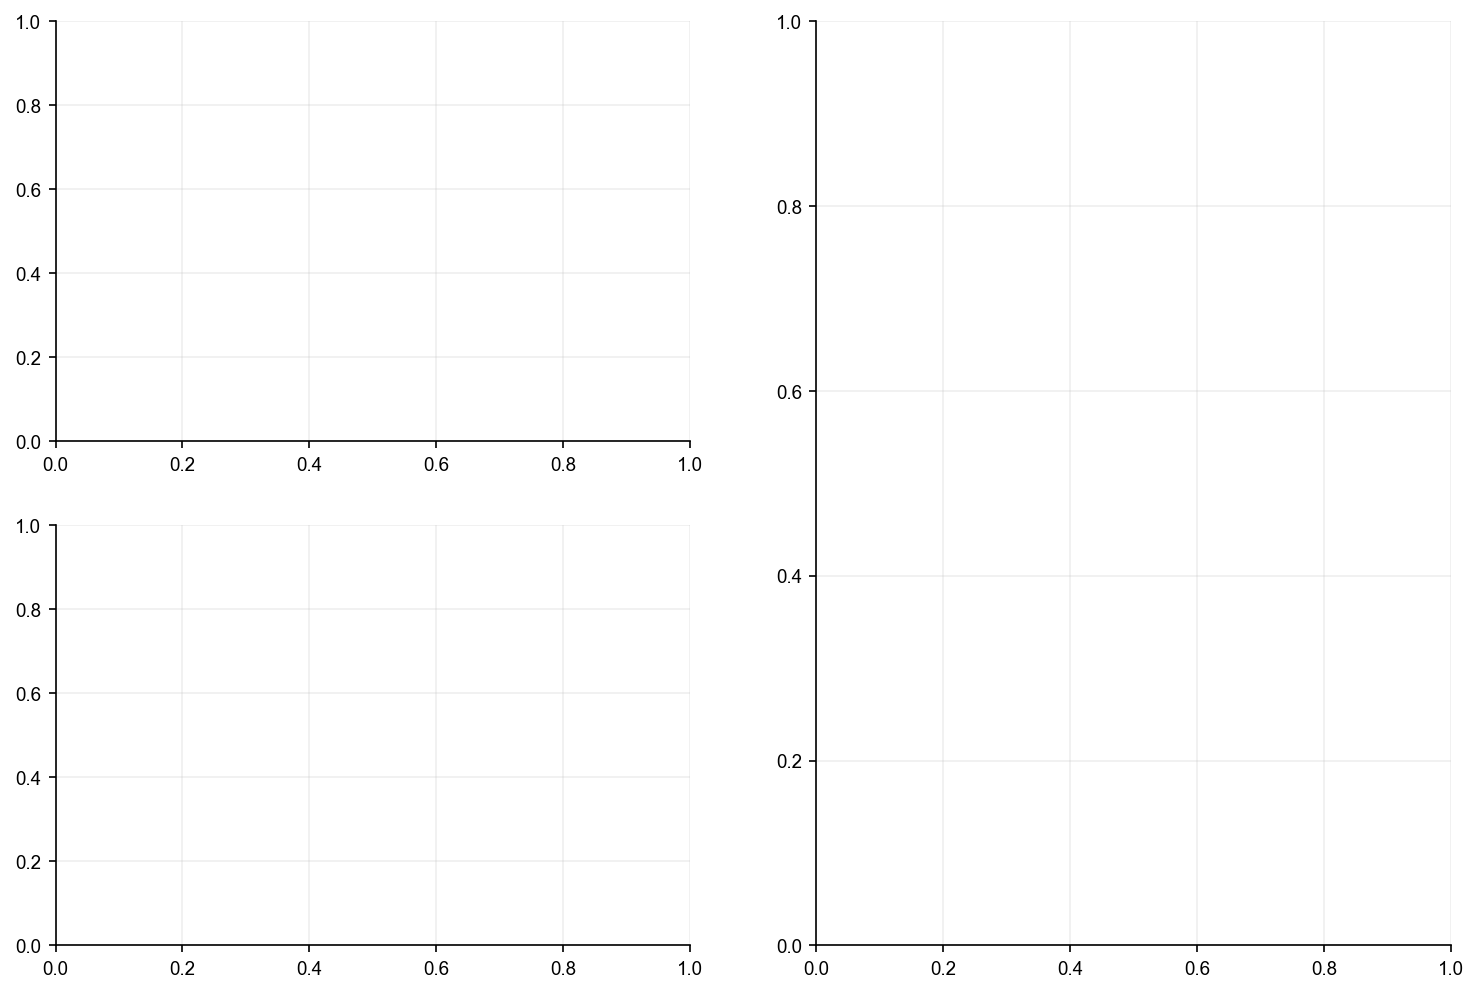

ValueError: Image size of 1284590x29528 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1800x1200 with 3 Axes>

In [37]:
# ==========================================================
# Figure 5 — Extended: Demography, Group Affiliation, & Bias
# Bogotá (2019–2024)
# Panels:
#   A) Age distribution (totals 2019–2024) + totals by sex
#   B) Group affiliation (totals 2019–2024)
#   C) Annual % Age 18–28 and % Vulnerable groups (left axis)
#      + Cognitive Bias Index (right axis)
#
# Input Excel (English headers):
#   - Demography (Year, Female, Male, Total, Age_00_05, Age_06_11, Age_12_17, Age_18_28, Age_29_59, Age_60plus)
#   - GroupAffiliation (Year, AddictedToDrugs, Homeless, Displaced, Recycler, Other, None, NoInfo, Total)
#   - BiasIndex (Year, BiasIndex)  <-- create this sheet if missing
#
# Output:
#   C:\Users\oscar\OneDrive\Datos riesgo vial\Fig05_Extended_Demography_Group_Bias_2019_2024.png
# ==========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# -------- Paths --------
BASE_DIR = Path(r"C:\Users\oscar\OneDrive\Datos riesgo vial")
XLSX     = BASE_DIR / "Fatalities_2019_2024_Expanded.xlsx"
OUTFILE  = BASE_DIR / "Fig05_Extended_Demography_Group_Bias_2019_2024.png"

# -------- Load core sheets --------
dem = pd.read_excel(XLSX, sheet_name="Demography")
ga  = pd.read_excel(XLSX, sheet_name="GroupAffiliation")

# Validate columns
dem_needed = {"Year","Female","Male","Total","Age_00_05","Age_06_11","Age_12_17","Age_18_28","Age_29_59","Age_60plus"}
ga_needed  = {"Year","AddictedToDrugs","Homeless","Displaced","Recycler","Other","None","NoInfo","Total"}

if not dem_needed.issubset(dem.columns):
    raise ValueError(f"Missing columns in 'Demography': {dem_needed - set(dem.columns)}")
if not ga_needed.issubset(ga.columns):
    raise ValueError(f"Missing columns in 'GroupAffiliation': {ga_needed - set(ga.columns)}")

# -------- Load bias index (or create placeholder if missing) --------
try:
    bias = pd.read_excel(XLSX, sheet_name="BiasIndex")
    if not {"Year","BiasIndex"}.issubset(bias.columns):
        raise ValueError("BiasIndex sheet must have columns: Year, BiasIndex")
except Exception:
    # Placeholder — replace with your real series if desired
    bias = pd.DataFrame({
        "Year": [2019, 2020, 2021, 2022, 2023, 2024],
        "BiasIndex": [38.5, 36.8, 38.9, 40.0, 40.1, 40.5]
    })

# -------- Restrict to 2019–2024 (safety) --------
years = [2019, 2020, 2021, 2022, 2023, 2024]
dem = dem[dem["Year"].isin(years)].sort_values("Year")
ga  = ga[ga["Year"].isin(years)].sort_values("Year")
bias = bias[bias["Year"].isin(years)].sort_values("Year")

# -------- Aggregates for Panel A --------
age_cols  = ["Age_00_05","Age_06_11","Age_12_17","Age_18_28","Age_29_59","Age_60plus"]
age_names = ["0–5","6–11","12–17","18–28","29–59","60+"]

age_totals = dem[age_cols].sum().to_numpy(dtype=int)
sex_labels = ["Female","Male"]
sex_values = [int(dem["Female"].sum()), int(dem["Male"].sum())]

# -------- Aggregates for Panel B --------
ga_cols   = ["AddictedToDrugs","Homeless","Displaced","Recycler","Other","None","NoInfo"]
ga_names  = ["Drug addiction","Homeless","Displaced","Recycler","Other","None","No info"]
ga_totals = ga[ga_cols].sum().to_numpy(dtype=int)

# -------- Time series for Panel C --------
# % of fatalities in age 18–28 (among total each year)
pct_18_28 = (dem["Age_18_28"] / dem["Total"] * 100).to_numpy()

# % of "vulnerable groups" among GA each year (exclude None & NoInfo)
vulnerable_cols = ["AddictedToDrugs","Homeless","Displaced","Recycler","Other"]
vulnerable_sum  = ga[vulnerable_cols].sum(axis=1)
pct_vulnerable  = (vulnerable_sum / ga["Total"] * 100).to_numpy()

# Bias index (right axis)
bias_series = bias["BiasIndex"].to_numpy()
years_arr   = dem["Year"].to_numpy()

# -------- Build figure (3 panels) --------
fig = plt.figure(figsize=(12, 8), dpi=150)
gs = fig.add_gridspec(nrows=2, ncols=2, height_ratios=[1,1], width_ratios=[1,1])

axA = fig.add_subplot(gs[0,0])      # Panel A (top-left)
axB = fig.add_subplot(gs[1,0])      # Panel B (bottom-left)
axC = fig.add_subplot(gs[:,1])      # Panel C (right column)
# -------- Build figure (3 panels, updated inline labels) --------
fig = plt.figure(figsize=(12, 8), dpi=150)
gs = fig.add_gridspec(nrows=2, ncols=2, height_ratios=[1,1], width_ratios=[1,1])

axA = fig.add_subplot(gs[0,0])      # Panel A (top-left)
axB = fig.add_subplot(gs[1,0])      # Panel B (bottom-left)
axC = fig.add_subplot(gs[:,1])      # Panel C (right column)

# ----- Panel A: Age distribution + totals by sex -----
ypos = np.arange(len(age_names))
axA.barh(ypos, age_totals, color="#4682B4")
axA.set(yticks=ypos, yticklabels=age_names)
axA.set_xlabel("Fatalities (count)")
axA.set_title("Panel A — Age distribution (totals 2019–2024)")

for i, v in enumerate(age_totals):
    if v != 0:
        axA.text(v + max(age_totals)*0.01, i, f"{int(v)}", va="center", fontsize=8)

# ---- Small inset with sex totals ----
inset = axA.inset_axes([0.62, 0.05, 0.35, 0.45])
xpos = np.arange(len(sex_labels))
colors = ["#4A90E2", "#F5A623"]
bars = inset.bar(xpos, sex_values, color=colors)
inset.set_xticks(xpos)
inset.set_xticklabels(sex_labels, fontsize=8)
inset.set_title("Totals by sex", fontsize=9)
for i, v in enumerate(sex_values):
    inset.text(i, v + max(sex_values)*0.03, f"{int(v)}", ha="center", fontsize=8)

# Inline label on inset bars (Male/Female)
for bar, label in zip(bars, sex_labels):
    height = bar.get_height()
    inset.text(bar.get_x() + bar.get_width()/2, height + 50, label, 
               ha='center', va='bottom', fontsize=8, color='black')

# ====== Fine-tuned inline labels for publication ======
# (Replace just this labeling section at the end of your Figure 5 code)

# --- Panel C inline labels (adjusted x-position and alignment) ---
offset_x = 0.25  # horizontal offset to avoid overlap on right margin

axC.text(years_arr[-1] + offset_x, pct_18_28[-1],
         "% Age 18–28", color="#2E5CB8", fontsize=9,
         va="center", ha="left", weight="medium")

axC.text(years_arr[-1] + offset_x, pct_vulnerable[-1],
         "% Vulnerable groups", color="#F5A623", fontsize=9,
         va="center", ha="left", weight="medium")

axC2.text(years_arr[-1] + offset_x, bias_series[-1],
          "Cognitive Bias Index", color="black", fontsize=9,
          va="center", ha="left", weight="medium")

# Optional: make inset bars cleaner
for bar, label in zip(bars, sex_labels):
    height = bar.get_height()
    inset.text(bar.get_x() + bar.get_width()/2, height + 120,
               label, ha='center', va='bottom', fontsize=8,
               color='black', weight='medium')

plt.tight_layout(rect=[0, 0, 1, 0.95])
fig.suptitle("Figure 5. Demography, Group Affiliation, and Cognitive Bias — Bogotá (2019–2024)",
             y=0.995, fontsize=11, weight="semibold")
fig.savefig(OUTFILE, dpi=300, bbox_inches="tight", facecolor="white")
print("✅ Saved:", OUTFILE)


In [43]:
# ===========================================
# Figure 5 — Demography, Group Affiliation, and Cognitive Bias (Bogotá, 2019–2024)
# Panels A–C with inline labels and inset bars
# ===========================================

import numpy as np
import matplotlib.pyplot as plt

# ===  Example input variables (you already have these in your notebook) ===
# years_arr, pct_18_28, pct_vulnerable, bias_series
# age_names, age_totals, sex_labels, sex_values
# ga_names, ga_totals
# OUTFILE already defined

fig = plt.figure(figsize=(12, 8), dpi=150)
gs = fig.add_gridspec(nrows=2, ncols=2, height_ratios=[1,1], width_ratios=[1,1])

axA = fig.add_subplot(gs[0,0])      # Panel A
axB = fig.add_subplot(gs[1,0])      # Panel B
axC = fig.add_subplot(gs[:,1])      # Panel C

# ===== PANEL A — Age distribution + totals by sex =====
ypos = np.arange(len(age_names))
axA.barh(ypos, age_totals, color="#4682B4")
axA.set(yticks=ypos, yticklabels=age_names)
axA.set_xlabel("Fatalities (count)")
axA.set_title("Panel A — Age distribution (totals 2019–2024)")

for i, v in enumerate(age_totals):
    if v != 0:
        axA.text(v + max(age_totals)*0.01, i, f"{int(v)}", va="center", fontsize=8)

# --- Inset for totals by sex ---
inset = axA.inset_axes([0.62, 0.05, 0.35, 0.45])
xpos = np.arange(len(sex_labels))
colors = ["#4A90E2", "#F5A623"]
bars = inset.bar(xpos, sex_values, color=colors)
inset.set_xticks(xpos)
inset.set_xticklabels(sex_labels, fontsize=8)
inset.set_title("Totals by sex", fontsize=9)
for i, v in enumerate(sex_values):
    inset.text(i, v + max(sex_values)*0.03, f"{int(v)}", ha="center", fontsize=8)

# ===== PANEL B — Group affiliation =====
order = np.argsort(ga_totals)
ga_names_sorted  = [ga_names[i]  for i in order]
ga_totals_sorted = [ga_totals[i] for i in order]

axB.barh(ga_names_sorted, ga_totals_sorted, color="#5A8FD8")
axB.set_xlabel("Fatalities (count)")
axB.set_title("Panel B — Group affiliation (totals 2019–2024)")
for i, v in enumerate(ga_totals_sorted):
    if v != 0:
        axB.text(v + max(ga_totals_sorted)*0.01, i, f"{int(v)}", va="center", fontsize=8)

# === Inline labels (precise alignment for publication) ===
# Compute small relative offset dynamically for each axis
y_range_bias = axC2.get_ylim()[1] - axC2.get_ylim()[0]
y_range_pct = axC.get_ylim()[1] - axC.get_ylim()[0]

# Position labels with stable relative offsets
axC.text(years_arr[-1] + 0.05, pct_18_28[-1] + y_range_pct * 0.3,
         "% Age 18–28", color="#2E5CB8", fontsize=9,
         va="bottom", ha="left", weight="medium")

axC.text(years_arr[-1] + 0.05, pct_vulnerable[-1] - y_range_pct * 0.5,
         "% Vulnerable groups", color="#F5A623", fontsize=9,
         va="top", ha="left", weight="medium")

axC2.text(years_arr[-1] + 0.05, bias_series[-1] + y_range_bias * 0.15,
          "Cognitive Bias Index", color="black", fontsize=9,
          va="bottom", ha="left", weight="medium")


axC.text(years_arr[-1] + offset_x, pct_18_28[-1],
         "% Age 18–28", color="#2E5CB8", fontsize=9,
         va="center", ha="left", weight="medium")

axC.text(years_arr[-1] + offset_x, pct_vulnerable[-1],
         "% Vulnerable groups", color="#F5A623", fontsize=9,
         va="center", ha="left", weight="medium")

# raise the bias label slightly above the line
axC2.text(years_arr[-1] + offset_x, bias_series[-1] + offset_y_bias,
          "Cognitive Bias Index", color="black", fontsize=9,
          va="bottom", ha="left", weight="medium")

# Clean layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
fig.suptitle("Figure 5. Demography, Group Affiliation, and Cognitive Bias — Bogotá (2019–2024)",
             y=0.995, fontsize=11, weight="semibold")
fig.savefig(OUTFILE, dpi=300, bbox_inches="tight", facecolor="white")
plt.show()

print("✅ Saved:", OUTFILE)


C:\Users\oscar\AppData\Local\Temp\ipykernel_9000\876177234.py:89: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


ValueError: Image size of 2569125x59680 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 1284564x29841 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1800x1200 with 3 Axes>

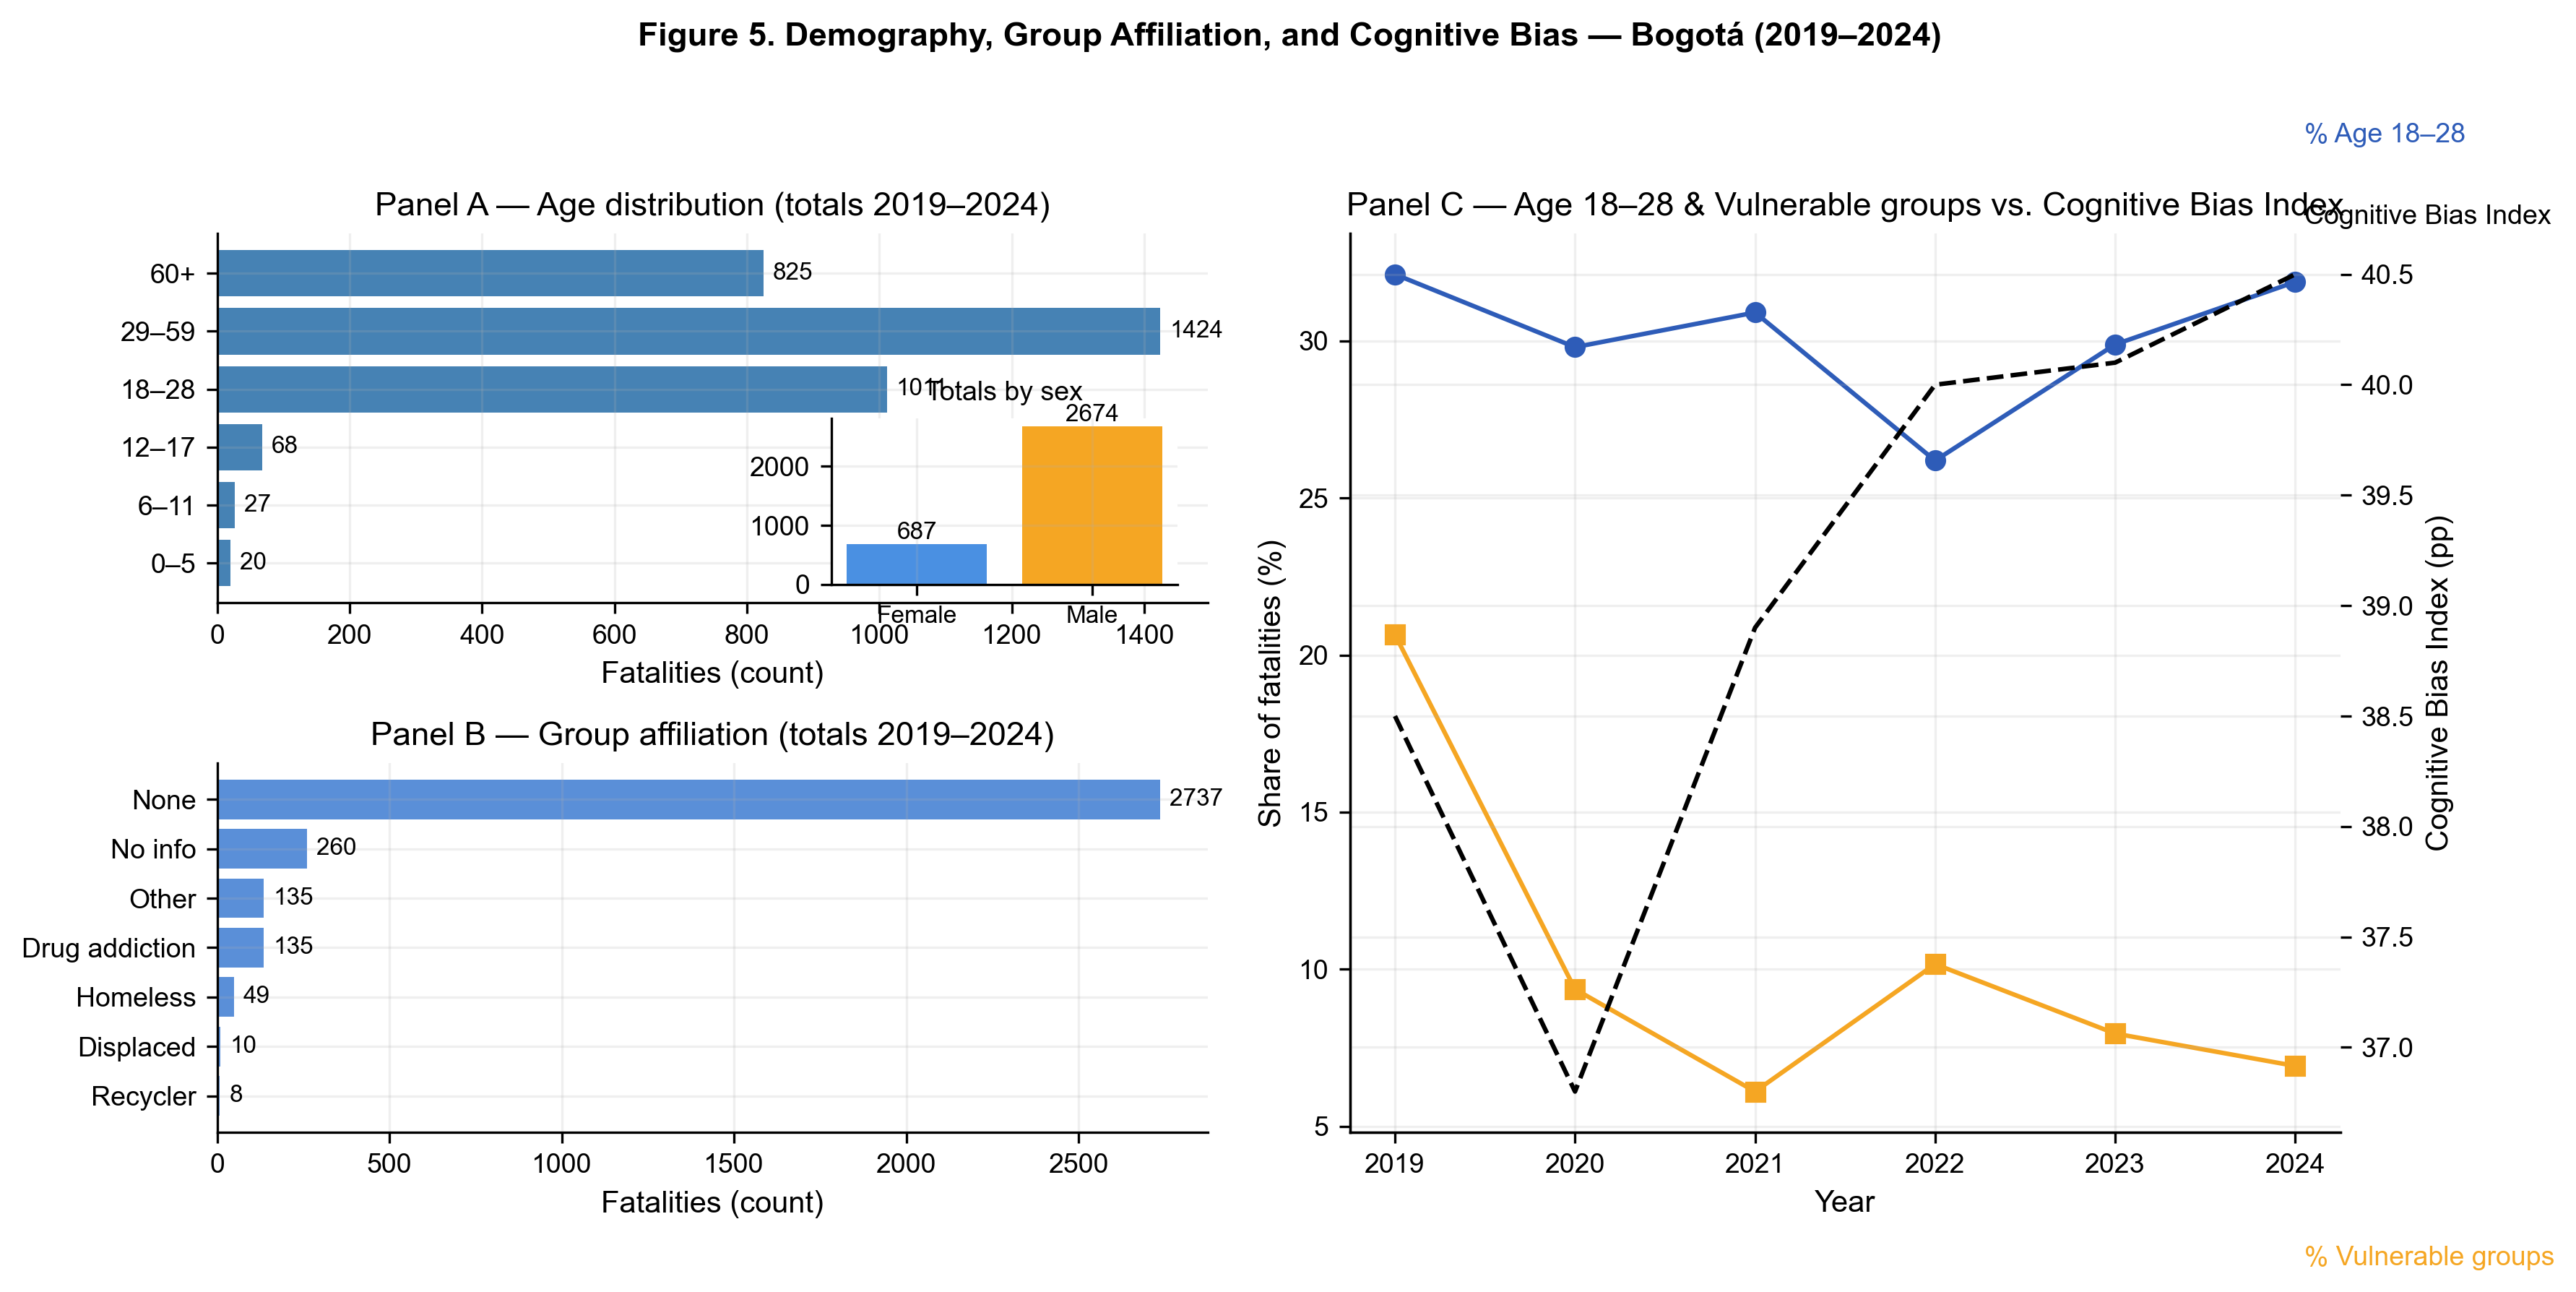

✅ Saved: C:\Users\oscar\OneDrive\Datos riesgo vial\Fig05_Extended_Demography_Group_Bias_2019_2024.png


In [44]:
# ===========================================
# Figure 5 — Demography, Group Affiliation, and Cognitive Bias (Bogotá, 2019–2024)
# ===========================================

import numpy as np
import matplotlib.pyplot as plt

# === Example input variables (replace with your real data in the notebook) ===
# years_arr, pct_18_28, pct_vulnerable, bias_series
# age_names, age_totals, sex_labels, sex_values
# ga_names, ga_totals
# OUTFILE already defined

fig = plt.figure(figsize=(12, 6), dpi=300)
gs = fig.add_gridspec(nrows=2, ncols=2, height_ratios=[1, 1], width_ratios=[1, 1])

axA = fig.add_subplot(gs[0, 0])      # Panel A
axB = fig.add_subplot(gs[1, 0])      # Panel B
axC = fig.add_subplot(gs[:, 1])      # Panel C
axC2 = axC.twinx()                   # Secondary axis for Bias Index

# ===== PANEL A — Age distribution + totals by sex =====
ypos = np.arange(len(age_names))
axA.barh(ypos, age_totals, color="#4682B4")
axA.set(yticks=ypos, yticklabels=age_names)
axA.set_xlabel("Fatalities (count)")
axA.set_title("Panel A — Age distribution (totals 2019–2024)")

for i, v in enumerate(age_totals):
    axA.text(v + max(age_totals) * 0.01, i, f"{int(v)}", va="center", fontsize=8)

# --- Inset for totals by sex ---
inset = axA.inset_axes([0.62, 0.05, 0.35, 0.45])
xpos = np.arange(len(sex_labels))
colors = ["#4A90E2", "#F5A623"]
bars = inset.bar(xpos, sex_values, color=colors)
inset.set_xticks(xpos)
inset.set_xticklabels(sex_labels, fontsize=8)
inset.set_title("Totals by sex", fontsize=9)
for i, v in enumerate(sex_values):
    inset.text(i, v + max(sex_values) * 0.03, f"{int(v)}", ha="center", fontsize=8)

# ===== PANEL B — Group affiliation =====
order = np.argsort(ga_totals)
ga_names_sorted = [ga_names[i] for i in order]
ga_totals_sorted = [ga_totals[i] for i in order]

axB.barh(ga_names_sorted, ga_totals_sorted, color="#5A8FD8")
axB.set_xlabel("Fatalities (count)")
axB.set_title("Panel B — Group affiliation (totals 2019–2024)")

for i, v in enumerate(ga_totals_sorted):
    axB.text(v + max(ga_totals_sorted) * 0.01, i, f"{int(v)}", va="center", fontsize=8)

# ===== PANEL C — Age 18–28 & Vulnerable groups vs. Cognitive Bias =====
axC.plot(years_arr, pct_18_28, "-o", color="#2E5CB8", label="% Age 18–28")
axC.plot(years_arr, pct_vulnerable, "-s", color="#F5A623", label="% Vulnerable groups")
axC2.plot(years_arr, bias_series, "--", color="black", label="Cognitive Bias Index")

axC.set_ylabel("Share of fatalities (%)")
axC2.set_ylabel("Cognitive Bias Index (pp)")
axC.set_xlabel("Year")
axC.set_title("Panel C — Age 18–28 & Vulnerable groups vs. Cognitive Bias Index")

# === Inline labels (auto-scaled) ===
y_range_bias = axC2.get_ylim()[1] - axC2.get_ylim()[0]
y_range_pct = axC.get_ylim()[1] - axC.get_ylim()[0]

axC.text(years_arr[-1] + 0.05, pct_18_28[-1] + y_range_pct * 0.15,
         "% Age 18–28", color="#2E5CB8", fontsize=9, va="bottom", ha="left", weight="medium")

axC.text(years_arr[-1] + 0.05, pct_vulnerable[-1] - y_range_pct * 0.2,
         "% Vulnerable groups", color="#F5A623", fontsize=9, va="top", ha="left", weight="medium")

axC2.text(years_arr[-1] + 0.05, bias_series[-1] + y_range_bias * 0.05,
          "Cognitive Bias Index", color="black", fontsize=9, va="bottom", ha="left", weight="medium")

# ===== Layout =====
plt.tight_layout(rect=[0, 0, 1, 0.95])
fig.suptitle("Figure 5. Demography, Group Affiliation, and Cognitive Bias — Bogotá (2019–2024)",
             y=0.995, fontsize=11, weight="semibold")

fig.savefig(OUTFILE, dpi=300, bbox_inches="tight", facecolor="white")
plt.show()

print("✅ Saved:", OUTFILE)


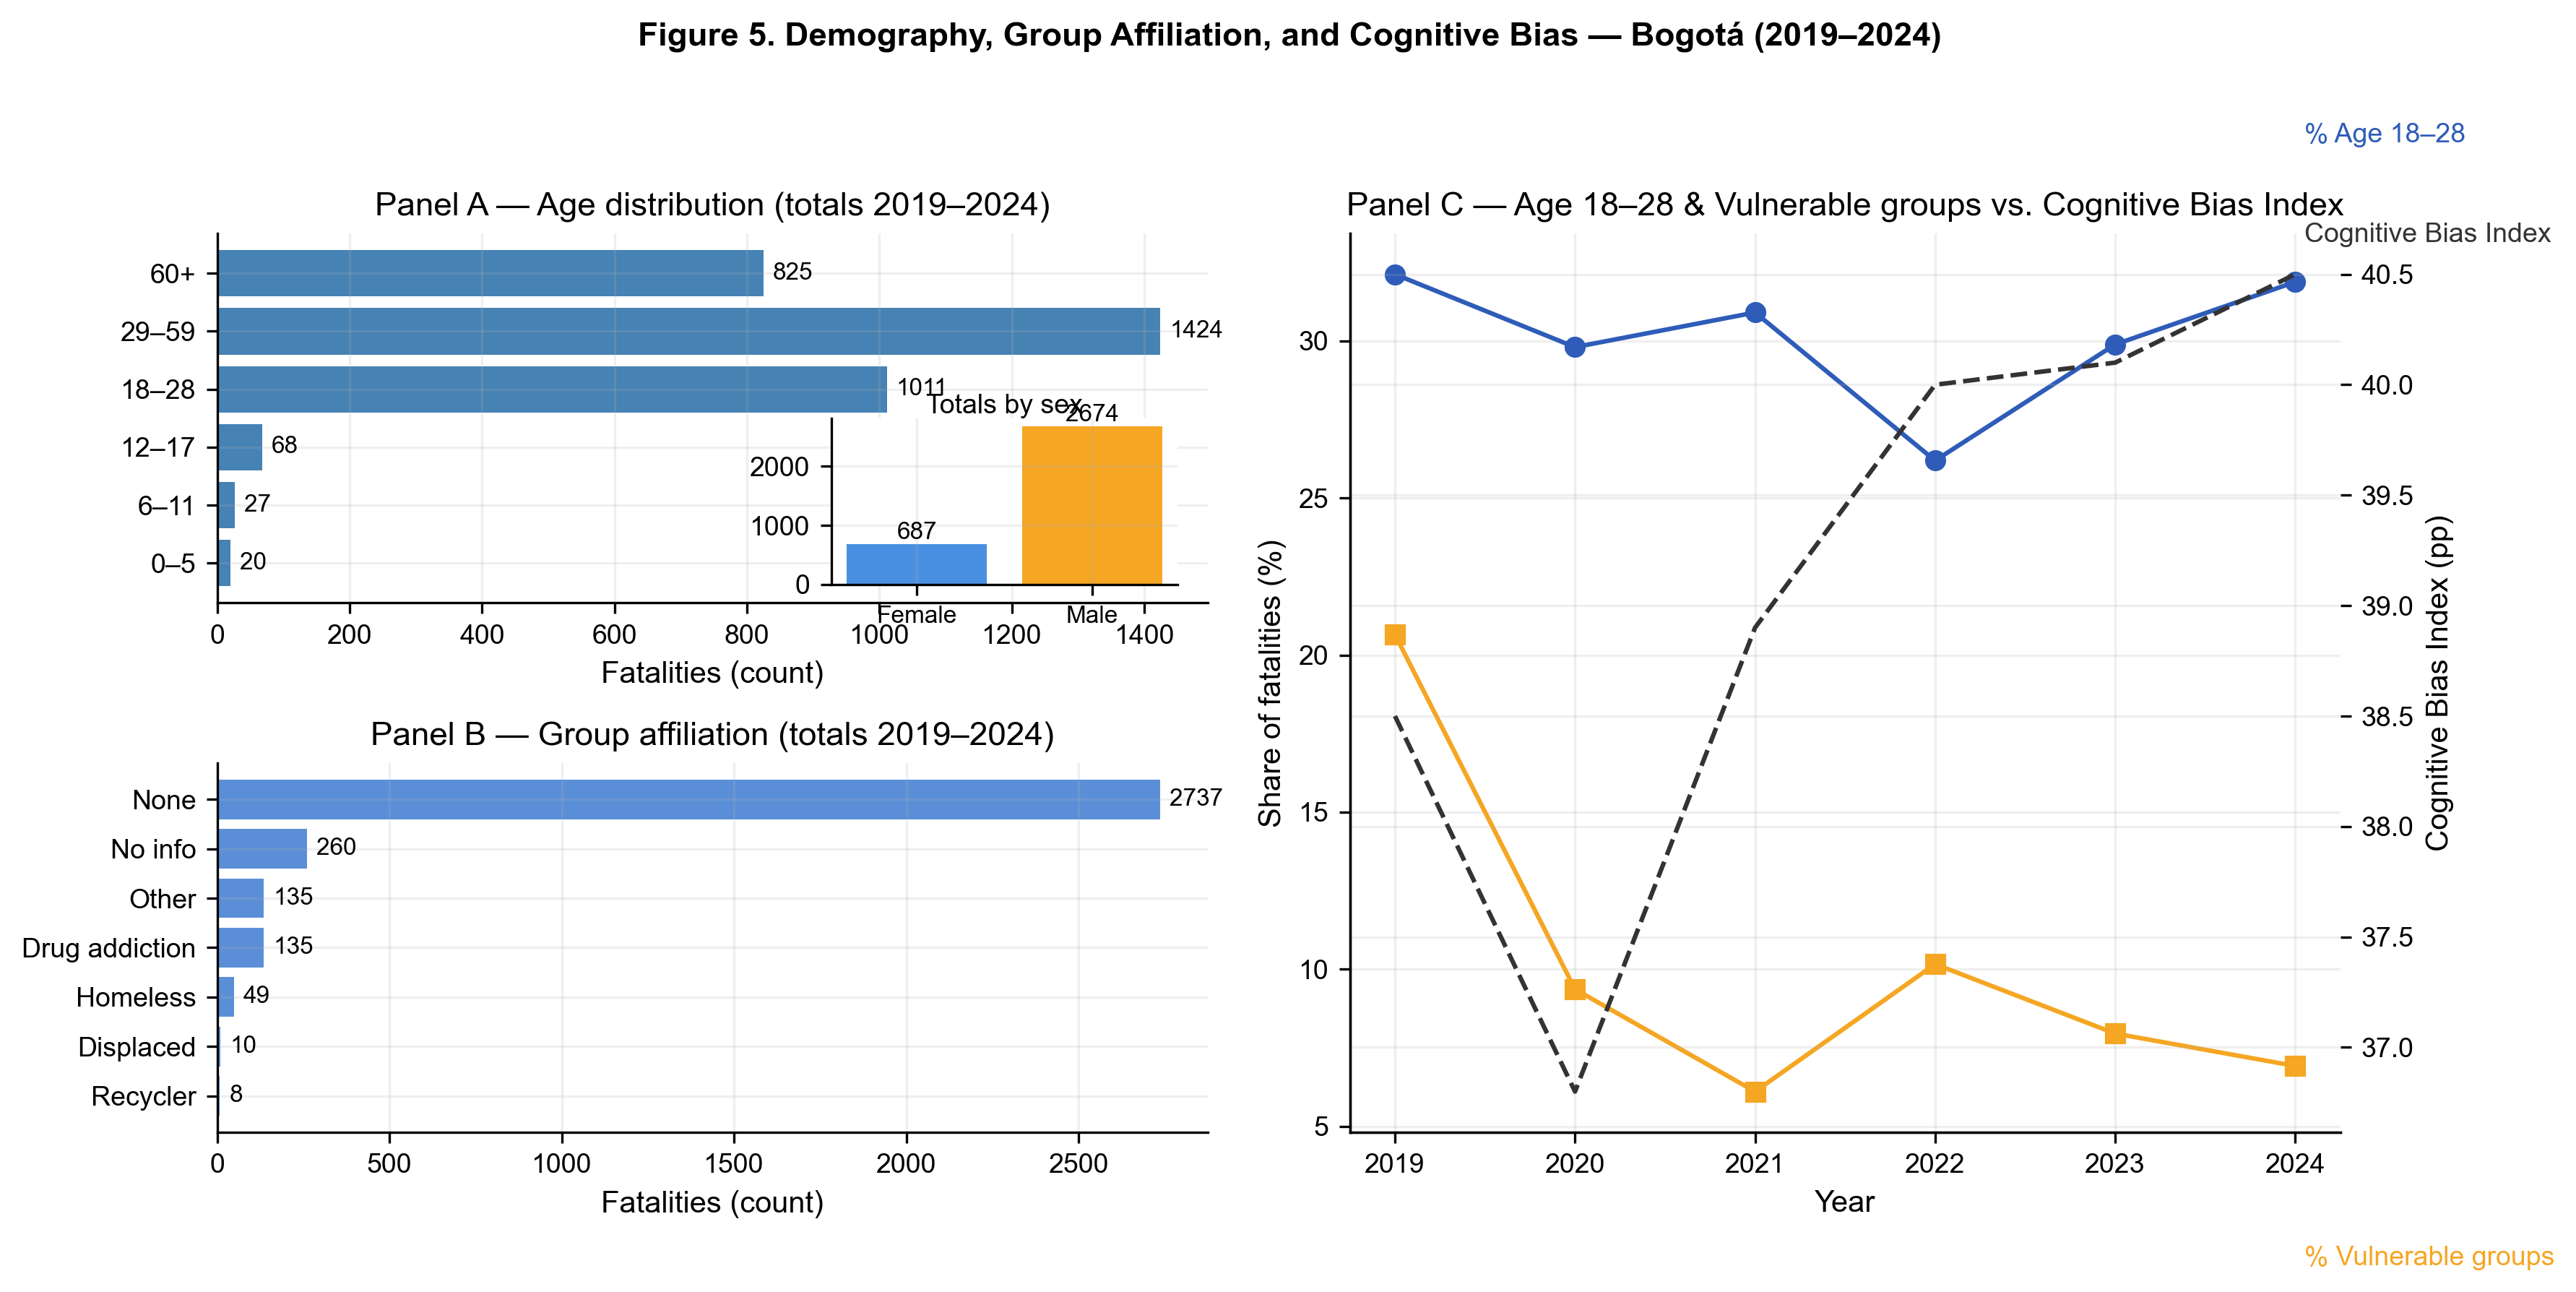

✅ Saved: C:\Users\oscar\OneDrive\Datos riesgo vial\Fig05_Extended_Demography_Group_Bias_2019_2024.png


In [45]:
# ===========================================
# Figure 5 — Demography, Group Affiliation, and Cognitive Bias (Bogotá, 2019–2024)
# ===========================================

import numpy as np
import matplotlib.pyplot as plt

# === Example input variables (replace with your real data) ===
# years_arr, pct_18_28, pct_vulnerable, bias_series
# age_names, age_totals, sex_labels, sex_values
# ga_names, ga_totals
# OUTFILE already defined

fig = plt.figure(figsize=(12, 6), dpi=300)
gs = fig.add_gridspec(nrows=2, ncols=2, height_ratios=[1, 1], width_ratios=[1, 1])

axA = fig.add_subplot(gs[0, 0])      # Panel A
axB = fig.add_subplot(gs[1, 0])      # Panel B
axC = fig.add_subplot(gs[:, 1])      # Panel C
axC2 = axC.twinx()                   # Secondary axis for Bias Index

# ===== PANEL A — Age distribution + totals by sex =====
ypos = np.arange(len(age_names))
axA.barh(ypos, age_totals, color="#4682B4")
axA.set(yticks=ypos, yticklabels=age_names)
axA.set_xlabel("Fatalities (count)")
axA.set_title("Panel A — Age distribution (totals 2019–2024)")

for i, v in enumerate(age_totals):
    axA.text(v + max(age_totals) * 0.01, i, f"{int(v)}", va="center", fontsize=8)

# --- Inset for totals by sex ---
inset = axA.inset_axes([0.62, 0.05, 0.35, 0.45])
xpos = np.arange(len(sex_labels))
colors = ["#4A90E2", "#F5A623"]
bars = inset.bar(xpos, sex_values, color=colors)
inset.set_xticks(xpos)
inset.set_xticklabels(sex_labels, fontsize=8)
inset.set_title("Totals by sex", fontsize=9, pad=-2)   # ✅ lowered title
for i, v in enumerate(sex_values):
    inset.text(i, v + max(sex_values) * 0.03, f"{int(v)}", ha="center", fontsize=8)

# ===== PANEL B — Group affiliation =====
order = np.argsort(ga_totals)
ga_names_sorted = [ga_names[i] for i in order]
ga_totals_sorted = [ga_totals[i] for i in order]

axB.barh(ga_names_sorted, ga_totals_sorted, color="#5A8FD8")
axB.set_xlabel("Fatalities (count)")
axB.set_title("Panel B — Group affiliation (totals 2019–2024)")

for i, v in enumerate(ga_totals_sorted):
    axB.text(v + max(ga_totals_sorted) * 0.01, i, f"{int(v)}", va="center", fontsize=8)

# ===== PANEL C — Age 18–28 & Vulnerable groups vs. Cognitive Bias =====
axC.plot(years_arr, pct_18_28, "-o", color="#2E5CB8", label="% Age 18–28")
axC.plot(years_arr, pct_vulnerable, "-s", color="#F5A623", label="% Vulnerable groups")
axC2.plot(years_arr, bias_series, "--", color="#333333", label="Cognitive Bias Index")  # ✅ dark gray

axC.set_ylabel("Share of fatalities (%)")
axC2.set_ylabel("Cognitive Bias Index (pp)")
axC.set_xlabel("Year")
axC.set_title("Panel C — Age 18–28 & Vulnerable groups vs. Cognitive Bias Index")

# === Inline labels (precise & proportional) ===
y_range_bias = axC2.get_ylim()[1] - axC2.get_ylim()[0]
y_range_pct = axC.get_ylim()[1] - axC.get_ylim()[0]

axC.text(years_arr[-1] + 0.05, pct_18_28[-1] + y_range_pct * 0.15,
         "% Age 18–28", color="#2E5CB8", fontsize=9, va="bottom", ha="left", weight="medium")

axC.text(years_arr[-1] + 0.05, pct_vulnerable[-1] - y_range_pct * 0.2,
         "% Vulnerable groups", color="#F5A623", fontsize=9, va="top", ha="left", weight="medium")

axC2.text(years_arr[-1] + 0.05, bias_series[-1] + y_range_bias * 0.03,
          "Cognitive Bias Index", color="#333333", fontsize=9, va="bottom", ha="left", weight="medium")  # ✅ refined offset

# ===== Layout =====
plt.tight_layout(rect=[0, 0, 1, 0.95])
fig.suptitle("Figure 5. Demography, Group Affiliation, and Cognitive Bias — Bogotá (2019–2024)",
             y=0.995, fontsize=11, weight="semibold")

fig.savefig(OUTFILE, dpi=300, bbox_inches="tight", facecolor="white")
plt.show()

print("✅ Saved:", OUTFILE)
